# 1. Linear Support Vector Machine
The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear Support vector machine works on the data set for varying values of C (similar to the regularization term in linear/logistic regression). Let's load the data.

In [5]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
%matplotlib inline

raw_data = loadmat('ex6data1.mat')

We'll visualize it as a scatter plot where the class label is denoted by a symbol ('+' for positive, 'o' for negative).

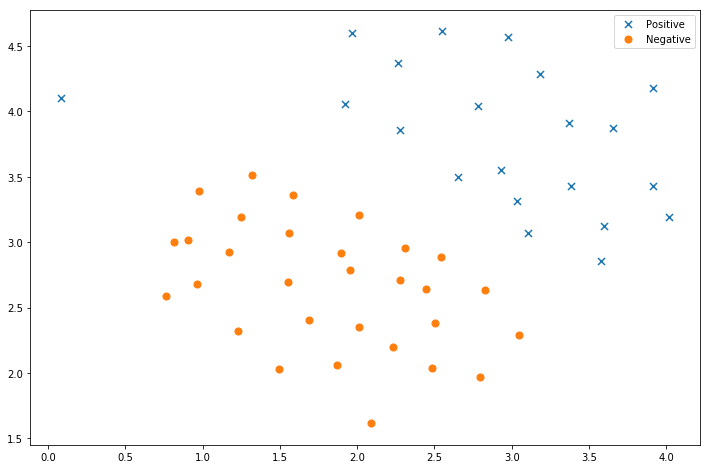

In [6]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')  
ax.legend()  

Notice that there is one outlier positive example that sits apart from the others. The classes are still linearly separable but it's a very tight fit. We're going to train a linear support vector machine to learn the class boundary. Use scikit-learn LinearSVC to linearly classify the dataset. Use regularized SVM, although we have not yet studied regularized svm. In svm the regularization is controled by the parameter C. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter
tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$ , where $\lambda$ is the regularization parameter that we were using previously for logistic regression. Classify the training examples with C=1 and C=100. Plot the decision boundary (or the confidence level (distance from boundary)). Explain what you observe.

In [7]:
from sklearn import svm 
#TODO: use LinearSVC to linearly classify
# use loss='hinge', max_iter=1000, and C=[1,100] in call to LinearSCV
svc = svm.LinearSVC(C=10, loss='hinge', max_iter=1000) 
svc.fit(data[['X1','X2']],data[['y']])
score = svc.score(data[['X1','X2']], data['y'])*100
print (score)

98.0392156862745


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# 2 Non-linear Support Vector Machine

Now we're going to move from a linear SVM to one that's capable of non-linear classification. Lets visualize the data first.

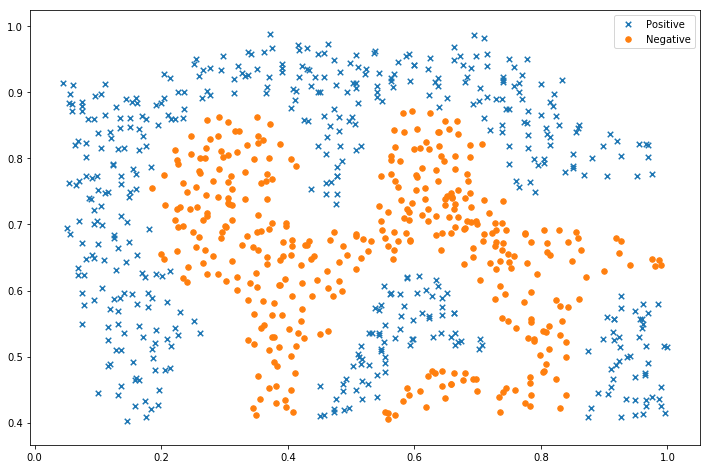

In [8]:
raw_data = loadmat('ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')  
ax.legend()  


For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data. To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label. We'll see from the result that it gets most of them right. There are two hyperparamters C and gamma. In the next part of the lab you are required to find the optimal hyperparamters based on the validation set performance.

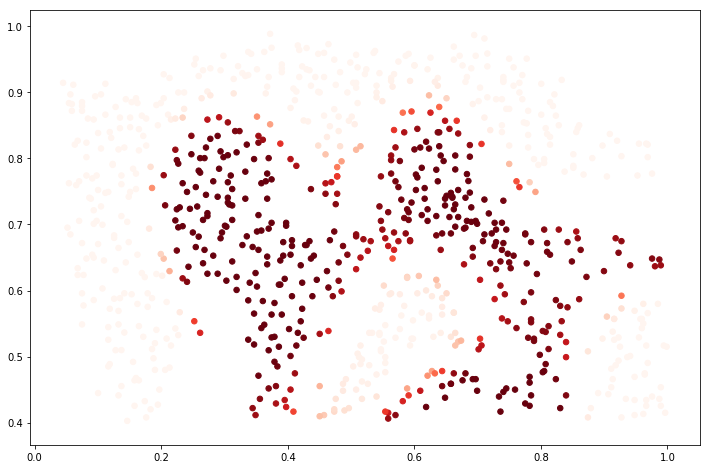

In [9]:
svc = svm.SVC(C=100, gamma=10, probability=True)  
svc.fit(data[['X1', 'X2']], data['y'])  
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]
svc.score(data[['X1', 'X2']], data['y'])  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAsYAAAHVCAYAAADywj0dAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsnXe4JEW5/7/VYcJJmxeWBXZZgkuUsAiCklGCgpgRBRUVEAzoz6te71UxAeZ4VTBgvggCEkUQuAKKsOS0wi67sIFll00nTOhQ9fujumZ6erondk845/08z3l2z5yZ7pqZ7qpvvfWt92VCCBAEQRAEQRDEVEfrdgMIgiAIgiAIohcgYUwQBEEQBEEQIGFMEARBEARBEABIGBMEQRAEQRAEABLGBEEQBEEQBAGAhDFBEARBEARBACBhTBAEQRAEQRAASBgTBEEQBEEQBAASxgRBEARBEAQBADC6deLZs2eLhQsXduv0BEEQBEEQxBThwQcffFkIMafe87omjBcuXIilS5d26/QEQRAEQRDEFIEx9nwjzyMrBUEQBEEQBEGAhDFBEARBEARBACBhTBAEQRAEQRAASBgTBEEQBEEQBAASxgRBEARBEAQBgIQxQRAEQRAEQQAgYUwQBEEQBEEQAEgYEwRBEARBEAQAEsYEQRAEQRAEAYCEMUEQBEEQBEEAIGFMEARBEARBEAAaEMaMsV8wxjYwxp6I+DtjjH2fMbacMfYYY+zA+JtJEARBEARBEMnSSMT4CgAn1Pj7iQB2934+BODH7TeLIAiCIAiCIDpLXWEshPg7gM01nnIqgF8LyX0ApjPG5sXVQIIgCIIgCILoBHF4jOcDWO37fY33WBWMsQ8xxpYyxpZu3LgxhlMTBEEQBEEQRDzEIYxZyGMi7IlCiMuEEEuEEEvmzJkTw6kJgiAIgiAIIh7iEMZrAOzk+31HAOtiOC5BEARBEARBdIw4hPH1AM70slMcCmCbEOLFGI5LEARBEARBEB3DqPcExtgfABwFYDZjbA2ALwAwAUAI8RMANwM4CcByADkA70uqsQRBdBkhANcBIADdABilQicIgiAmD3WFsRDi9Dp/FwDOj61FBEH0JtwFChOo2EJgZgEz1bUmEUTPw105odR0gIVtySEIopeoK4wJgiAgBFDMoWpfrZ0HDJMGfIIIIgRQnJDCWJEeAHSze20iCKIutA5KEEQDCEDw8D+5TmebQhD9gJWrFMWAnFxG3UcEQfQEJIwJgmiAGhFhihYTRCUlL34INJEkiJ6GrBQEQdSHMUAzAO6EPK53p00E0Y+IkDT/3AXsovxXNwAzTRtbCaJL0J1HEERjpAfkoK3QdCA9SBFjggiiJpJhGAGPMXeBwjjg2tJm4VhAfpwsFwTRJShiTBBEYzAmhbCKeJEgJoho0gPVm+9SA9WRYKsQ8mIB2BaQyiTaRIIgqiFhTBBEc5AgJoj6MAZkhuqnaxNu9WNA9cY9giA6AgljgiAIgkiKeh58pgMiZEMeefcJoiuQx5ggCCIMIco/BJEUYXYJxqhwDkF0CYoYEwRBBLGLgK28nwxIZas3TRFEHGg6kBmW15xw5e+UlYIgugYJY4IgehMhpFhwbRlBM9KdEaeO7RPFACBksQZtiJa3iWTQNCCd7XYrCIIACWOCIHoRIWQKK5WySkCKU5GR0bQkcYrhj9tFmWmAmJwIISdhri2jtUaKJkIEMQUhYUwQRHMIIQt9cFduHNKN+DNVcDc8j6tdlILFfz7hlatmWjztiPIUk9d48iKELNfsL2DjWF7ubrLQEMRUgoQxQRCNI0R1blamybRUcYrjyFRVAXFqF6RYVhgpwMy01xbdDI8ak8d48sLd6qqOAGDlgSx97wQxlSB3P0EQjePa1aJV8IAnNwYil7B9gtd1KkUxIKN8rt3eucM2PmkGRQ4nM1ETMcpKQhBTDooYEwTROE6E6HRDom3toOlSjFZF8YQUv2a6thfYaCPVlb8wA/eyBOh91FUKURZ6UUUliEq0qBgRfXYEMdXoo96eIIiGUeJICEDXm0/9FPX6qOPELb4Yk/7OwkR1ZTC7IIVqkoE8xuQ5+kkQA/I7K05URjnTg/33PjqNZshrO+hrN9M0sSCIKQb1lgQx2RDcE5S+Qd5sIptD6OvT3jFSgGtVvyaJTBGMRZfLdR3ZlmJIpLqVaLEQ5ah3EpsJO4HyfweX/osTQHakP99Tp1CrBHbBs+Iweb2Tr5wgphwkjAlislHMV0e+7IIUTEaqxrKxh1UIeX1Remw1XUYgLe8czBMQ3fDfaoZ8P45PqOtmbWFcEsBCvl7T5O/Ficrn9Vs2AiG87yQijM6dzr8fZUVhWn9YOphXyAVdzifMXcC25KRQN2T+7l7/7AhiEkHCmCAmG2G76wHpyXWK9aPHUZvXHBtIeX7b7HD77WwEPSJCrZtlIWOmAe6la6sl+jkHiuOV4tFIhb/fYq6zUVaVQ1cIbwLSpPWFO3U2HXZQWCmR7m9PEplLJiPclfm7/b87Nn12BNFBSBgTRKcp5QHmUgBpHV66twt1xBdDqIG3GwNzKgMUeaXYT2Ur2840QG9ASFq56oiqEyK6FdztjDc3KIbsQnPWFyB6UyQAgHWuUIXrhGcGUZlLUn1Y3U357VX0u1mrTcXrWXlSF4aVD3k9l59nOxtKCYJoGBLGBNFJghXdgLI9IS7hGbQXhMEdQIsYaA0z/PXdsBYwBmQG5SQCovUiHv5MDb2EKiwRxC7I76HRTZO1PpNMjNdWFGFR4iCuja7bFJolrPCH8iM38t2ERs8LQHoofGIadY26Lo3WBNEhKI8xQXQSu1jt3+VufSHbDA15fmsIparXexkiml3ejxMtQZ9qmMBRvtjEEeEV/oDmUuBFRRONdGfeB3cbyB8dU1VCx5Ji07GSzzHsOtXWJCGkD78RwiwuQkTn/Y76rrp57xHEFIPmoAShrA2OI4VXIxvUWiVKPLh2fJkdVKqzsGiXfEJti4D/9ULI3/vd36i+17AJSHpACi1/7t/UQIfec41zNHN+1WYrj5INxkgnky0kjEaKqrTblrDVFlZM1n8beb82OGmJel7Ucc1M9UZQde22C+fe9S/k/d+KhUttXnW9vtJMNZ8KkiB6HBLGxNRGCOk99Q9gTjG53K+MheffTWJwUQLXv5Sr6dLn2ciAOBkEsR8zI/9V4phpXiRcl+JKCJTsGlFwLq8PtUmu3dRuynMaFEqMSeHSDIbXHggAHf7u6p3LTLdvxQlbbRFcPp7KtHdswCf67LIYjXpfDX+2Tb5eN2Tfo96rbsSTSzmYecWx5PeRHmj8GGETbcebmHTKw04QHYCEMTG14W54VMfKJ5N5ISwiBCQX2fNHf9XvU5VSFotM+ffg32tFcIPiwrWleE23GV1OZQELgclLi8es9x6SwkhVl+cGylHrOK67qChrVBaWZgl6gR0rerNgo/ermQqv0GjUeH0ShWXCNvWp8u6NiloeYitRx84Mtdc+gughSBgTU5uozS5Rvs920Q052Kq8wkyT0a6kIy5TWRAHafWzCPOFcqf97BX9NHnhXoRWuHJSoESvSsdWsqR4y+xx5uANq0ynHm+XKI+0XazM2w0m33Oj1gamtff6OBB1fOyN9j1RtpBe3NRKEG1AwpiY2kQO2gmKEyMlf5R/l+gPogQAdxoXxtwtL5NrgWXyXr8WuAvkx8q/q9Rs2WHP+uGzpCTxXsx0eKXDOFZbokSf4PJ9ZYdbf18q73cv3u/NTCoiy8GTx5iYXNAVTUxtonKKdmLTUq8NkkQdovyiDXajriM3j6klbKfobSZLOLNCXIRlYlAeXz9JXdfKf6s+b5XmMI7VlkY227b7vrp1vzMW3p+xOptwgxgphN4DtWwhBNGHUMSYmNpwF3J+6EUDGevsbv7JjBBSNKnNTGamMwUzksJMV9sp1Oa5Ruj34g1RXt64PL6NkFTVRc0It2qYmckxgTXSAJi3cRSepavJ96byNyu7jLqnjT4qnU4QDdDHoxRBtElwM5Wi10VKP3hRg6m1BORnbWal97QfMdNSPCl/eLPiIsrn2S8eTaYDIkQENxOxtYu+lHJMRnx7QVipQjKWbyJnpKuvVWWF4Y78PDqxPyAOVNS43Qm/psnPiSAmMSSMialLaARP9G4EL5haTjOAdLY3PX7cCReCdqE9YexY3tK9ly6t0xE9w2xdyEVtHusHYQVIEegvXQ2gtJmsEZyivH5LCKA4DrDh3lhJYJq8n6Kq83Fe+f6FZ42JO12Z63iTL+VDz1CBD4LoIHS3EVOXfovgFScqNwlxByhM9KZHlUdl9RCtt1dFGwUvV0DrJ49uWOovppWtGNyV32du1PMid9Ci0Ai6IUWg7tkODNPbeNfgMFIMmYgC4as2vUhY2jWg8Sp4jeDa8vPgbnmSntQ13uvXG0F0iR6YphNEl9D0cBHcTPTHsSujO0ktrXIe3lbB5Q/rsahjrc+glQhvVBldwb2sED2wHF+PquINZjkrRTAayV0pkJIqNNMqugHoreasjRB3SaVGjJtGUzvaluflVX1CtvGIb6jI9iaBce576JfrjSC6AN0BxNQltPyq1rjIcuzKpWHuLa02E0VrmBoRo1aiSULIQdj1qsAZqXhtCVHvPwkBa+UBkSvnhO5lkRxVvCEqGmkXKoWoXSxX3lNVDPvFitGqlcR15H3GXe87HuiOL1kzIibSvu/TtgDbFxmv6BMauLciV7Finjw0er0RxBSEhDExdVFLw7YlCxboRnVBgqCA1E1vw5UWHsEE5PGCJWpdp2wDKO3mbsJryzTIVEkhIrgVYaSWaxWOJQffuDbWREXX2lmuZSx8EqAeE1yWrAX6QyT7iRI+fqFkW5XXHHcTnIglQGoQKI5VP56ucc1xFyj4XiO450se6vx3a6ZlP1BxDQY81k6bEd+oVSw95slP5PXWJ7YkgkiQPuhNCSJBNF1uuMkMhUdMi7myKAY8D6AnvqIGkeDjapmylKFBeOVnmxCJqjpakFS2+ShvlC2DO/FFpiKXx1v0GKtyzs2cv5jrrF9ctOGfjlq+9kcjI6N8VvjjvYbhpVrTdABeQZDstNoTu6jJZ5y+3kZhDMgMy8mz5k2is0OVNonIPqHB+yrsGtf0+CcBjVxvBDFFobuAIKJQ/tUg3JU/mh7+9+CgEyyAUHq8yWVL3QCyI+XStWoTlBAopb9qZ7m29LcY5suRYqfBNoahm3IC43hRO+7WFxx2MXxCESeliY73vWi6XO5vJpOAkfLel//9eCsL/vNEnb+RNjZzjSSF5l3DjRL1/XbLl8xY9WqQn8iIb4NDraZL8a2uBd2ILkLUDpHXG+VvJwgSxgQRRS3BIbiM7hTGUWFv0PTqQTBycG8xcqosGGpDWkl4e4N2PYtGrQhdXH7VqOO0e3zlqwXk+46KKCo6IaCKucoJEnflcn+mQV8pUC6e4NpyJUHTqm09URMxo043bhV8n5N3jTQjgNRn2A27hmaGr6z0qkWm1Cf40IzmIrGaVlt8x0Ej1xtBTFFIGBPdh7ty8OaOJ/wyvVEEoqav15BtzfqiO5q3sSo4uOhme1GkKFw7EI32IpeaLn9UWjOmVbaJMVloww6kzzJbsGXUalsY3PHaFMN5jFS5vHIUSQuoqFUFFdFu5jtWk56wiY1apQhST3SprCnlhpWvkXptU5kL1PvT9Phz9tZD+Xr97511QDi2iqb7+gSvCIwW0if0ArWuNz9CeHsjtN58HwQRMySMie4igknzRVmwdUsclwYCJv3HxVzl3/1eZNbA8mOYgGNa5TJ5K4RZNISQ+WIZfOfz/Ml+IWSm5IYex5bP1c14BU8nNvEwr3Ka65QjX8HofdKFWmq9zbg+AyFkvtngyZgmv9daYiVyg2ixvjAujFVes9wF8mPAwLTOCSTl61Xfr64Deqq3BVoc93YvELQINboiRRB9Dgljors4EZFFp80Kaa0STLekfK1qOVc3m69CpQQcd7yUU3p4ZLkd/CLMH8FkXsS7OFGdvUDTgVQTYlhFQZlW/zPQDSDsq9X01t439/I1B1/PWLkanRDyexKe/9sfqYt6vf+9+S0DzVggorJlxJUPlgcEv6IRm0ikOK8j2qMi1II3Hwlvl0Yjm92i1WsnSQSX13yr9xsgJ08VKz+BFSmCmKSQMCa6Sz3/bamD15L3OHK32l7g2vEs3TImRXWcS/u6GZ2pQOG3LTh265trgn5ezagdrdR06VmsaB+Tm9KaQYhqD28qGy6SlEiG7zMOe72ZrZx0cV6ZNURNZBoZ/Jn3noL5sOO0pdTUsN6GuiiMVHjUuJbIVBOMUCKsRb2CajtjnRHvqnqc+kyY5l07XUr4VBXlhYxet3LfOxHZThy7uQk1QfQZJIyJ7qIb4R2wZsgO3v833WwtPVmjRA4EIXmJO4XggOvKgTYo1Mx0OQqdJNytFlfckWK51ueill25A4C1FiVX3vOKx/Ket7YB8WGHvN7OyyV59Xn6RTFQti40WpQhKltIXEQJPNbAZNFMV9t4ak3QlF2iVjS6V1N62QXPluWJd80ABkaSm1CHWVwEL6/OdIOqKC/k59KIp7xhenhiRBAx0KM9HDFlUJuHguJFN6rFmGsDrtG7S6pxU5FNAOXNT35/c3qwXOihHq0OjO1MGDQN0Nr4vtyIc7s2oDUQBYu06nhRL2WxqKLJzXP+bCFxo3I4W/7VjIi81mGvzQx51gheOSEIozBeWxT7r79eouIe8IRbqepcE+nhmj1nlMVFrXJ1mqj7xbGbv/91M/x4vZQRRAUOGGvPNkIQPkgYE91FFa7gjrcEqkmBEVyaVjhWcgJE5faserwLA4HrhERpvewdaV8RALVkXGVbCGBmyBfYzxgpT6g4MiDaTKYDdY3U+/qVfzjoS1aVGltZrRHC2yQqZPQ6qehtrclbXFlQphqpDFAMeM2NdGf95bWwCpV9nqbLQAF910Sb9MgVTkxpQv23XejcNF0KgGCUths7zCMjnValMFakMl5U0Bd5N1JS1LebLqqbEwbdDE/91mjUyjBrt50xr0hKMErKem8iUfJQJ0ipEEjgsVZsMI4FjG2qPNzQjPhtSdyVm2Y5L2+G7ARRIr+RzamJEZVesoX2hK029Erpce5WBwLCAgcE0QJTUxgL4atS1aBXkegsRgqwwooZJGyjMNOeL9a3PNdLRI35jMnytKoanBbjIBY6YTA6M2FIZYFioIS1mW38njUzXglsp/Ix9b2qFYtizieOGZDpQORJ9UNCVOadbiXzSRwwDZH+0WbvAyGA8S3V0efxLcCM7eK7Ngs5ID+KCkGo+5bUkypaIQRg5UL+4NmbukWUDcZ1Gt+AJ0S5PLzKQGH0WD8YtULg2gBIGBPtMfWEseuE7CBvcddu0pTST/k6qKmyTBRmD1DLyUnTqR3ttTBT4daIhqraJTCIVUwYOhgR80etlIBs5h5gnsitla5NebeVMO3EfRbMZuDHLnSnT+I1vMWu05w4jkr3BkhRE8ekirueKAYqPkfXldUAdVN+90lgF8Pfn5nu70CLENU+83oZaJo5tpoI6kabQYcpMg4SXWFqCeOoWb5dkIN+8MYv3cheVbNOClNV+MIfcYmrg+oHmK907VSsuqRKH/s3XBlmdwsHdHPC0HYpaQ1ADcHCmMwv3ShK+DHWmlXFyqPm7n67IL/vTi5d13oLzb6/ms+P6T62I6KGgCxCkuQkOqqyo9tGSsRewC5UR525V0CnndU6VUVRXfM2ZKGWVm0PRouBA4JogKknjKMS3rtOpX8veCOjmHy6MD9WsbqtaoNaNzaDdYtmBctkQkVpVRW+XvH39TrcLXu0jVT8EbxgGkEV1W70+1GFUurhOq0P9GpSryK9YRP/IEwL93SrPQDNoM4ZXPLWtPjEC2OI9NQW80AmJMVhXDAWPq/p9uQ91C+P8HtArUhy7xqJ8vMD7QvjsImgawGu2dpkW/OqPhZ9x9XN/p6UED3D1BLGtTqt4N9Cb2Qb4KnORM1qdlBTSBhPdXphYsC5jM4IEc9mviQJFiJxirIAR1z3DHerxZ4qwx33sn2rn7EQ0mLgF0h2obryYRjZYZnHWGVzAANSadQtJBLG0EzpKVaRPd2Um+/iunbMdHXVQRX8yG2Tn8G0uclEEc10dal4QNq/ukmjBV2EVw2zokx9AZETjXYn5cF0nP7HWx1PdRPIGuWsI73aJxF9x9QKQallz9DHA+Ij6kaOEqxxE3WT081PdBLXkQLDLkqxVJiI2HTUAwgeLgqsXI3SyE0SlS0kqr8Io6GcxxF9VSOELYcLLnfs122b5uX9ZeVSx8UcMLqp+UIymgaMzAKmby9/ps2JN6jAGDA8s3xM1V7hln8f3xzf+fzoQVsTk5tCG31/3JXBl2K+RpXBFjBSleJcbS4Njm+OVf19ChEtgNueXETuGm7zsMyrikrjIhEfUytiDMhOwl8yU9NlRCl4YwUjEf7HO4GZCRcg3Y5IEFOLsKiYYwOGK3f/x4ngXtot79jNZhSoJdwEjyfyHtmeJvsFJaqidte3kh5NESW0Gp3UF3MhoonLSdFAC8UyktyMphvAyGxgYptvI54Px04uj7GyOikaPUdwVcO15LUeRxo7/96MWu2KukYE9zLQeLmnVXGZdi0pZso7ZgDyBBM9yNQTxmoGrURvVGdmpBtbkkoKwwSEv4PSvA5qagX5iS6iInBhcCdeYRz09HNHisZMg2WZgdrLvXEJI8OMp19QgsNIA4Wx6r+rMs6tCBJNA8K+tkb7jlrFMnoVw0CoDSDpTbstFTwJuX6cohSPce0jqNeuqGuEsUrBH9t9k5ZfjbLVqM3FFOklepCpJ4wV9W5I1TEoYVq6kTsoTM20l5WBKjcRPUbc94FdQGhhCbvYeCRNpTQMRjv1GLM7ME3mqbXy5UmDkWp900+t27pVYWxmwkWs2WAGAF0HwgKKvZbT208qC7CtgVU+Jj3TvUStctucA3qHxpeooj1qJSPu8UZFslMZGs+InmfqCuN6qJlzL+xypU6kt3AdaXNxXRlBTA1Mzki+KgUcjHAxLf4NqJE5b5ssJ5welF5a1wLAqlPcxZFLVTek4Kq36tQQtTYEt3hNabqMtFueJYLpMi1Wo99ZahAohkxUksoJHAdMA6ZvB0xskRl9NE1+R5mhbreskmY2gCeJKp9sF8q5yVOZzmwsp/GM6HEaugsYYycA+B5k5YCfCSEuCfx9AYBfAJgDYDOAdwsh1sTcVoKoxnVkVFFw2ambGdnxOnZlJoW4KmC5DjCxFSXRYDlycBmcOTnFsdr5b6vP0khmCTQqzRQgI1uu3ZitgjEvN2pIdDRYVMMGAM9a1YogaPQzUKVqS9eoT+QzVl3IBihHv1ullN6vhVR/ug4Mz/CyU3iWmcxQ7/tBdQMYmdPtVtQmKiWe1uIkrR10A9BDJg7c9QSzl7+/34uWEEST1B0NGGM6gB8BOB7AGgAPMMauF0I85XvaNwH8WgjxK8bYMQAuBvCeJBpMECVcu3JzmGN5eVsNL2LoYRdldDeOiFcxpFqZEHJpPeaImuCuFOFWQQ5ig9PAOlngQ3AvZ6/tWQhiTHsWJJXxPMZRbRFexbQ2VnBCi2p4aavSg8lEy4KVNh1Lfp5Zn8hXkw+VIk1FuVudfHBXbkYr+bW9FHOD0xsXX7op060R8ZPKArZW7qP0Nqw4ccPdyvvQ9Sal2SbydBNEn9PISPAqAMuFEM8BAGPsfwGcCsAvjPcCcKH3/zsBXBdnIzuK65TTHWm69OV1Yras/JQqkqCSldOyUzRh6acErxTFCu607tn00+6O/wYRnANbXixbDLgDbC1CTJsDlmqxWlRTDRBAzpcLV3C5SSw9mMwgrsoyW/loW0Wz6cL81CuqYeWT8aOGbbRCwDsdt23LCrFBAHIS2Wue26mI8tuii1UsowhN6Sdktpg4smY0S9V4nOltrzsxKWhE8c0HsNr3+xrvMT+PAniL9//TAAwzxmYFD8QY+xBjbCljbOnGjRtbaW+yqOgOd8tVgQpjtTdMxIWV95b+ufxxipXlgIlqmv1eeAzfYzCqyF0pcvLjwOjL8eUkLYyHtFd4No4O4Fjhn2+S16QSx1EDX5IDYlL3eNQ1l2SfEllMoY2JRZcRnIOvehzuP66D+4/rwJ97TK6oEPEiEpiUtkroeDzemfGYmNI0IozDQpbBcMT/A3AkY+xhAEcCWIuQfc1CiMuEEEuEEEvmzOlBL1hodAdythwXKjKcH5URuWKuXIs+iGvHI+YmK80u7cUR+U8PonRLqNLDQgDw7BRbX4pnEHFthEb9OlVgJmrw6cSgFGYXaagoRg2UlzeKpER3N0R+VPnmTmysSgj+9D8hnn9K9pfFHMTqp8GfuKfbzZp8ROX6jjtneSN0YjwmiBAaUQprAOzk+31HAOv8TxBCrBNCvFkIcQCAz3mPbYutlZ2iE9EdldxdiSnXBgo1KonR7DiaMEuBpocLIN2MR4zohixra2akbzmIEN4GrzYx0widk3aqwEs3BJ1CN2TkWDflQG2km8tnHEWwIEPF3xJaJg5bfm5X5NdDvRe1+iS4nGN1woKTAKKYB15eXTnh5C6wZT1EvoYvvV+xLS9wss1bOepgtDbyeu2CBzpyck4rBUSyNBJCeADA7oyxXSAjwe8E8C7/ExhjswFsFkJwAJ+FzFDRf+h6+FJ4XGJAiOrd5/IP0a9JQojUSzOlNpP5/c5JJmNX5VG5C1la1RMw9c6nBFQpK4VZfp1ulCstGWZ0FK0WdlFaF1xHfg/ZESDjlVfNDsuIfxUiHjtFelAe33VQuj4Yk6K8E+im3MQYXJZPD3Tm/Joe/7n8RTWcYjmVmZlKNmKcGS6fT+3yT3LvgBLDFXAvy0Af+jOLuXKGDT9M83zTjadkE+NbINavlP2NmQHbfhew4R7aZGhbgO2zK6nNcNnh6hWyqH68nTSCUddrN9CixuP+Xfkg+oO6V5gQwmGMXQDgVsh0bb8QQjzJGPsSgKVCiOsBHAXgYsaYAPB3AOcn2ObkMDOAG4hAMK0zaYrCREjcA2iFAIVXmCBk97vydSlcGyjyZHKCCh7IRuCrDNVIhxwloHSjvaVj1wFGN6FiZ//EVmnHUFE0xywhAAAgAElEQVQVIxWy3Mdi2aTCGIOYsb30LtuFUu5c1orAb60BcjB2LPmj8px2SljFkiM4Ak3rbPS00+cLKyWvHjemda4dcTE4LVC4w0NwYGh6w4cR+XGI1cvKkwa7ALHm38CCvcFaKXWdBKGBE1RufgsGLjTDS1EIoJgvjyOtBjTU9aoCOarUtqq+2ilLjpkF3EBVyE6Nx8SUpqErXAhxM4CbA4993vf/qwFcHW/TuoCKBNqWXK7RjMYil80Qla9VVQRS1YiMVLwdUGmJ3zfAqHP5B23uhi/dcdeLOMWcoSOy/GyxuymM/OWJSwg5SKgBami69BSXBm2voERMIogxDRgYAdClQbsbRW44r5yYqQIqlJ2lcaIsYeozVaW+ky6XHBNMN8B2OxBi+UPl96DpYIteCdaESBKb1lb3vYJDvLwWbOcO3mPKRgcWHe0NfY2H2pei4I6cQLPA81wbKIrW00g6VnnVDZCfXXEiPHqdBKpIi22Vs1LEPR4TRAi0JhGEac1H/FRnW6+zUEu5xYAH1fAt5SY1G4/azOVYPk+iqL3ZT3A0ZktvgkYGgm4QmTLM9/noJjBjnpxwuLZX8pREXMsIUb3r3LEBkevtqmu9hpEK36Spp6RvNTcGQEgbyfCMvvAea/N3hxiZBb5+JSAEtO0Xgo3Mbu4gdkQ0NipKmwSOVZlOz0xX+ts1PTyriBoXBI/IOiLCHXncKU+Cmm5rA9HrJPCPp62MxwTRJiSMg3AuZ96NdCSCe7P3chSjbnlg3fA8XBYAEd+msLptrSE0S5GBOmI07nYKUWOTV5cvzVRWlpYNfibBTlrTvagu0TZqEA/i2q0P7v1GHNHcVFbez34BxTQvN7UnigG5Kja6SZZSTqpwS4yw4ZnQ2/EDD8+Sk1j/NcaYfLwTKCubH7tYaQ9IZatXqzSfLayVgIEXnG7+dVHnSiho0cp4ShAJQMJYwV15U5ZmqzqQSst/o25M/01cOsZ4/R30WhdmwbrhlcANwLTotDhB2q085sd1vKp1YZ0s634UK5UFjFx5AgNWXtojkqHWoN/q4N5P2IVK4WSkW/OIMiar3KlS2rohj7VlPULtQcVxwOjQps4uwmZuDzG60dtnwUvRSDZrh2ROqIrKME32HVFpxuxiWRirPsa15Wt1QwpjdQ2oCVOjApmF2DUaRTfCN78ltc8hOGnhrlxdzQzRKhzRUUgYA7KTKU5UdjbCLZcbVhu8/BErzsOX21Vn2Gs5Q1Uas4rlMU/suWH2CYaqQdQuyOO0+t6EtzOesWo7CSA/XzPtpenqckfIGDAySw5aji0zliSZmYOIvq7aGdz7BdepjiY6RXl/tpJKLtQfHiGmeJdtSx2CaTqwyyuB8S1ShGUGgKGZYElcW45VuaejmT6tVjo/xmQUNdh/qmskGORox9qlotf+cTGpFU7uhq8WqQwrUfmVCSIBeky9dQlVWafW34v5gM+xDweTVEYumbqOl9LMrFHJLOL9OcXmhXFwF3Xk83hviGKFKt1KHrfOoHa9B6/J9GDvXBNJUcvPGVeO5dIyvR9WzmgwBWCMAcMz5U9S8GCmHXiR+6jCK01GYL0MNXAd2bfqZnlVUzfluVTKynbsR0yTq5+uZ3HSje6k+1NR98neBxA9AwljAA2JXO51Qv4lrSi60XkI7lu2q3F+Ta/8u2E2V02tlfmAU+xcxTaiv1ErBqXBvYcmSknSCT/nwDS5AuJfHk8PJFfcpEsIIYA1z0GMbQNbtBgs06Hc24qoTDuu7aUE9fWFmt6aPS0qbZmmAVqMWWQY64z/nGkIXaUE5ESZFeQEuR/zcBN9BwljoPWNXs14vZJCeHl//Z2xZnjWjwYEhUpJV/F6TzyHdfCt5JB0GhTFfi8dMXVQKQLVdRf34N4PGOnwyWOcOVs1TW60c4qyaqOR6otNd80gxrfB/f5/ARvWeTYxF+yMj0B/1dHdbpokPVC+3lUQg/o8+RmkQywiCiG8Yi60x4NIHhLGgHdTDkbflEB1ByZ4tCjupMeYO9UCljsyMtSIBcBfDYw7lRFnHkgNpJvJvS+mxbukq5LTCyHfG+1s7j2Ut99//epm72+2SaL4iNog57dUaEb80VzG5DEnlx4uwX/3A+DF5yvKtYvffR9i933BZjSZ3q1VDBMICxrraoOd3rnIp9rzUvLpirItoteyvOiGrC5qF8OtRWqPCvXlRMKQMFaom5I7siPx57xkmtzEUEGPDNy1lu3QxKCqaYAWiE5lBn2FPWpk56iHboZ3dOozZSzeyIlrA2ObfKtyQu7S73amC6ISVVXPj2s3PqnrNELIHLTqWmaajHLFMVlUETMzI/ugToqnSYIQAuLx+0M3RYtH/wl21Bs70xC1WbuYq3ys05YOwaszPfgxM90tohSG8kZ3Mrc0QQQgYexHeRp1E9A8Mae8XEFRqGkRVexYhwe0hAV6HAO0mZafk3+p2Egns4wrhNx1HozmT2z1SmxTtKFniBr8nB4Vxnahss2qnPnASHzXVdgElWgcTasWxkpsdRIz49ljnO6cH5CTuChRDHil5s3WAh5CePnFRevHiELTEeo3VmnvCCJhSBiHYRcr0944Rbm8GxSIZrp6B32nS1ZGVbnqpXryKhrGebm0Z1KfkYhIoweWfMUmokmiroEeWY0JEpWH1rF7L/LWQ/CNL8G66lfg/34S2m6vQOptZ0Hbfn7s52GMgR18FMQDd1Xta2AHHBb7+RpoUHc93I1seHbt5v383K3MumEX4o0+MyZXK/0pVJkm7Y4E0QFIGAfhPLzgRdD4r5ZVgzhFLzLZocFd93yI/jYbqd4SxgpNQ+wlpauo8bn3sm91KhLcoa/o2clLj5Yv7yKCc4inH4R4aikwNB3aIceCzZxb+jvftAG5j74HyE8Argu+ajmce/6Gge/+Ctq8HZs+nzs+jq3X/AmFJ59C9pX7YfqbToM2ULYoaG8/F3xsG8Syh2XucTMN7f3/ATY0LZb3219EZHmoeEoLfaLfIqJoJ/ochqbLVHEV5aGp/yY6AwnjIKF16FHebKduTsERnTC/wwU+zLQUwu2Wkp0MaFp1lg2gdtJ8ojsYZnXe4lS2d7+nqEpgkyyzQ6MIIcB/9x2Ipx6U5dN1A+7fb4D+oc+D7bIYAGBf+3ugkCtvhuMuUCjA+uOvkPnY55o6n7N5M5574xvgbtsGkc9j9KYbsenyy7Ho+uuhD8uy7Cydgf7hL0CMbgEmxoDt5svCHlMRI1Xfq9tsDmVVsjwM7sRrA2KMCnsQXYEMO0EaFpUdiEwKIW0dxbwUerUiU3FvYOs2qqhKMR8uRmoxOEP6+xS6AQzPmjyfzWQilZXf18A0+W8vb5AMqyJmpqfuJrkXni2LYsCr3leEe9VPSk9xn30acAL3L3fBVyxr+nSbLrsMzqZNEHk5kRL5PJyXXsLmK35V9Vw2MgNs3s5TVxQD5YBJGMqaEGufWOdYgstVVlXsaQqvtBC9DUWMg2gGQpeggoUGNC+tWdVGDy2ejTil6kleO1wAmtXdKmBCeOnh7HIENomBx7YAy7dc5xTlsnujS+yaJitbCS4/Ptqw0dv0QmTIdcvRNSMVvuKjaTJzTbcrgfUIYtWyirRoJV5aDcE5mKZBf8W+4M88Ven51XRoe+zV9PnG770HsCutN6JYxPi992DORz7S9PEmPSoVp5mB7AjVuOH9v5VxRG1Qr7JA1dlgGPQlO1bj+fY7Ne4QhAcphiDK+O+/8XQzPJKVHqzsDDRDvjYO4WoXUCXOudvdCnJWXvrLXFt2bIXx5qO59RCiUhQr7Do7rMOgXcw1EWtXwL39Sri3XwmxbmW3m9M97CJQGCunjyuMh+8fAMobqlSkWBXYKYzL+4M3cI2qlaD8mEynFbpZtA+YMTfcRjI4DObdd+ZppwMDA+XnGQaQzSL19vc2fbrUwl2q+1ZdR3qXXZo+1pSCsbLFzv//VkllKy0Yml5/3AtuUgfKqVHrYRdCxh2qpEokB0WMw9B0mYWiXiJ/VRgkiYT/UYLTdep7MNUM27bKM+yo2bzK2SyEHLyiSvBGiXIrJzdJxGYfqSEsXBcwagtdwV2ILS8BE1uA1ADYzHlgXdzMxS0LK772daz77e/BbQtzTz4Je3z1IpgzZnStTQDAH7wD4oHbSpE8vvwRsENOgHbAkV1tV8cRInzQtguAmaq9+iMEkB8tX7OuLV+XHYmOaAkhBbH/XlKv6TOvMtvrIGBwWIoVFTk202Cve0fpOdqMWRj4we9gX/d7uMuegL7bYpinnQFtznZNn2/Ohz+M8TvvKFkpAIClUpj1wQ+1/V66DufexMrbn5LK9G5qSZVlqJlxL0oAc6d+pDksV38xD2SpUiqRDEx0yeezZMkSsXTp0q6cO3FUjkfHAsBkdKnZzXiF8fDOxEjXtxRY+erOJCydjmNViwLdCE+LE0xhF3yNymfZbro6wYHcaPjfssNScLg2kBuTk4RUxkulp0lR/NyjntD3xIqmgy3cFyzTnVQ/T17wcWz48w3gBfnZMdPE4Cv2wKvuuBWsS526KObBf3FR9eRLN6Cd/cWuTiQ6DnelUA0jPVhbrNrF8NUNVb0vDMeWYjqIpssiNH2GGNsGfvNvpdd4YBjsuDdDPyi5yVXukUew4euXovjss0gvXoztPv0ZZPfZJ7HzdQTuAhPbULFCyDRgcFrviuNmyY+Ge4rrbbYNG6MU2eHJ8/kQHYEx9qAQYkm951HEOAnU5gJF0fESvqfkYOo6gOaVZo2KLJnp8LQ4Zr1oMQ+fYduFStEalW7O9Za3gu2qZUlQAou78v+N+MaiYJoUI8qTqHZBCyEFs2EA475BxLHkcvSM7YBtL1eKYq9N4qVVYAv2bq09IVgbX8aaK36NsSefxoxXH4IdzngnjKFqIeSMjmLDddeDF8s7w4VtI79yFUYffgTTDjwgtjY1xeb14RkWdAPY/BKw/YLutKsb1LpO69lwojLY1LIXRf2tT+0UbHga9Hec37HzDey/Pxb+/g8dO19HKOZQZZtTG9XSHa6WlxRGOiSwwupnxagpfClaTCQDCeO4ibIc2AWvzLRvM507Xu1TVuim7BRV9SJNl7PrejPkWgOs4IFNTjXSzVUJYyOi0l/wtU776epSAwAreEu0jm+pmsuk7xXtFt7GjhxEbjS8ff5NH22SX70G9x97ApxcDqJYxKY77sTqn/0Sh9zxFxjDwxXPtTdvCRdXGoP10obY2tQ0wzPDBZrrAMPdtXg0BOcyUuva8npupywzi0jvpzWwsS7qXowS1K7jiWl1/foGdop8JU7xpQ1Yf8ON4JaN7U4+EQMLdo58rhACzlOPw176L2hz5iJ99PFg2YREai3b3GTBTANgcoOrEL7xrI641fTwccfoYK0AYspBwjhuakZ+QoSola8sHOJHN4Fsk77DWrv7Gx18w57HmFwetgo+4Z9QHme1m9pIAWObKv8Wav0RXnXCQWA0pBONMQXYc1//FuzR0ZKnkufzKK5fj7W/+T0WfPiciudmdt4JxtAQrHzlUqCwbEw7uO5qTmKwoWnArvsCzz1RjswbJrDbfmCDI11rV0MIDuS2+r5jF8hZXrEQT0gou1GjA6eacDoWAAHoqcYyoJjpysmu/3hBirkQ24UvU0Avp6mbBGy84y48fNbZ3v4Ljme/din2+sbF2PH0d1Q9VwiB8Yu/gMKtN8ssGKkUxr/3Dcz4xR+gz98p/sZpupz0B+lGGekkMVP1VzyDqHHHLlRmpejVXOfEpIDCFHHTbBqZZjMt1D2/Ft6hBr2/zLNyVL1ej34PjAHpLDAw4on5COERVyod7lafI0rsGCmw6XOrz800sLnxWQO2/uv+qhRVvFDAlnvurXou0zTs9aPvQctmwdIpwNChZTLY9fP/idTsWaXnWWPjuP+/v4gr9zkQ1x52FJZfeTWS9v5rx70T7JDXA9PnANPngB1yIrRjqkVCz2EVw+8ZuyivF+5KAdrMKgFjUggPjMh8yukGIlmAFNPZkfK9pRlyEA8uD6s2haEZ8l6aSr7uDiNcF4+dez54Pg9eKIBbFnihgKc+9Vk4Y9X+cuexh6UoLng51PM5iNFtGPvGV5JpYKhdIqJ/7gZqg2p+VPrxnQ5nhFCBEjXudLKyLDElmWRT0h5A0+VgF/Qfhj0GJLOEmhoop54ComfYZtqLlBXLm+ca7XSUsLYDGyNqCetm0QxUReM0o9qqoulAelCmiFq0P8TLq4GJrUAqAzZ7Z7CBiIh8CwzuthvyK1dVPMZSKQzutWfo82cdfSRe/a+7seG66+HmC5hz8okYesUepb8LIXDzSadiy7J/l7zI937sk8itfwn7fSw57ybTdLADjgIOOCqxcyRClK83iGOFW4LiRtPCN6v6qZVaasDbQOSvqknEysSK58CL1fsumGli69IHMfvooyoet+7/J1AM+GE5h/3QA8k0UDfkhKyY81bbTDk564VUk0LISWZpMuql07Qgr1sz03fZVAiiHiSMkyDtE6aMyaVd3Qh0MB5JLKEyLxNGMAtFGIbZesdmpmTnbReaF9aNoGnVJYM1DTCHyhv9UmkvPZYcRJiZApu3azznD2HRpz+JzffcC67sEZoGPZPBTme/N/I1mXnzsPN554T+bf09/8C25SsqNug5uRwe+fq3sM8F50LTeyeRveAc4qn7IJY9ID/7BXtCO/CYzmax0I36ZW4VnPdGIYBak1/HkVE47pTTP7azeZWowpwxAyIsyum6SM2eXfWwNnOW7FcC4lgbnpZUEz1x3IM2Jv8ejyDC8/qjh8u4E0QL9MCUdBKihGl2WC6tGmbZK2WkpQ9YV8uufT43Ue9DLQfXGtAFl1GR3DaZYcIq1C8LmhmSwlf3ciwPjMi0ViOzgRnbyzLCHRQ/I6/cD0uu/xNmHXM0MjvuiO1OeSNeddvNyMyb19LxRleuDP0M3EIBzvhEu82NFf7g7RCP/l2myivmgeWPgv/1N4nbPiowm8jv2iuTCt0Mb7ORkisbKgquonNR6amIlkjPmY3Zxx4DLV0OFDDTxODuu2J4n+psNenjTwQzA/ncMxlkzzy7E81tHSEC/Wu+/bLLjVj97AYnqnHAucxCpN6jysHfKio7U25UHrMwEb+9keg7+lyV9RnKy9hrJFGgJOwcFZ2Ot2EOonbUXH1mPfS5jez/Shxw5W9jOdacgw4MFZaZObNhjsRnAWkX4djAMw9V7pTnLjC6GXh5LTBnx840hDE5MbIKgGt5kyKtOhVUIxlc6sE5UBz3PJXeZLeVaC5jcqm8VLHLsyEJjtANrMXc5EnT1SO88qc/wrL/vghrr7wKcF3MPelE7PWNr4XmEtdGpmH65b/F2MVfhPPEY2AjIxg46wPIvv2MLrS8QcIsD44lH2/nWmok6NApIaneY+meEeUKsa36se1i5QoUd+Q54ixaRfQdJIwnM/UErypnq7zImi79yUl427gb3oE6XkaBKdoJzdx7L+zypjdi1fU3wpnIgek6tFQKh3/3m10rABJKVBSTMYiJUbA5HWwL07zB3jfgG6myODbT7S/tCiEjSH6hoSxD2YjiHbXQdCmO/UQVsqGIVezo2Sz2/uYl2PublzT0fGPRbphxeTyT344Q1b+6dnv+9ag9M8HntEOjgRnXRuhE0rZaE8ZChNuyVOXYejmWiUkLCePJiOByqVt1ZpoRHumy85U7jLkrI2Rhs+V2o8o1B3tf2qopyBE//gEWnvIGrLz2z0jPmIHF7z8LM/Zc3O1mVaJ2gwdzq7ouWKeixbVoxysfRpS30ikCYjCeiZyZDp9wTBG/phAC6//5L4y98AK2O3gJpu26qOPn3/jgw9i6fDnm7P9KzFj8io6eP1Zq2QnaEcaq/LNry7GCu2goPWEjuI5n9/DuMzNdOz9x5HsUrb3HWnmiOQd6xIlFdB4SxpONKssCpEAuTlSWqRUiPO1OcLasiimo/MxRIrseWsSlxhimsigGZFq3BSefiAUnn9jtpkTCGIN2+BvB77paXlucA7oJttchvZ/7uBVqTeSqCuW0iJHyMrsoGwiT90NUXvMuIISAs2olwF0Yi3aLbRXDGh3Dn086FdueXQEwgDsu9nr/mTj80q92ZKXEyedx82lvx8ZHHpWrHo6LRaedgqN/8kOZ3aaXUJU/mRbd70b66Vn7kzh/7mAhpEh2HS8rRao1yxJXxZp82EWULEth6AYQluBF05t/j6WNgxH0+94foi3o259sCB4+qHPX26XfQCemZuZCyAiyf6bOHemBzNRJURVE02Q0ILh0laId+I0wvmEj7Hwe03feCYwx2Pk8xta+iOH582BmO1Mcgs3fDdop50CseBzCsaAtWNwb0eIkiFpGZVq1EBBe9UUt5G+1YExuJnW9LDaa3lM5Wp01q7H5o+fAfelFgDFoM2Zi5vd+AnPRbm0f+19f+io2P7UM3CqnUXv6it9i4UknYMejjmj7+PV49Pv/gw0PPgy3UPamr7z+Riw48fXY9bRTEz9/QwhR3kQHyOtrcHr4igLTfAVnfDSak7tR4iqwEaw06X88Shhrurwvg+kPW4lY18rFbKR6I5sN0TVIGPcbQngRKxY+CNfcoev7m3p9mIhW0V3uhh+Pe8vMzUYKUl7OS8eSr9XN3sjV2cPkt2zFH971Pqy6+x9guoZpO+yAvd54Ih762S8hI+0CR/33Z3HYhRd0pD1seAbY/skLl66jaXLSFowqZYYqhYaVl+nW1L2Vyja3cYex+G0gMSCEwOaPnQvnhedLfYSbX4tNH/4Atrv5jrajqs9dd0OFKAZkmsIV117fEWG8/Ko/VYhiAHAmclh+1TW9I4zzY5VWG86BsS3AtDnh/aaZkX23Y6EUee3V/jVqnKqXYSKVBXjKKweveRmfWnmPNc5DVSinPD1610whVLQpSoT6cW3ZWRbGvX8nql8TOdMNEdJhu5X9nWlN31rtpkai6bLj6eVOu4f445kfxKq774VrWXDyBWxa8Rzu/u6PYI3nYE9MwJ7I4a4vXYxnbr61202dfKSzwMB0KZDTAzI1oF/AurasBua/Gax87SXaPsF9YRXc9euqJs5iYhz2k49XPf/5//0j/nrw4bhxt73wwDnnI7/+pZrHNwaq+x5mGEhNa92WM7b+JVx91ofw1Vk74qKhufjKzPn40/vOwVhIW1JD1RsomaYh1UOZYFAM2/AqqjOwKLgr7QmOJVfmihNSTPciRkRMrp6FgTH5HDWGtCKKhYj2F0dZ/ogpBSmTbsK5FLmln7GylzeIygGMgK3BCnSSqnxmkDBfsKbLHMGprIw2ZIYqd/dGdVK1vG5EbBS2bcOKO/8PrlW97Oefl9i5HO7/8eWda9hUQtelQE6FVCIL3nuKUEHTXwjOEen9D4jlFT//JR75f5/G+IoVsDZvxppr/4y7jjsBbjE6v+0rLzgPxkBlP6WnTOz5nne11F6nWMRlhx+Lx//4J1jjE+C2DXsih8f+cBUuf81xcALR6f0++uEqca6n09j7g++veOzFe+7Fbe94N244/mQ8+ZPL4VoRFoBEaCKqKgSQD9re3Gofb6+gGSF2pRr+4jixC9HjbKejxUqkR7WH6AokjLuJlascZEob50I6vihPlBvSURspr+CGN6BnR2qIXM8zZqaro83NiGwidlzbQaMbE+1c/4ux/qPGLvk+x1i4CNrs2VX3OctkYO69X8Vjyy79Flzf9SccB/boGF686ZbI4+/9wfeVxLGeTmNg++3wut/8AtN3b82/vOyGm1HYuq06QioE8lu34t83VrZl1ze/CQd99j9gDg1CT6eRmTUTR/7oe5h70IGl5yy/8ir89S2n44VbbsWGf92PpV/4Mm59yzs7V9AmSiSGPc4dhF53am9J3ChB5zqtFdhQ2S5SAyj3cd74VytbRBxE+Zs7vYrpeCtOxYlycIxSNfYEtG7QLQSPmCXGlEORafGkfTJSUlS7nkhTAlt1iLrefiGFDiM4x8q/3YUtq57H/IMPwvb771f/RS2yde06vLD0YczaZQHm77dPU68dnD0L2+29J1589HEvglfGL1fMgQHsf2ZrkTYA2PbMs9j2zLOYue8+GFqwc8vHmXKYmfB0a60WG+ghGGOY+d2fYPMFHwAf3QaAgWUymPWDy8ACGRCKmzZVvd4tFJBbs7bm8V/1+f/EQZ/+JIrbRpGdPast3/K2F9bAiYhQO4UCtj6/uurx/T9+AfY9/xwUt2xBZtasivLrQgj867Ofh5Mvf79OPo+NSx/EhvsfwHaHvKrltjbMwAgwttknbIUMeIQFOTo5F1MZJfwiLj3Q2pilijyVEPLY2ZEuBF86eL6wrBjclatNzW5sJ2KHhHG3aLYj081wb1knkpD7RXZVhSVIIdCJJbAYKGwbxa+PPQnbVr0A7rpgDNj9DSfhTVf8NPY0TTf+15dxx7d/ACOVAndc7HzwgTj3pquQCvFXRvHO3/8SPzvuDSiOjpXSWu285AC8+MCD0FMmXMvG4lNOxv7vOb3p9nHbxv+994NYd/sd0EwT3LKw6PS349BeKy7SaVRKKsAr5xzxWRgpKQiKOaiNkNDNyrSIfYy5yyLMveF22MueAlwX5l77VIliAJi2797Y9tgTFY9pqRRmNSAe9XQaA3Pbrw6z82GHQDdNcLt6ZU03U1hw+KHh5zdNDMydW/W4MzGB4tatVY8LLrDlyac7I4w1HRiZLSOLwq2dLaGW7S3uKGhwpROQ90CzYjYyOAQ51iVV+CksswXQ2RRtUVFx7rSXd5qIBRLG3UKldqqVFSL4/IqcpwDAZAq0TuJPyK6wC7JT6YMUN3d/9VJsfnY53GJ5Oe3Zm/6CZ268Ba845eTYzvPsXXfjru/+D5xCEU5BRrJW/esB/OVLl+KUSy5q+Dizdt0Fn1r+GJ6/9z4Ux8ex6MjXIDU4iM3Ln8OGJ5/G3L33xMzdWiuMsOxnv8S6v90Jt1Ao7e/XrjMAACAASURBVNBf+cc/Yd5RR2Lhaae0dMy+x7GBsU3l5WFNA4ZnRk9AM8NyOdi1y+mkJhFM05Daq/ZKxwHf/gbuOfWt4LYNblnQBwaw/euPx8xXLelQK4EdDzkYr3jDCVh2w81w8uU+0shksPiUkzD/4IOaOp4xOIj09OkovPxyxeNMY5ixVweL7zAmcwU38rzMkFcy2f9YzNFHtVk8DNeOrziNY8mf9GD8gjWVBYoBUW5m+mL8IjoD65hfKsCSJUvE0qVLu3LunqFqScrzXdXqCFyvOp2fTkZsc9vCHzfSMh1bj/OD3ffD6Oo1VY/v/c634U1X/LTp47mOg6dv/Ru2vLAaiw4/tGSX+N9zP4Z/XP6rKv/d9B3n40svPNVa42Pmhtcegy2BSB8A7Pj643HMH3/XhRZ1GSGArS9VT/w0HZg2l6I4NcivexHP/+FK5Nevx7zXHY/tjj2644UyhBBYfuvtePyqazC69kWMzJ+Hfd/+Fuz2umNbWgFZfuVVuPejnyzZKYxsFnMOPggn3nBN766oqAJNYK0Vvmjk+PmIUuapgebTDhbG6288S8pWocpoa0bn723BvTSPAXRDTgaIRGCMPSiEqDtjp4hxN9E0OctXlY0a6cjsEE+jXeh+TuBeHSgCZKZPqxLGzDAwMHtm08caf3kTvnXYcRh9aQO44wIMWHL62/Cuy74PM5sF0zQIt7LTNzK9YzkxMuETGdd18OSPfoLU9GlY8MY39FYKqyRx7Ii83Twe3/8kJrvDPCz+5Me72gbGGHY/4XjsfsLxsRxvt3e8DYPzd8ATP/gxCpu3YNFbT8Pi953Zu6IY8NKZJXidMiaFJA+xArQS2U0NVPuVg3A3GZuDpqNrdZ+Z5rNh+dqTatxmRyQHRYyboZRz2CkXqOhkJ1lrtt6pqLGVD9/Vmxnui7zET175J9x03sdg58odkjmQxfv/eSdmv2KPpo7127PPxwO/vRKuz9eYGhzAB6/5HaZtvx2+deixsH2bd1IDA3jj176AIz96bvtvJAZW/uk6/POCj8PxfRbC0CG8dHyaYUAzdJx4858xa9/mNg72JY4FjG5C9QYAJosqUJlYgvAqok6UI72MSUHXzv3h2NH5vzNDk9fmoAp2gVWPn4KXs1H1iVWx12k0Ytz7SqZXEELeuMUJWXZTVbzqlQTqnRLoZiYQkfDsH30gigFg73e8BUdd9Dmkp00D03VMW7AT3nrlb5oWxQDwxA23VIhiALAmcnj8+puxw757410//xGy06chNTgAM5PBqz94Fl57wYfieitts/DNp2Lvj50PPZuFMTgIbSALLgBuWeDFIpyJCVjbRvH3czpTVa/rRE10NZ0GpS6xdfUa3PnN7+HWiy7GukerC4sQXUD5mTPD5X/bnTRGVbALK8E+mWCe5SU4frqO1Bd2Qf4UxqvLfROJQRHjRnHtymUPhWZUbnAQQkaeBC9vxolTtEZFbDud3kaI8u7ZXl5ajEBwDjufhzkw0PLS6Bd33x8vr1hZ8ZieSuH1n/0ETvrCZwEArm1j8wurMTx3DjLDvWdJsCYm8Oivf4+19z+IoZSBtdddDzdfaddhuo53r1kBc3AKeN9cuzJFlqZ7m+8oWtxpnrntTvzyLe8Cd1xwx4GRTuP4z38ax3yqu5YNIiFUESsViVbWgj4JusSGEJVl5v1khyf3RCFhyGMcN7XSqyiEV8nOP9lgRTmrjks8mpnKdFLKq9RpcdqngljBNA2pNoXecf/xcVxz4Wdh+awIumng0Pee4fvdxJxdW8sakTS5lzfhskOPQm7TZti5HIayGUwXblU2T800oaebs+m4L2/ExDVXw1m3GplDD0f22NeBmX3g0dVNudHOdWQGtm5szCHAOccf3ndOReEaO5/HX794MZa853SMbL9dF1sXH+7aNXCeWw5j0W7Q5+/Y7eZ0F+bbc6N+n4oIgch8rq4LGG1+Lq4jLRoM1SkAOS8H9nRTBgSmYP9HwrgeSoRGCWP/RWMVqzfvCO9Ci8v/qyoGqfNMwYu2Vzj8A2cht3kL/nrxt1Acn8DsXXfBGZf/ADO7WCSDuy4eveZ6PHbdjRjebi5ec+7ZmLtHeDWxu7/+bYy/tKFU5nY8X8BI2oDOWOn60rNZ7HHmu6EZjXcV9orl2HDWOyEsC7As5G/9C8av+l/M+ekvwZo4TtdgrPnd9USsbFuzFoVt1bv29VQKq/5xH/Z786ldaFV9hBAYW70G5sAAsrNnRT+Pc4x++b9Q+OstYKYJYdvIHHcCRr7w1Y5n8+gpXKe8IqqKS001ao3p7Y73VsErquLhWOX9Sa5TWULctSGtkoOykNcUYgpedU0ghLe0U6NEpT+PcNTzXCf+jXG9Ioi5K71PQkgx0ekNiV2EMYbXffpCHPepj8G1LJgRWR46hRACv3jbmVh2252wJiagGQbuveyXOOeGP2KPo4+oev6K2+4oiWLFS0UH8+fOghgbkzlgP/A+LPnifzXVjq3fuBhiolzaXORzsJ96EoW/34nsMfFkDGgVYRWA8U2A48jKYoPTezvLwBRlYOYMiJBMBUJwjMyb14UW1WfDw4/gljPej9yGDRAux45HH4kTrrgsNKtL4ebrUbj9VsAqQlhSqBTu+CtSS16F7BtPS6aBriP9qkJI0WmkequvtouVefpdu2/SgEYiOGBbcpzUdJmTul4kXGUWCRYhYVp7ex0ErxTFCrsgr4WwKp4QMj3sZN4AGcIUnpo2gMpAEQqrzgQR1clM1giAa0vriGvLz8nKy4lEl3zr3ULTtK6LYgBYdd8DWHbbHbAm5KyfOw7sXB5Xnndh6POnL1xQ9Rg3DMx906l43+YX8Z4XV+FVX/liU9FiALAef7TqGhD5HApLH2jqOHEjCuPASyuA8S1AYQzYsg7YuArt7rMQgkNseRFizdMQq5+CeHk1RNQKU6PH3Lga7t1Xw731l3DvvhpiY3VJ48lMemgIB737dJgD2dJjesrErF0WYsGhB0e+jnOOv3zl6/jMrAX4eGoWfnDsG7Bx+YrE22vncrj25Ddj9PkX4OQLcC0La+76P9x+3kdDn5+/4VqgEBAihTzy11+TTAMdS2Y0cixvv8xEte2vmwgRXtnVKdZO5dbLCA7kx+V74I78Nz/e2PtJZSuLpejeXqZ2JjK18kULXrtdoaJ58jJJFVtM1LqQBkaqo8BmhDjqdHW6MLgrRWt+XC6ntNshChF+s3CnfsL2PkUIgft//0d8++iT8d3jT8XD11zftqiKk1X/WgruVAuyjc8shxvy+BGf+WSF8AAAI53CoR/9MJimtRxJ1bfbvuoxlsnAWFAtxDvK5nWV170QQDEfvqm22eOOby0fOz8GbHi+5WtDbN0I/sidQM6zEuTGwB+5E2Lrxvba2SJbnnwKf3vne3DVPgfgjnediS1PL4v9HKuXPoRfv/O9+N7hx+H2S76N4vg43vzDb+LIT1yAwTmzkR4ewv7veCvO+9uNNa/LW7/yDdx+yXeQ27IV3HGw/P/uxXcOO75iH0ASPH/r7RCBDEVu0cLKm/5SKhDih6XCK8SxJr38DaFWPoOogEYruA5QmChnS2i3H6w1ZvRK5qdmsYuo9gqLxrJLMCbF8cA0+ZMebN9zXev1jAFVu0t8TNIxPQoSxrWIvJAiLiDd8DbCea/TdG8JooGPWWWzKIzLH8eKbzbvOuXIrnDlzDWOaEHU6yfpTfS/F3wSv/3QR/HMXXdj2e134pdnfgg3fOGr3W5WiTm7LYIeMuAOzp4FPSTqu+MhB+P0a6/EvAP3R3raCHZ+zWF47203Ytbuu7bVjmkfuRDMH0HXNLBsFoMnda/MtFD3V9UfeFvREMFdT8AG7gXXavm4fNXj1fcQd+XjHWbrM8/ipuNPwuq/3IqJ1Wvwws1/wU3HnoDRFfFFYZ+5/U788OiT8OjV1+H5+x7AbV+5FN9/7esAIXDCFz+Hi15cjq9uWYMDz3g7/nj+J/CLt5+Fp265LfRYd377hxUiWHAOu1DEo9feGFt7w3AKEcEGIcDd6v5w4G3vAjKVk1Jkshh4+xlVz42FqGhgSNvqYhe9PMZeEMQutD+5rDVG9usmvKjPts3VpJbRdLmZOIjupcqrZffs1++gRabWu20W3Qi/IGpdQLopU6oMTGvOl2MX5EDKXflj5cOXlurBXdlp5cfKSdjDjiN4tYepabpjHbEnJrDsN7/HA1+9FKvvuKsqUpMEW9e9iHt/8RtYE+UBwJrI4bZvfB/5bRFlsjvMnicch+nzd6gQx6mBAbzhq5+PfM0uR70WH/rnnfjMhufxvr/dhB0OOqDtdmSPPhYzv/4dmIv3hDZzJrLHvR5zf3c1tC6mq2OqYlfVHzTp+2sV7kbcBqypCaIo5sCffxL8uUeBiYgiPoVko55hPP7t78L1iz4h4BYKeOJ7P2rpeOseewJXvPXduGTxQfjDe8/FppWrcO2Fn4Gdy5ci7Ha+gE3PrcKTN9xSet1tl34Hl5/2Ljx05TV45Orr8Iu3n4kbP/+VimMLIVAYq96w51gWxl7a0FJ7G2XB8cdWCWCm65i75ECkhoaqnp8+4mgMfeA8IJMBGxgAMhkMnX0u0kccnVALY+qrRUTEkzvtCT5VMCuIbvSvFTGq3d306qYHPIuGl1XKSMvINCB1TdSqd9TjkxTafFcLxqSvxy6Wd2iamfh3rKvMFUFUNotGZ2vclZFghcsBdzz6+a5b/wpQHaFrAWCVmzbMdLXoZlq4AImJ8bXr8KcjjoM1Pg5nIgdzcBDzXvNqnPjH30FLcOfs+mXPwEyn4RQqBwU9lcLGFSux84H7J3buRtENAxfe+1fc8qVL8dh1N2Jo9iwc/5lPYP+3dH4Hf/aIo5FNbJBvkenbSV9xKbLnZZ/ItCHYdRNgOiACokCI8oBTB7F5PfjDtwNcVcHy8oP7I5CaDrZd560oW5/+d1VZc+G62PL0000f68XHn8QPX/u6kgjetHIVnrrxFuTHJ6qea41PYN3jT2K/N5+C/Ogo/nLRJbAL5b7Gmsjhjm9+H0d99DwMedkfGGNYeMgSrPrX0orPTtN1LD4+2WsxO3sWjr/8f3D7B8+HZhgQQiAzcwZe/8ufRr5m8KwPYOAdZ8Bdvx769tuDBSPIcaGW5YOV5VSe/aaokUqsXS9wKgs4mq/am9mZaq5JYabDg0/dfE/qWojqm8y07BOtQrnCr5lOtsx4D0LCuB5M8y6ihDotoLaHinNAb1AYR3qXGEI7s0aEpL/0J7wNEoLLz0SJdsfzmOmGnDgkuNP5vv++CPmXN5UGa3tiAuvu+SdW3fQXLDrl5MTOu/3iPWAXqz9f17IwZ9dd6r5+7eNP4pr/+G+88NCj2H7xHjjtki9i0asPib2dAzNm4C3fuQRv+c4lsR+732FDMyB0AxjdKKNb2RFg2py2slIwxiBmzQdefkE+IAQABkzfDqyBVFNCCPAn7q6MtilRpxty8qrrwOA0sJ33bLmdrbLdaw7DlqeeArfKA7yWTmP7176m6WP99cuXVkSGhevCyuWRHRnGxKbNFc9NDw1i3j57AQA2/PtZ6KlUhTAGACOdxotPPo3djyy35fSf/RDffe3r4Vo2nGIResrEa847Gzvsu3fT7W2W3U87BQuOPRpr7/0HUiMj2OHVh9RNvcYyWRgL6/cfbZPKyAim5fXfRkr24U1f+8qLGjKetO2BVRvaJ0l0Ulkp7YIcxzVNvrdez+6gaiNMYUgY9wK1Os9mlpEil25DOrKopavg8cKOqXIfqnyvHcz5uvqOu6oiWM7EBFbf9rdEhfH0HebhsPe9G/f9+g8lO0VqcADHXng+stOm1XztxudW4uuHHYeiFxkb27AR3z3uVHzy77dgQYPWhTWPPo6rPvGfeOGhRzB70UKcdslF2Ov4Y9p7U1MQlh2WVqc4j5kZhJi3O5AblaI2OwzWqD3Dyld7kVWZ2J0Wg5lpsKEZwJz5YF3w+e378Y9g5VV/grVtFG6hAD2TQXrGDOx9/rlNH2v9E09XbUh0LQszF+4FK5+Hky9ACAEjk8HMXRZin1NOAgDM2mUhnJBJqVMoYs5ulcVz5u21GF9c+TgeufrPGN/4MvZ8/bHYcf/9mm5rq6RGhrHLia/v2PmaQq32tUPUSqFmTM2cw/XQdLlxjugr6EruBZgmvT7BHINGEzYKQHZMYZYMw5Adol30ItCGF+2tEy2oFclW5aA7zMDcuSi8vKniMT2dxuCO8xM/9+k/+jZ2PfxQ3HP5r6AbBo4472wc8Ob6G8r+9p3/gR2wYFj5PG7+8tdx3nV/qPv6l1c9j2+85nUlYb36oUfx41NPx0f/cg12P+Lw1t4MEStMN2Tp6GZRfr+qAzJoc3YCm1md4aOTZOfMwZvuuwf/vuLXePmhhzFnyUHY471nIj299mQwjIWHH4KXVzxXMbE1Mhnsd9ob8db/+Tbu+Mb3sGX1Guxzykl47QXnQPcqJQ7NnoVDz34P7r/i96WNdamBAez/1jdh+vwdqts8MoJXv/89Lb5joi5mWgo+lXVBN9sX3ATRQ7BupZtasmSJWLp0aVfO3ZMIEV71pxnxqfImVkSHGZAdam2Zi3OZ7zWM7EhXhPGKa6/HHeecD8dXKtYcGsLpj9yHwe0bExH3/+6P+PN/XoRt617E/P32xjt/9C3scuirkmoyvnv8KVh2+11Vj8/bezG+8MT9pd/VvRhc2r/6U5/Dnd/7CVy70q/2imOPxIW33xB/g6coYnwL+KongIltwMAItIX7gLUidpvEffqfwNrl5dUZxoDsMLTDT5tUxUc2P/8CvrPkCFi5HNyiLIgzOHsWPvHwvRiYMb3maznnuO/nv8E9P/k5BOd49QfOxGvOPTvRfQXEJMMulsW8pksrSa/bGohYYYw9KIRYUu95FDHuFeKwJTBNiuBmK+1EoWlSoAej0GYr3rR42PW0U+AWi7j/yxcjt/4lzDlwf7z2W5c0LIofu+EW/P5DH4HlCevVDz2K7x93Kj73+D8xe5eFibR5z9cdgxX33gc7X15+1E0Ti489CgCw6fkX8Juzz8e/77wbZjaDI855P0675KJSxGzj8ueqRDEAbFr5fCLtnYqI3Cj4438vi9PRl8GfuBvafkeBDTYfHW0G7RWHQJhpiNX/lpPjOTtB2/PQronidXf9HU/++DLYExPY7Z1vw26nvyMWATpzwc741OP/wj0//CnWPvIYFr3mMBx27vuRnV5bFAOyiM5hHzwLh33wrIbOVRgbw10/+CmevPmvmL3rLjj+Ux/DDp5nuR6rH3oEf/vWD7Bl9Vrsd+rJeO15ZyM1MLU9l32PbVXaP9RG9cxwf2W98AcyJ9GkudegiHESTKaLVwivao/KypHq61n2JQcfiReWPlzxmG6aOObC83HapV9K5JyFsTF87aAjsHXdi7AmckgNZJEZGcGFd96E2bsswH8t2g+j618qpZ0zs1kc9v534/QffgsA8Pef/BxXf/JzFflZdcPAYWe/B2f85HuJtHmq4T67FNiwGlVe/Nk7Qn9FcqsJvcbTP78C93/u86UVGWNgADudcDyOueJnXW5Z49jFIr62/+HYvOoF2IUCmKbBzGbw0dv+XHfD67Lb78Rlbzodtud3NrNZbL/nHvh/990RmgvcjxACK+/5J564/iZkp03DkjNPx4ydd4rzrRGtkh8Lz5rRTyWn/RFvMNnupCwsk0nD+Gg0YtxHU6U+wS7K0pv5UXkzhnl++wlVtz09AKT7f+lp7KXq6mGubWPL6jVVj+dHRzG6YWPF87auezE0eluLzPAw/uuRe/G2b1+MQ896F/Y5+fWw8wV85ZWH4VNzFyG3eUtFLmY7n8c/fv4bOJa8dl793jOw/eI9kB6UmzhSgwMYmjMbb/jCZ5tqR7twzjH64vqq7ACTgioLkv/xqQG3bTzw+S9V2JScXA4v3HIrtiz7dxdb1hwPXXUttqxeW7pOBeewJnK4+hP/Wfe1V3/s07D+P3vnHeZE1cXhd9KTLcAudem99yYgRZogVaoIIirgp6igIiCiKBawY0EQFETsIIKgIB2kd+m9974lPZn5/pjdZbNJdje7yTbmfZ59lMnMvSfJZObMuef8joemspVrx05w8O8V6R775+jXmNWlDxumfsWq9z7iw1pNObHu36y9GYXg4C8AmJXAoJQor5gdwUW3MzHinTRXYufZUDQLSWoIluTHOKy5p3V4NpEhx1gQhE6CIBwVBOGEIAjjfLxeRhCEtYIg7BEEYZ8gCA8F39Q8gMuZqlpXutu0QyFXUPOhDskpCknowsKo0/3uKWuLj2dGr0d5pUgFxpeuzlu1mvDnxPcYXaQ8r1eqx8uFy7H2S//6pL7QmUy0HP4EDfv25MBfK7DGxuJ2OLDFxft0NN0uV/J2rcHAmC2rGDTrc1qPGE6vD97mzSM7KVAic4VZcVevcfvCxYCOOfT3Ct4qVZV3KtVlQuFyLBn7OmKQGqu47XbMp8/g9tE6N7sQChb1TjkSVFCwaM4YlANYr1332VJcpdZw++ChHLAoc5zbuQeH2Vsb+fLB9LWXrx337uhnN1u4+N+BNI+7fuwEW2fOxmmxyE1QHA4cFgu/DX0uV7WNzxZEMWOaxpKYuG82fD7+FDMyo6QhJd7Xk4Jf1vjQd7PzJ8Ua7MCbKMoSrSm/P5cjY22s8xHpnhWCIKiBaUAH4AKwQxCEPyVJSnmlnAD8JknSdEEQagB/A+VCYG/uxl+nOqf9ntcFDBXWO3fQGAxoDRlbDus2aQKHlq/CfPM2drMZfZiJCs2bUr9Pz+R95j7xDAf+Xpkcsb188AiXD97VBXZa4Y+xEylSsTy1OncMyN6VH3u2rPVH8aqVMUZGJv9bo9PReEBfGg/oG9B8KYm/foNZvQdxZvsuBEEgunxZnv7jJ4pVrZzmcdePn2Ru/8E4U0QSN371DZElitN61IhM2wNweuY3HHlnCiCBKFF59ItUGvV8lsbMDEJMJaRr5xKVWxLz8zU6VCXT/mzyE4YihVGp1bjxLAQV3W4KVq+Ws8YFQKl6ddCHhWFP5RwXr1Yl3WMLVyzHtaMnPLbpw0yUqJn2+z+9aYtPzeLYi5ewxcZmKI86z5PaqVKpQWfyzuGVJLmFtJjoTAqCvF8o5d60Bnk+j6Y5mZSYc9pTOaSS/L5Dma/sN+Id5K6v/hxtlyPvpJwEgYx8i02AE5IknZIkyQH8AqRupSUBSXfxAsCl4JmYD7jXIgbZwKX9B/mgzn28XrwSr0WV5penRvjUOk1NRNEiTDyyi0dnfka3Sa8xfOGPjFi2MDl/0JaQwL4ly9Mdy2GxsOaz6QHbbb1zx+d2QaVCo9ejDwvDUCCSIfNmBjx2eszsNZDTW7bjsttx2mxcOXKMqW27erWyTc2OuT/idnimjzgtFv79IrCoeWqur13Pkbffw2024zZbcFutHP94KpeX/p2lcTODoNGhqt8eoVxtKFoWoWwt+d95ufNWgKh1OuqMeQmHIGAVwSqCTRIo0qQRUTU8m4uIbjeX9u7n5olTOWStfxr270Vk8WJo9PJ3JwgCWqORFkMfJ/6adypVSnp/MgWt8W5xscZgILp8WWp365zmcQVLl/bpGKt1WnRh94COrSR5RxpFd+K2VPc/h/WuU+xxbAjvkyqV7LgmNabSh8nBqszkz6blPIYKfz0Hgp5j7O87uLd8mIw8LpUEzqf49wUgdQXDm8AKQRCeB8KA9r4GEgRhODAcoEyZMoHamvtRa721iCFbG2DcC9jNZqY98BDW27KTKQJ7fv0dlVZDvwwUo2kNBr+RV7fDQUYvAtbYuIyanEyjR3pz5chxnCnSBnRhJh6aMBatQYexQAHq9+7uES0OBrGXr3B2x27cLs8bki0+nhMbt1Cltf9OZrb4eJ/Oc0Yi32lx5ts5uC2e6RNui4Uzs2ZTomv2Z2MJag1CiQrp7+gH6foFxG3/wO1rEFkIVeOOCDGZHy8nuLhtJ6KgRv5VgShJXD10DNHlQpX48Hh281Z+7DsYp9WC6HZTvGYNHlv0C+FFi+Sg5XfRGY2M3bmOVR9/yaFlKxBdbq4cOcbCVybw2wtjaDKoP49+/ZlPpY2anTvw/Ko/WfXhVO6cv0Sdnl14YOQzXulXqanUthWRMSW4eeoMYmINgtZkouWoZ9M9Nl8g+UmfSNouJH7WkuS7TTLI20OphywIQRo/B5xHrV5+mEiZlqnSBL9Vs1rr28G/x1pCZyRi7OuRKvUZMAD4TpKkUsBDwDzBR5smSZJmSpLUSJKkRkWK5I6LaFBJEj5PiToEJ+89zqEly7xyIZ1WKzu//znd6Gd6hEVFEVOzerpSWTqTkfsGDwh4/LYvPEO5Jg3RhYWhCzOhM5mo3v4BOox+nnajRtD8iUFBd4oBXHa7z4iWIAgeTrov6vV5GJ3RsyW6Wqejbp/UC0eB4S+n2J1FhzsnkGJvIC7/Hq5fkG8st64irvoZ6er59A/OJdhj4zizfGWyYweAJOEwJ3Bh/UYAHGYzc7v1w3z9Oo4EMy6rjUv/7ee3wcNyyGrfmAoWpPvbE+j72QdcO34Sl92OLS4el93Ozp/ns+5L/ysyFZo1YfjCnxizYx2dXnsFfXh4uvOpVCqe2/APDQf2w1ioIAVLl6LzO6/T6c3Xgvm2ci/30qpotkVvUyAIiVHuMDktJCsR77RQa7zfh6C6p9IoIGOO8QUgpeZMKbxTJZ4CfgOQJGkLYAAKB8PAPEXKk1dnlPuk68NCJ3ciiXLB3z1W3GeLi0d0e0cn3E5nUBQTnvp5DhFFi2CIjEAfEYHGoKds44ZojUb0EeHoTEaqtX+A+4cNCXhsrcHAS2v/YtTKRfT//ENG/7ucZxb9nK4UVFaJKluGQqW9uwNKkkTlNKLFABVaNqfFs8PQGAzy+w8Po0TN6nR5d2KWbCr1SD/UqfRh1UYjpQb0z9K4OYF4cKt3AY7bhbgv76gSuKxWdHd6lQAAIABJREFUP5cqAUe83Ojn+Io1pI6LiE4nZ/7djC02NuQ2Bsrm2d/jSPUA5rBY2fj17KDPFRYdRf9vpvH29TNMOH2AVi88k6satEiShHTnGtKNC0jBXvZXqfEdQxM8i1oFwbvINYm80lJaZ/B+DxofQbFgIwh3u9YG2vwrEJJ8F51Rdr4NmWwQlofJyJm4A6gsCEJ54CLwCPBoqn3OAe2A7wRBqI7sGKedzJVfSTp5Q43D5pm2IagST+DccyEOFdU6d0B60VMcJSlgMbvvYJ5eOh9VFoogiletzOTzhzmyeh22+ASqtW9DWKFCXDxwiEv7D1KiZnVK1amV6fEFQaBCs6bpaqoGE0EQGL7wRz5r21VuNCKAJEo8vfBHr2iwL7q9P4kWzzzF2a07KFimNOWaNcnyTb9k74e5sW4Dlxb9iUqrRXQ6KdqhHWUGD8zSuDlC/G3fUbME3znluZGw4sWILFuW28eOe2wXnU5KtW4J4CErmJrcGDSU3L5VD4KlqJJXkOwWxN0r5aI3+cePUO0+VFlIHfJAEGQnyp6y4DFxm+iWgzgqTWJxWh6/RyXda73eVz5Cpc7z0qxZIUMNPhLl16YCamC2JEnvCoIwCdgpSdKfiUoUs4Bw5HDCGEmS0hR+zNcNPkKN25XqApRIkt7wPcCm6d/w+/OjkcS7568b0IeH8dTvP1CtQ9ucMy4X43a5OL5+Iy67nSptWuaKjl7m02eIP3SY8CqVCa9cCZAdsOubt2A5d57oxo2ISNyeWxEPbkXatdozaqxSQ/UmqJsEplySk9zYf5CFnXsiupwgSYguN+1nfE6Vvr0AsMfHM6VMdQ85NEGtpkyzJgxfk/1Fk+lxbN2/fNWlr0c+vM5k5KE3X6XjK6Ny0LLsxb1nFdy6gke0X6VG1bwnQjDvGUkNoUDOK3ZYPFc01Vr/OcY6Y2jTESQphTN7bzt+9yoZbfChdL7Li9jN/nUTTaFtX5seUpLGo8Mmd8nTh4VsOfFFfeHkfMjks1gQ6DzxVTq/MTYkcyqEHkdsLOu69MR89iySKCGJIuUfe5T677+Xq5amASSrGRw2JFME0l+z5cixyyEX3BpMqLoNRzDk/MNHILhsNs6uXIPLbKZM+7YYC0d7vH5y7QZ+6vcYkiQhut0UKluGJ/5eSGRMiRyyOG2Wvfshy9/5EI1eh9PuoF7Prjw+b2bI05dyC5IoIq79Ca/SIJUaoXIjVKXSl7HLFA5rYEoNoXSMJUluWpGyQFCjk/N1c9k1RSF0ZNQxvjeuDPmNXLoMKEkS3DifeAEiuQpYKlYOIQRP5wViinPrrGdxkz7MRHT5skGfSyH7OPD2ZOKOn0By3L2pnvnxF0p26Uyx1q1y0LK7SA4b4vzpSEf3yud5ZCFU/UaA04Z04xJCoSII5Wsh5EFFGo3BQMVu/lVBKj7QilcvHufirj3ow8IoVrtm0B5YLuw7wNHV6yhQojh1enTJUJpPenR+7RVaPfMUF/cfonCFckSVLhUES/MQAvI5mjoIJgjgQ5kjaLj8dQgV8KngEMoidYfNWzXD5ZDnzCu5zQrZhhIxzovYLf6Xo7ISMU4q5gP5YhGgMyuZ78CtS6kuwAJERiMULJZ5u/yw46ff+HX4CzgSJb9UGg0RxYry+rHdQbmhBou4q9fY9dtCnDY7dXs8RLEq907TiMywpGptbNeueW2v8MTjNPzkgxywyBv3b9OQDmz3XLnRG1GP+xLhHqvgDhbzR41l48zvkEQ3ap0OncnImK1riC6nPOhmFffBTXDtjGdQRa1BdX9vhFBFaa1xvhPP1drErndJKRaJucihdFAtfgpDVfLKjsK9QUYjxvksY/wewV/TAU0WmhG4nXJrS6dN/rMlBN4G0uLrQijJ20NA40f7MfiHbyhVvw6RJYrReFB/XtmxLlc5xUfWrGdChTosHPsGiye8zTv1WrDuq1k5bVauRhPu3RBB0GrQFgi+jF1mkFwub6cYQJKQjuzJGaPyOGe272TTrLk4rVZcdgf2+AQSrt/k52dezNDx1rg4Nnw9m8UTJnF41dostWE+tGI1n7TuxMTK9Zj/4jjMt25leqzcgqpaE4guKReOqdSgN6Gq1y50TjH4vx9p9XLxmiFC/q8xIgejtrmwYlQhx1HWEPIiiRc27FaSf9ganX+HOT0kKXGsVDhtcq5kRqVa/EWYQ1jkUKdnV+r07Bq08US3m/1//cPR1euIKl+WZoMHEBYVlbmxRJHZA4d6FP64gd9ffo1G/XsRHh3t/+B7mCrPPcN/EyZ6NP9QabRUeCyXqFVIop90JgmcIex+lY85vGKNl9SiJIocW5u+3N31k6eY0rQtTqtN7kg5dTrVH2zL8PnzAlan2b1gEd8//nTyKtSGr75h/5JlvH5wO1p93u2CKKi1qOu0QUpqZ2wID32+vkaXuAqZ9JsQ5DzipPtBblByUNKLFXyQC85MhUyh1spP2oYIMEbKF5zMXugkEb9PzoFoJEdEe9sgCBCZNyStRbebL7v0YfbAp1jz+QwWj5/E65XqcfX4iUyNd+vsOWxx3tFytU7HiY1bs2quF3FXr7Fs8sd8P3QEO35ZgNvpL8cvd1NhyGCqPj8CtcmESqfFGBND83lzCK9QPqdNA0DQ6qBMZe8HRlFEqFovZ4zK44QVjkZr8E5BMWZgleDXkWOx3L6T/ABqN5s5/M8aDq9cE7Adf4x5PdkpBrkTZvzV6/y3aGnAY+VGBK0ewRiRPUWsQqIjbIxMvE9FhK4LrCTJDrjd4juf2F9wR1CUKRS8URzjvIwgyE/dWb3IpXl8xscWdAYoXPrusphKDQWLI5hyxxJ4ehz4ewUnN23FniBLUTmtViy37/Dto09lamnWVKigz0YkkugmslhwOz9eOXKMiVUb8PekKWz+dh4/DH2eT9t19WwBnUcQBIGa416h55ljdDuyny4HdlO83QM5bZYH6r7PQIFCoDeA3ggaLULPoQjhOasKk1dp1L8Xaq3nAqbOZKLdy8+ne+yJDZu89JXtZjNHVq0L2I47F1L3rpLHunYscw/HCgTvPuWPJMUJh1VOCXTZwZrguarjL2UklKkkCnkWxTFWkJ+m/eV4uez+peF8DWWMgJgqUKo6lKyKEJG5NISc4Mia9clOcUrO7dzDT/8bGfB4poIFqd+7B1rj3UiYWqslunxZyjdtnCVbUzP/pVexxsXjtMl54XazmfO797E3CJGui/sP8sPTLzC95wC2/fhrtjnbKq0WXaFCuU6iDUAoVAT1y1NRDXoZVe+nUY+bhrp+2h0E8woXd+xi0dAR/Nb/MQ4vWpKlfN2MYipUiBc3LKds4wYgCBgLRNLx1Zfo8Er6v7vwot4PmVqjkUKZUJ8oUbOa1zZ9mEm2yw+SJHHt+Aluncs77b/zFS6Hd4QYSU4FTCJJmi0p0COo5K60uSGdIy/gdsnReJtZLtDPjd18goiSY6wgozPJF5LUupNul/yn0We4X7ogCJmKDohuN4JKlWOOUHS5smgMBlw+2kpvnfcL7V56nuJVA1OUGDx7GhFFotk0ex5uh5M63R/i0a8+Cfp7PLVlu9fFym42c3z9Rhr26ZnpcQ8sW8HXfR7DbXcgut0cXrWWnb8u5NnFv+RKhzU7EVQqhAo1ctqMoLLvp99YOmKU3B1Rkjixcg21+vWm+4zPgzaHKIrs/nUh2+b9jCE8nJbPDqVKm5aUqlOLsdvXIYpiQLnBXV4fy8/PvnQ3l18Q0Oh1NB3UL2Db+n3xEV8++DAuhwPR5UIXZqJ0w3pU79jO5/6XDhxiRo8BxF25giRKxNSuwf8W/0KBEsUDnlshk/gL3IgptguCXIOj1cvXybSuXZIo1wqILnnVU6O/tx1op93zIcPhkh80dLmnyD3YKHJtwUZ0yyeSKMoakVq97/ympB+f2yX/6LQh6LWeUVtS22WN9/2aMTIky2HXd+9h/XOjuHngELrISOqPHkXdkc9lu+NlvnWLCRXrYr3jLe2jDw9jwFefcN9jA0Jqg8NiYf1X37DnjyUULFmCDqNfoHyTdNVlmFT7Pi4dOOSxTWc00mPyRNqNfDZTtkiSxIQKtbl55pznuGEmRq1cnK0trRVCj+hy8WHJSthSnf8ag4H/7dxIdOWKQZln3hPPsGfBIhxm2ZHVmYz0+mQy9w9/ItNjbv7uR5a++R7x125QsXkTHvnyY4pXy1zjiqvHjrPui5ncPn+Buj270vjRvmh03kvubpeL8SWrEn/tevI2lUZD2Ub1eWXL6ky/F4UAcdjklc3UqNSy6kUgSKKchpG65sYQkfedY1FMXAF2y/5ARhx+SZJl93yRBz8TpcFHTiC65VynJFxuednBGO7pkCZ34Un88bndcm6UITx4znFGbfE6Lo3mIaI76LI6lqtXWdKlJ87EFAZHbCy7Jn+IxmSi1vCngjpXeoRFRTF64wrerdsc0e1ddFi0UoWQzi+63XzUqjOXDx3BabWCIHDgr38YvmAetTqn3Va453sTmdV/iHwccjRTazJy3+DMO/Iuh4Nb5y74tPPszj33tGMsiiLx703EsXwpuF2oK1Qi8qMv0ZQomdOm+cRpsbDr/Y85/usC1AY9tf43jNrDn0JIcWNLuHIVl91bVUOl1XB5739BcYyvHT/J7t8WyhHpRBwWK3+8MoH7hgz06YBmhOZDBtJ8SHBUS4pVqUz/Lz5Md7+TG7d4KWmILhfn9+zjzqXLFMylnQDzHRqdb8dYmwk9cacDn4XoTpusBJVVkooEXY7EBlj60BUkpkQUwZYi4OVyJ6qTpOPceqWopHzNTX7Nxs2f7yqncHgvwfuUcHI5fOfoOHxIpoXaltSk5TSH4Onw+K8LEJ2eS2Eui4X/Pv0i6HNlhJI1q9Nl4jh0YXcvghqDnhI1q1P+viYhnfvAshVcPXos2blFknBYrPw2Mv321nW6dWb4/LmUrl+XiKJFqN+rO6/uWEdYoUKZtkej0xEW5X28WqulWIApJfmNuNEjcCxZmLjkKuI+cYzbfbsi5tJix797D2DftBkkXLhI7IlTbHtjEpvHT/TYx1SkMILKe5VGcotEV64UFDsu7juAWis7ApIkISb+OSxWLuzdF5Q5sguXw/e1VBCEPKsIkydRqRKDShpASJQzDctcEEf0l5YRgDpTWtgtspOd1ODEYQm8X0Bm8DeHrweKlKTlD2RUxjUPkn/fWU4g+fnxiIkRYVuCvCzh7yQNZqvntGxJC5XKd2tOdQB6xgFgvX4Dt93787DH+ulUlA08NGEMj3z5MTG1axBdrgztRj7Li6uXhDy149L+Qzis3g8010+dztDxtbt04rXd//Lh1ZMMn/89hcuXy5I9giDQc/Kb6EwpHhL0eopULE+19rlLJSI7ER0OnJs2eL/gdGD7aW72G5QON/Yf4Nqu3bhtd39nLouVg9/MwZlwd1VJo9dz/5gX0ab8vo0GSjVtTIl6dYJiS/FqVXA7XUiS5BGXc7tcTO/eH8udO0GZJzuo3KqFV2qZIAhEly9LdNkyOWTVPYpKDYYwMEXKTnJmVzb9avEH4d4nun073k5b6IvZ/Dn8PlZGPRAE38odqsA74+YlFMc4mPjTRJQk+UlRdCf+APz8CIIZkfVnS0ZOZp1RXoYSVPKf1hCyRPsyHduhMXkuUQlqNaVzUJ5LEASaDxnIG/u28u7pAzw85S30Yd7d2IJNTK0a6Izey39ZdXCzwv1DH2foL3Oo0LwpRatUosPo5xk483Om93iEV4pX5KNWnTixKfiazLkZKda/8+Y6eSwbLckY8WfOIfhwFASVCuv1Gx7bWo59mW4zPiOmYX0KV6tCq1dH8+jiX4NmS4ma1anWoY3Pa50tLoGtc38K2lyhRmsw8Myfv2IsUABDZAT6iHAKlCzB04vyzntQSIW/JlmZSctITVpBqVA7xio/DwrqDPgDSff/JH9Aow9OWkkuRim+Cyap83oBEGSFmIx8zqHMMU6yJb0c42xGkiQ2vPASJ35dgCi6Uet06CIjeXjNP4TdYzl6otvN5CZtuHL4qJyDKQjojAaG/TaX2l065bR5ANw6d55JtZpiSzAnn9Nak5GX1iwNugRdbkUURW62qOfzRhc5eSr6th1ywCr/JFy8xE91GnutzOgKFuCJM0dRabK31MTtdDI6qoxPacRmTwzisdlfZas9WcVpt3Nq8zbs8QmEF4kmplYNDBEROW2WQmYRxcSi9URVimAVxvu8JycSosL2u3OnyjFOIg8W0GWFjBbf3TufSLCQJDl/1xIHllg5EpyUoJ5UBZuUdqDRyY6oP6dYpU7UENYG1ylOy5Zc5BSDHJ1t/cWn9Fj5F03feoM2X33OgH0785xTLEkSG76ezfiyNRgZUYJpXfty4/SZgMZQqdWM3rCcrm++Srmmjaj/cDdGrV6SY07xjdNn+LJrX0ZGlGB82Rps+Ho2qz+fLmslpzinnRYrS9+cnCM2ZheSy4UrPh5JklCpVJj+94LXPqqSpXOdUwwQXjKGOiOeTl6ZEdRqNEYjraZ+mCGn+OS6DXzWqCWvF4jh8yatOfXvpizZo9ZqqdSyudd2XZiJivc3y/S4t86d56sejzAyogSvlq7O2i9nZosGs0qtZsvseXzT/3G+7NSbscUqseaz6SGfN5i49+/C8tIQzI+0w/LyE7gP7Mlpk3IOlUpu2mOMkCOjwbovq9S+Uzy0htA6xZCYhx0Bat1df+Aec4oDQYkYpybp8/B3ojqs3lq/QmLyv79jrPG+qzv1Jt/5vApZRpKkbJV7WzdtJgvHvJGspSqoVIQXjuKdU/vTTcO4ffESPz/7Eof+WY0uzMQDzw2nyxvjUGVkmSsESJKE3WxmQoU6mG/eSu4qpjOZiC5fhssHj3gdU7RyRSYdy383U0mSuPDp51ycNh3JbkcXU4JKn3xIgftbYN+2GfOMz5Di4tA/2AXT0GcD0t/Nbi6u/5fj8xeiMRqp/vhAomvVTPeYC7v28vUDne8WhCKvEDyzYQUxdWtn2pZLBw7xYfP2uGx23E4nWqOR6HJlGLdrAzpj4GlbDquVCRXqEH/tusf52m3SeDq87P0QE0xWfDCVv96ajNPi+RmNWr0k5AW7wcB98gi28c+CI8WKgt6AYfIM1OX9F9lKllikC0dleTOtHkpURFVI0W9OE0lK7M7nABK1lYOs9KTgHyViHCiSKHd1scbJf3aLd6Q3SWrF17Fp5Q/5ys9Vafzn/QQTSbr7dw9waut23q7bjGfUBXilWEU2zPg2W+b9++0P7jYYACRRxGGxsnvBojSPc7tcfNiiAwf++geX3Y7l1m1WfvQ5C8e8HmqTvdjw9WxeKV6RZ9QFeLN6I+wJCR6tdh0WC7fPXUSbynFRaTRUbpP3u77d3rmLzQ91Z0WFqmzu1IVbW7dxde48Ln4xDdFsRnK5sJ87z+HHnsB29hz6ps2JmvMr0b8vI3z4c7naKQYo2bolbb78lPs/fC9DTjHA+g8/9ZIkc9nsbPg4aw0/YmrVYMK+LbQaMYwanTrQ/b03GLtjXaacYoD/Fi3FnmD2Ol+XT/4kS3ZmhI0z53g4xQAuq40t3/0Y8rmDgXPhD95qRQ47zjRypSW7FenknkTN+8Quc+cPI8Ve93uMAneL2QzhcrGg4hTnSpRvBRJ1hc2eUV23E+ySfPIm75eWpl8ar6k18g8hqXWlWpuY4hDiiKbTnqiAkdjpR2fM1xHqW+fOM7V99+TGAfHXrrPg5dfQR0TQdGDgXbACIeHmLa9tDquN2xcupXncoRWrsdy67aGb7LBYWT/9Wx6e8laytFWo2fHLAha8ND7Zub/jx26nzUqRShW5de48DrMFrdGIISKMrhNfzRY7Q0X84SNsf7gv7sTI6J2du9nRdwBRhQsjWj2dHsnl4tqv8ykz5uWcMDVbuX3mnNdDtSSK8vYsEl2uLH0/nZLlcQBuX7yMy4e6jfnW7WxfPUomjwQjpGtXfAaBpKv+r13SzQveKkqSiHT1NEIB7xbdCgp5idwd4sguRLdvx1Z0yduTVCX8Jc5D+tFflVp2TPVh8hNjqC/ULmdiG8fEC15KZYx8yqZvv8edShPZYbGw/L2PQj53+abeqzNag54qbVqmeVzclWuIPmT63E4nDmsQda3TYdm7H3lEvP1Rrmljxu/aQL+p79N08AC6vz2BN4/solDJmGywMnSc+vIrr+I0t82G8+ZNr30lpxPXndvZZVqOUrXLg2gMnpX6GoOBal0ezCGLfFOldQvUWu9rcNmG9UPuFLd4arDXKorWaKTp48FpOBJq1I2agzaVJJdOh7pRC/8HJQVcUuNrRVVBIY+hOMaAX/k0kB1Kp02OIPsjN/ZSd/pq8EH6DT7yMLGXr+L2Ibqf4MO5SY0oitw4czbTOqqPzpiKsUBk8g1SFxZGvZ5dqdg87e5wVR9oieT2doyLVCqPMTIyU7ZkhoQbvj8jlUbOc9YajRgLRPLo9E/RGY3cP/Rxnpj7NR1efj5LTURyC+ZTp31EwCSkMBNCqqi9ymQiqnPuUAkJNS1HPkuhMmXQhcsrZ7qwMAqVK0O1zg/mqiYW5Ro3pNGAPsmNebRGA4aICAbNylrKR0ZoP/oF6nTvjNZgwFAgEq3BQJdJ49P97ecWtN36IxQtDoZE595ghMLFUNVviuTy/R0LkYV9SIIKEBEdWmMVFLIBpfgO0ugHLsgpEL5kTiBRysWQO/OErHG+l/JUGs/0kBAhiSJcPSdH3IuXRcgGMfB9S5bx7YAnsZvvykCpNRqaPPYIj6chAXVs/Ua+ffQpLLfvIIki9R7uxuNzvkJrCEy7MuHmTXb8NJ/Yy1ep3uEBqrRpmaFo1dK3JvPP+1NxOxyodTpUGjWjVv1J+Sbp1ggEjXnDn2fLdz8hpnB29OFhPDj2RRwWKwVKFKPxo30Jj86fN77jH3/KyU8+Q0wRNVbpdZQd+iS21etwXLmCJLpBlCjSvy8VprybM8vzOYDLbufAwj+5tO8A144c48jKNajUalQaDT2nfkCjxx4JybxOu50bJ08TWbwoYVFR6e4vSRIn/t3MweWriChWhKYD+xNeOPvO11vnL3Dr7HlK1q6BsUCBbJs3GEhOB+4t63CdPo798FFsG/8FlQpBrSbi5fEYu/b03F8SkU79Jyszie5kxQWhchOE1NFnBYVcQkaL7xTHOAmn3TvKqg+Tf/A+nWZkp9ifIHhO40s9A+R0Dl+dbFIjSXfTSwRVQKkf0s3LiAtn3G1LrdGi6vk0QrHSGR4jM4iiyDePDOHA3ytwO5xoDHrCo6MYu3UNkcWK+jwm4cZNxpermZyXDLJwf/MnBzFgWugLd5K4sO8A+5cux1iwAI369SK8cDQ3z57DfOs2JWvVCHmucfz1G0xp+gAJN27istlR67TUfLA9w+Z/n+uLynxhvnETlVqNsVDBDO3vjI9nc/vO2K5cxm22oDaZ0BctQotVy9FERhL770bsFy4S0bgRpir3Zjvsbd9+z+IXx3mk3GhNRp5d8zelG9UP7lw//MqvI15CkiTcTidNBz3CgBlTc0yp5V7Bsvh34j96D2wp0rgMBqJmzEVb01OFRJIkSLglS5fqjFCgSLYEQBQUMoviGGcGUbybMqFJ0QLZluA7NzcY2sNJDqgkJeoaBykKJUmy3Slzp1UaWSIuvTlEt6c+s6DKsJ6jJEmIc96GuFTFaMZwVMMmIYTYyZIkiVNbtnNy8zaiy5WhbveH0Oj8PwhsmPEtC14ejyNVVbnOZOJz85WQ2uoPa2wsM3oN5NTm7ai1GlQaLUN/mU2Nju1COq/L4WDfkmXcOH2WCs2aULF50zwXFb116gy/DXyCawcOAVC2ZXP6zvsWU3T6EUe3zcblRX8Su/c/ImvXIqZXT9SZVEnIj3xUrzlXEj/XJASViiZPDqbvjKkBjeV2uTi/ey9ao5GYWjU8zrOL+w/yQdO2HhJxOpORh94YR8exL2btTWSCy4ePYr1zhzIN66d5LckP3BzQE9eJVN0bBRWGHr0o8NqknDFKQSFIZNQxzoU5ADmISgUqHxFgnQnsCZ6pCcHohiOKYE+phiEkahsH4WsREtNARJc8j0qdMcdbkhJtSvFeJVF2lNPSak7i1lVZ1zI1bidcOQsx5QN/LwEgCAIVmzfNcH6f02ZD9JHj6/KRq5xd/Pj0KE5u2orL7khexJjx8KO8d/ZQSJeGNTodDXr3CNn4oUYUReY+2J3YCxeTZbvObtjEL/0H8+SqpekerzYYKPVIP0o9EloFk7yKy+ZdtyCJIg6zdwe7tDi5eRszejyCy25HEkWiypTiueV/EFVGXlHaOvdHr9+fw2Jlw4xvs9Uxjr9+gy869+bK4aNyrr0gMOzX76j5YPtssyG7kXwoeyCJSNlYCKygkNPkvTXSnCCpa4zeJC8ZGSKC0zvdnkoiDh9OafJLkhzJdTnTloZLiSDI8mxJIuK+nFpJArdLdlxTRq+99hMzNq8g+Dme4Hb2CwCXw8GR1es4tHINzlQX/jrdH/KKiqo0Gmo91DE7TUxGFEX2LPwTlz11ExmBvYvSd+7uZS5s24Hl1m0PLVu308nF7TuJu3Q5By3LHzQY2B9Nqrx7XZiJBgP6ZngMp83GtId6Y75xE3t8Ag6zhWvHTjKrz2PJ+7jsTu9CSMDtyN5iv+8ef5qL+w7gsFiwxcVji43j616DMN/ylmbMLxge6gb6VMEhoxFj564BjSPF3US6cBwpITaI1ikoZA+KY5xRkpxMjS44ChRiGo6mmCg5luS0Oh2ykLotARwW+f+dPp7sM2ODLV52xu0WOZfaTxVyhilUFCKjvJ1wgxGKlcra2Jng3O69jI2pwoxeA5nZ5zHGlqjM6W07kl8vUqE8fadOQWPQY4iMQB8eRtHKFRk0M/TV7P7wmd4k4aF1rOCNI8GMoPJ++BPUKq8GDAqB88ArI6lwfzO0JiP6yAg0Bj1NnhxMtc4Zb4N9dM16rweG7WnsAAAgAElEQVRn0e3m4r6DxF29BkDjR/t4yZ9pDAaahqjIzxoby56Ff3Lwn1XJShtOu53DK9d6KW8IKoH9S5f7HEcURfb8sYRvBjzBT8++yMX9B0NibygJGzwUbb2GYDAghIWBToexR290zVtl6HhJdONevwDx79mIm5cgLp2Je/vybGnNraAQLJRUipwivdTNpJQGf7rDTpscBc5KFNbho7ufy4/DLQh3c67TQBAEVD2GIy6emZhnLEBYJKoewxAycHwwEUWRad36YU7VfGNa1368f/k4ao18+rd6+kka9OnBiY1biShSmArNmuRYbq1KpaJOt87sX7rc46YsSSL1egYWtbnXKNPiPo9ocRJhRYoQVTH9FB7R7ebsyjVcP3CQ6OrVKN+pQ5rFXo47sZxb/CeO2FhiOrSnYPVqWbI/t6M1GBi+/A8u7z/IjZOnKNWgHoXKBFZQ6/93dfc6VKFZUzq9Npq/334fjV6P2+mkYvOmPDRxXBas983eRUv5duBTqNUauUOvwcBL6/6mcIVy/g/y8x7mDvkfexYuwWE2o1Kr2Tr3J4b+8h11unUOut2hQtDpiPryG5wnjuE+fw5tteqoS5TM8PHS0V1w+XTiKmRigOf0ASheHspUDZHVCgrBRSm+y0n8FfUZI2XHNz2xdI0edJlM6fArUYeceuF0kHyzEoS7Ch2BTHHnuhyVLlQ0RxzNC//t58P7O2JP8MyBNESEM3LlYso3bRzwmAk3brJv6XJUatmBNRXMmOpBQHPcvMkXnXtz+eARVBo1kigy5PuZ1H+4W9Dnym+cWLGaXx4ZjCrxXFVpNTy+bBEl6tVJ8ziX1cpvHbtx6+gxXFYbGqOBghUr0H/VX2jDvOUNb/23n9VdeyK53bidTlRqNTVefJ7aY18JyfvKLzhtNsaVqIz1zt0ldkGtpmyj+ozZusZj3/jrNzi3aw9RZctQonrwnSprbCxjYqp4riYIAiVqVGXige1M69aPQ/+s9nhA1ZlMTLl4xOt3f3H/QaakKhgEKBBTnCkXjua5ItbM4v7rW7hzzfuFUpVRt+6T/QYpKKRAKb7LC+hMvovvBCHthiKhRlCDMeKu055JtQyhYM62BtXo9T4jiJIkoUmdR5cB9i1dxqx+Q1CpVYDAT8+8yIil86maTne7QAmPjubV7eu4dOgI5pu3KNuoPjpFHSFDVOrYjlfOHuHUmvWotVoqtGuToe/6v1lzuHnoMC6rXGDmTDBz6+hx9kyfRZPRo7z23/LMCJzxd/XN3U4nBz/9nPL9+xJerlzQ3k9+Q2sw8Pw/fzC9+yM4LBYkt5vCFSsw/PcfvPaNKFKYmp0ynqaREURR5NjaDVzYdwDrnTjUGg0eV1pJ4vqJ08Reucrj301nWtf+XPhvP2qNrNs8fP73Ph+Gz+zY7TONJ+HGTSx37uSLJjgZwl/huDp7WtsrKAQDxTHOSVQqWenBp16wQJod+SBjesRpzq/2HbFOKtTLjY1LAqBY1coUrlCOK4ePJefnCioVkcWLUapu7XSO9sRps/Hto095RYRm9R3MB1dO+FxylySJY+v+5dSW7RSuUI56PbsG1DQkpkb+XpoPFfqICKr3CCzt5MTipclOcRJum40Ti5d6OcYus5m4o8e9xhBUKq6s/5dKimOcJuWaNGLyxaNc3HcArdFI8WpVsmVep83G1A49uLB3Hy6HE5VKwOWjoE90u1HrtIRHRTF2yyqunTiJ9U4sperW9qsnXrRSBZ9RYa1B7sB3ryBUbYS0bZlnYEetRVU5uDrXCgqhJG97PrkdSZIvEKI7MR/YhzKEIPhorYns9Ppr64wAemPmiwAlSW4A4uUUCxnTOc4jCILAc3//zoyHH+XSwcMICBSrWon//fFTwEubp7ft9Jkj7bTbuXTgkJejLbrdzHj4UY6u2YDDZkNnNPLH2DcYt32dz2YjZ3ftYd+S5ZgKRtJ4QF+/DUkUQkN4TAmfiirhJYp77avS61HptLitnr8fQa3GUCRnV0nyCiq1mtL162brnBtmzuHc7r3JqRP+SlklUWTe0Od4esEPqFQqilaq6HM/p93O3oV/cungYUrVq0OxqpW5dOAwrkTlG53JRJc3xibXMtwLCOVqQNxNpMPbEu8jAkL9NgjFyuS0aQoKGebe+cVmN6Io5xAnRX1dDjkirDNBRro3aXRyJDk5z1hIIbsWWCc6b9vcvlM1BFWejxKnJqp0Kcbv3MDti5dAkihUKuOFJCkxFSqImFRMkgLR6cLko7vaf4v/4ujaDcntqe0JCbhsNhaNf4vB307z2HfRa2+xZupXOG121Dodf77+Di/8syjDWsxJmG/fZtu8X7lx+gxVH2hF7S4PBqVT2J1Ll9k69ycSbtykdrfOVGl9f77LmWw4cgSnlv2DK0W+qcZopNFLL3jtq9JoqPzkExyf8x3uxP0FtRpteDgxHULbhOVeQXS72bdkGcfX/UvhihVo+lj/LOfzb5/3i091EkGl8ki5kkSRfYv/Zt+SZdTr0cXnWJY7d5jStC2xl65gT0hAHx5G4QrlafPccPb+sQRjgUg6vjKSxgFI2eUHBEFAqNsKqeZ9YEmAsEiEfHZPUcj/KGdsqHBY8UqFkES5UYg+LH0HVBBkzWStQY5iCULwIrn+8pel/CsHVqhkTJaOL1m7JkUrVeDSwSOILtlB1uh0lGvaKLkxQUr2LV3uVfTndrk48PcKj23XT55i9SfTcCY2T3DZbLiQK9zfOro7ww7o9ZOnmNzkAVxWGw6rlU3fzKVCsyY8v2xhlpzjU1u381mHHridTlwOJxu+nk3TQf0ZOOOzTI+ZGyneqAFdf/yOda+8SuypM0SWLUPrD94h5r4mPvev99brqA16js2ajctiplirljSd+jGqELfuzk3EX73GtjnzuHnqDFXbP0DtXt2DEh11u1x80bEHZ7fvxm42ozOZ+HvSFMbtWEd0ubKZGnPX/D84t/s/n6/5KkCXRJENM77x6xiv/Ohzbp09nxwdtieYuX7iJM2eGMg7J/cFbN+t8xdYM/UrLu07QOXW99N6xDBMeTgvWdDoZNlOBYU8iOIYhwp/MmsgO83GDOadBdMhTh7TTwpGPosCBhNBEHhhxWK+e/xpjqxahyBArS4dGTz7K5/7FywZg1qnw52qg1dkMc+l9mPrNyGovb+PG6fPYouLw1igQIbsm//Sq1jvxCZHvuwJZk5t2S5HvbIg8zbvqec8HHyH2cLW73+h9bPDKFWnVqbHzY2Uf7A95TPY1Uyl0VD39fHUfX18iK3KnVw9fJTPWrTHZbfjstnZ88vvbJrxLc+s/DPLqxR7F/7Jme27kzvqOSwWnDYbC195nWHzvw94PJfDwQ/DnvdZiKs1GuUOfD6cY/PN237H3L90ebJTnITDYmXfn3/TftSIgOy7duIk7zdqjcNixe10cnLjVjbO+o7X/tucqSi5PSGBvb8t5OapM5Rr1pRqnTugCob2voLCPYLyawkVaTmZ/rrLZRcaP1EtTeBKDfcSkUWL8MKyhXyWcJnPEq7wv4U/+b1xtRz2OBqd5+esM5noPGGMx7YCJYr5vGlpdFp0JlOGbTvx7xavG789wcyR1eszPEZqXA4HV44c835Bkji+YVOmx1XI+yx6+VVscfG4bLJz6DCbOb9rDweXLMvy2EdWrvVqMy2JIsfXb8zUeNdOnPLZ9h1BoN1LIyjgI48coFq71n7HLFTau1mRSq3OVER76RvvYotPuNtcxGYj4fpNNs76LuCxYi9eYkq1hix+cRxrpnzCDwOfZGanh3G7vNPAFBQUfKM4xqFCm4udTCFRDSNZl1iQUzayqnJxj6DV69Ho0v6sosqUZtTqJZRpUBeVWk3BkjE8Mu1jGvbp6bFf9Q5tCYuORkjhHGv0etqMGO63At4XkcWLedtpNBBdPvNFL2qtFn14uNd2lVbj0zFQuHc4u2WH18O9I8HMSR/Oa/z1Gyx9/R2+aNeNxWPfIPbylTTHjq5QDo3B+/pZMKZEpmyNLFbEq4MdgM5ooMmAvvT9dDLq1A+xYSbajnzW75idXn0ZnSlVdz69nvYvPRewfae37vR6qHVarZzcuCXgsf5+bRLmGzdxmC2A/J2c27aT/Qv/DHgsBYV7FcUxDhUanexs+nxNn/NpCyq17BybCoApUnbkc9qmfEb5Jo0Yv+tfvnLdZsqFIzQfMtBrH7VGQ7GqlT1yiSVRpHTDegHN1f3tCR43akEQ0Oj1NHv80UzbLwgCnca96BG5Vmk0hEdHUfuhjpkeN7/gtFrv2TbdBUp6O6lak4noShU8tsVfu87k2vex+qPPOL52A+s+m87k2vdx+/wFv2M3f/IxtHrP65HOZKTrpNcyZWt4dDQN+/fyaDOt0esp27gBMTWr07DvwwyePZ3o8mXRGg1UatWCMZtXUcDHw2YSFZs35emFP1KiZnU0Bj2lG9Tl+WW/U7JWjYDti6ldw+vaq9HrM6XacWzV2uQaiCQcZjOHl60MeCwFhXsVxTEOJVq9nEucJG4uJEZmc3M0WSFbObtrDyf+3ezhYLmdTuY9OYKEW7fSONKTBr178PjcrylerQqGyEhqdu7AuG1rCI+OzpJ9D457iV4fvk1U2dIYCxagYb+HGbNldUDR7PzGpZ27mdWgGR8XKcMnxcqy/s13feav5mceeucND0dTUKnQmYw0GtjPY7+1U6dhuxOL2y7n2rsdDmxx8ayc8onfsSOLFWX0ltXU6NgOQ2QkJWpUY8iP31Kn+0OZtnfwN1/S8ZUXiCxejPDC0dw/bAjP/bUg+fWmA/vx7qn9fGG5Rs/3JrL4tUm827AlS9+ajC1FI5eU1HywPRMPbONL63Ve2/UvlVu1yJRt3Sa9hs5kTH44Vmk06MPDaP3ssIDHivSRFqLW64gqp8ilKShkFKUltEKuQJIktk6fxcap03AkmKn5cDcefHcixhC0XM5NbPxmLr+NHIvDYvF6TaPXU7hCOer37sGDY0beU40CciuW6zeYXqMBjoSE5G1ak4nmr46muY8OefmZg0uWsezNd4m9eJlKrVvQ7f23iUqVY/tZ686c/Hez17El69Zm7J7M5QxnBkmS2DbvZ9Z+MROXw0Hzpx6jzbPDvFQ09v+1nFn9HseRKOumMegpUrECE/ZsDOnD4MX9B1n29vtcOniYSvc3o9OEMURlIl3p4JK/+SFVIyJ9RDhjDmynQBaVeRQU8joZbQmtOMa5BUkClx1ciblwGm3uSLnIJla++S4bP52GM9FBVOu0FK5ciRf2bM42zdyTm7ex8qPPibtylfq9e9BmxLCAOtVlhhObtvL5gw97FRulRGPQU7xqFcbv/lepLs9hdkz7mnUT3sJl82y+YypahJFnj+aQVWlzZe8+Nrz1HtcPHaZEw/q0fvM1oqtUzpa5fx81lo3Tv/XI8VWp1TQa1J9Bc6Zniw0AC8e+wbppM5Nzb3UmI7W6dGL4b3M99nujagOuHTvhsU0fHs6QuTOo36t7ttmbFf5bsIhlEyYRe+kypRrWp+enUyhZr05Om6WgkONk1DFW7rK5BYcVnPZExQpR/n+Htxh9fsTtdHo4xQBuh5PbZ89zekP6UaXYy1eY+8QzjI2pwrsN7mfvoqUB27B30VI+69CdvX8s4dSW7fz5+jt88kAXxBAvkVds3pQyDdLOJXTZ7Fw/eZrDK1aH1BaF9LHdvoMrlQQf4BFBzk1c23+QH9o9xMl/VhJ37jzHFi/lu5btiT17Plvmb/vy8+jCTMkSboJajdZkpOP40dkyP4A1Lo61n89IdopBllbbv2QZ10+d9tj3xqkzXsfbzWYuHTyc4fn2LV3Gew1bMqZEZeYMHi43F8pG6vbpybgju5kcd5kRa/9WnGIFhQBRHOPcgCT6brrhdsod9PI59rh4r4IRGYk76dzAHRYLkxu3YdsPvxJ7+Qrn9+xj9sChbP9pvs/9465dZ/OcH9j2469Y4+KSt/82amzy8inIhVWXDhziyOp1mXlLGUYQBEauWOSzmCklbqeDK0ePh9QWhfSp2KmDl2KCoFZToX3bHLIobTZO/lBeVk9cGZREEZfVxvYvsydaW6h0Kcbs2kCTwQMoXqMaDQf04ZUd6yla2Xeb5VBw+/xFn2kQar3OKzpcrGolr/30YSZKZ9C53P37Yr7pP4Rzu/8j7spVdvw0n8kNW2HLpQ9OCgoK3iiOcW4gLedXyv+OsTGqEOFFC3ttF11uyja/z+cxsZevMLPf47wcXY47ly57ONYOi4XFr73ldcyuBYt4rWxNfnl+ND/970XGlarGyc3bEEWRWz4ccJfDyaX9h7LwzjKG1mBg6M9z5AIcP6kSao2WMg0CU6pQCD4xjRrQ8Omn0BgMaIxGdBHhRJQoTsdP3s9p03xy88hRL1k10enk+sHQnNeiKLL6/U95s1QVXi1Uih8GDUUfHs6j305j/IFtDP5+JkWreDufaXFm+04+bNaOUeHFeaf2fRxcHpjCQuHyZRF9NFxy2e2UTNGk5s6ly4RFeRarao1GilerQq0MqrAsGv+WxwO26HZjSzCz85ffA7JZQUEh51Ac4+xEdIMtASyxYIlLTJ2QUugJ+yCt1/IJgiDQa9Y0tCajHNkRBLRhJpoMG+Il/wRy6sX7zdqx948lcitlH3nyqbVSbQkJzH38aZw2Gw6zBXtCAvb4BGb1GwxAoTLehS4anZaYWtWD9C7TpnLL5ozduoamjz1CTK0aqLXaZCdZF2ai4v33Uen+Ztlii0LatH1vEk9uXUf7D96l++yv+d+h3UTk0sKm0i2ao0pVYKY2GCjbumVI5vvr1TdZ8c4HxF2+ij0unv8WLOLzlh0znZJ07fgJprbtyumtO3CYLVw6cIiZvQdxwkdBnz90JhM93p3oITuoCzPR+pmhydrIbqeTD5q149SWbcn7CCoVVdq05OUNyzPcze/OBe+0CYfZzPWTp33sraCgkBtRWkJnF5IkO8V3N4AzsYBHq5f/nJ4tRu+l4rvK7R9g5J4t7Jz7A7Y7sdTq1Z3yre73ue+BZSsx37rtJ/1CJrUG6MmNW1BptIBn3rbldizXT56i39T3mTNoaHK0R2s0ElOzOtXaP5C1NxYAJWvXZMh3MwC48N9+1nwxg7gr12jQpydNB/XPtiJEhfSJrlqF6KpVctqMdGkx7mWOLPoTR4IZt82GxmgkrEhhGj491GtfSRQR3e5Mqy+4HA42fjUTZ4qIqdvpJP7KVU6sWU+VTPyW1n42HZfdM6fbabGy7J0PeP6fRRkep93IZyhVtxb/fj0bl91OsyGDqNOtc/Lr+//6B/PtOx7XFEkUOblxS0AFuGUb1+f4es+ukPrwMCq2aJrhMRQUFHIWxTHOLlzeBTuA7Axr9bK+sUpzdz+NDtT31tcTVaEcHd+akO5+dy5eQnT5bqyg1mrR6HU88uVHHttNhQoi+VhOFd1ujJGR1H+4GxErFrPqo8+JvXKVBn160vrZoX5VIES3G3tCAobIyJA4rKXq1mbwN9OCPq7CvUVEyRiG79nKnllzuPLfPko1b0q9IY+hj4xM3kd0uVj56kR2zpqD224nplEDes6aRuFqgTn+9oQERKf3w6o9PoEd3/+cKcf4xqkzPh+AfaU+pUfVNi2p2sZ3pPzOxUu+bTebcTkccsORDND/sw/4qOWDuBwOXHYHurAwyjVuSK3OSkMcBYW8wr3leeUkfnOFU6QBqDX3nDOcGSq39h1JNhSIpO0Lz3D/sMe9NEDLNWlEgZgS3Dh5OrmZhkavo+oDLYksVhSASi3uo1IL3znNKVn7xQz+fP0dHBYLYYWjGTDtE+o/3C2L70pBITSYCkfT4lX/KhBJTrErUfv24o5dzGnbmVEn9qNNkX6Q7jyFClGgZAy3zpz1em3f74up2bUT9fr1Csj2Wl07cXz9Ro+8XbVOR43OHQIaJz0qt77f5+pc8epVM+wUg/xA++aRXWyc9R03Tp2hZucONOjTM8OpGEnYzWZWffwFexYsJqJoYTqMGUWNju0CGkNBQSFzKDrG2YXbBXYfWrVJrZkVAuLXkWPY9M33OKxWtHodKo2GkSsXU+G+Jn6PuXPpMt8NHs6xdRsRVCrqPdyNQbM+x5giepYeexb+yZzHhns05NCZjIzeuIIymWjhmhtwWK3EXblKwZIxaHS6nDZHIRuRRJH3okolO8VJ6CLC6fbVVGr16x3QeCc3bGJ6x+4+o68l69Xh5V3/pnm8KIrcPnceU6GCGAsUwGG18knLB7l69Dj2BDO6sDDCC0cxbucGwgtnratjan55fjSb5/yAw2JFq9ej0mgYtWox5Zs2Duo86SGKIu83bsPlQ0eS9bJ1JhMDvp5K00GPZKstCgr5CaXBR25DkmRdYg9ZNgEMYaEtsJMkOVotqPJdvvKJTVs58Nc/hEUVosmg/hQoXixDxzltNgSVKlNO4JT72nJmm+d5K6hUNH9iEI9982XA4+UkkiSx7L2PWP7exyCASqWm14dv0+rpJ3PaNIVswu108m5kca+W1hqjgY5T3qbx/7xzkdNjdp+BHPjDW0u8YJlSvHH6oN/jjq5ex7zHhmONjUMSRRr0780jMz9DEAT+W/wXZ7bvokSNajTs97BHIV0SCTdvEn/tBkUrVchUnrQkSZzcvI0DS5cTVjiapoP6J68mZSeHVqxmVp/HsMd7SrxFFi/KlMsn/ByloKCQHhl1jJV1++xCEEBnBFEHokt2VNXa0DmrUmJxX8rcZq1BzmfOJ2Q09SE1WelmZ70T67VNEkXMt25lesycYtf8P1j+3sce0e8FL42nRPWqVG7VIgctU8gu1FotMY0acHHHLk91Fwkqdsjc0n2jR/tzbMVaj26Oap2OOj39pxvFXr7CrB4DPM7FPfMXEl40mp4fvEODPj1p0Kenz2PdTifznhrB7vl/oNZoUGm1DPrmywx1qku4eZNbZ85RtEolDBERPq8pN8+cxRobR4ma1b1aSIeCK4eP4nZ469rHXb2O2+XKFhsUFO5lFLm27EQQ5BxirUEurgtlBNfl8C74c9rklA6FTFO0iu/GBKXq1M5mS7LOms+mezgiIGtAr/tqVg5ZpJAT9Jw1DVNUFLqIcDRGAxqDgdavjSGqYvmAxrlx4hRnt2ynaqf2VO/cAZ3JhMagRx8RTuGK5Xlw4ji/x+7+daGX1rDTamPLrO/Tnfevt6awZ8EiXDY79gQz1tt3+G7QMK6fPOX3GFEU+fW5lxlfqhpT23ZlbLFKrPzoM499LLdv80mrTkyq3piP73+QV0tU5ti6tFNBgkHp+nVRa72d36gypRWnWEEhG1B+ZfkVfyoYLodS4JcFbp274HP71RMns9mSrJOyoMlje4KPXHiFfEvhalUYdXI/R5cuw3rzFhXbtyXKh364P2yxsXzXcwAXd+1GpdUiiRJ9v/2KB0a/wNltOylcsQJVO7ZNswDNabX6VJrx1X47NZtmfYfTavPYJrpc7PhxPg+9MdbnMZu/mcuWOT/istlx2WSZzL8mTqZMw/pUfaAVAN8PeYbT23biTrTBnpDAV137MfniEYwFCqRrV2ap1LI55Zs14dSmbTgsFgSVCq1BT/9pH6V/sIKCQpZRIsYKCungdrk4unYDh1auQXT6aN0NyTfPYCFJEqe37WD/3/9gjfVO3wgG9w0egM5k9NimDwuj6eABIZlPIfeiNRqp1bcXjf83NCCnGGDR86M5v2MnTqsNe1w8joQEfhsyHLVaTXS5MkSVLZ2uKkOdnl29oqQqrZbaPbqkO7/bh5ybKIq4HHYfe8tsmP6tz9WSTd/MBcBpt3Ng2Qqv37UgCOxbsixdm7KCIAiM+GsBfT//gOoPtqPJoP689O8/1O7SKaTzKigoyCihw8wgSXKesIQcfc1sSoQo3s03VqmDm1qh1oLLx41Bkznx/tzEiX83s3Tie9w8fZYqD7Sk66TXKFSqZEjmunjgEFPbdZM77AEuuwONXo/Lfvez1YWZaPb4o0GbM/bKVT5t25Xb5y8gqNS4nQ4GzfyCpoP6B20OgAeeG86xdRs4vHIdaq0Gt8NJw/69aNj34aDOo5A7cMTHc3btBjQGA2UeaJXpRh6p2b9wMe5UTTjcTifTWrRHZzLhdjopd38zBi/8yW9+f/HqVek2+U3+HDcRtU4HokhU+bL0/eJDAK6fOMn53f9RrGplStb1TFtq2L8XW2bP82gEotHpaJDGeZwk2ei1PaWT7bMuXUJKdawtIYGjq9fL8o9tW/ss6r194SKnt2ynUOmSlGvaOF3tc7VWS4unBtPiqcFp7qegoBB8FFWKQBHdYDPjcdXUGeWc4YziqzBOpQZ9WPCcY0kCu0V2vJPQ6OT8Zkh07CW5qYifJha5kaNrN/BVl744E+WlVGo1pqhCvHl0F6ZChYI6lyRJTKhYh5unPXVZVVoNarUGjV6H026nzYjh9P7wnaA1+vjiod4cXrnW4yatNRiYdGIvhULQevjSoSNcPXKMUnVrUaRiYNFChbzBqeUrWTLoyeTIrVqvo9+yxRSumfWW56+FF/VyjFOjMRho/cpIOrzxapr7xV+7zqlNW4ksUZxyTeXi8Z+HPc+un+ej1mpxu1xUvL8Zwxb/kqwvbIuPZ9pDfTi/+z9UGg0uh52ek9+i7ahn/c6z9osZLB73pqfsYpiJYQvmUbOTrJH8ZaeHObJ6vefv0Gjk3fOHCI+WpeIO/bOKmb0fQ6WWr6FqnY4XVi7GfPMWdy5eonKrFmyZ8wMrPpiKRqtDkkSKVq3MqNVLQpqOoaCg4I0i1xYqrPG+m3UYIzPu1PrTNNboZCc7mIhu2V6VWo5MiyLYEzwr0JM67+UBPvAhl6Y1Gun+7uu0e/G5oM519dhx3q3f0mvJ1RAZwYCvPiEsqhCl6tamYEyJoM0put08py/sFdHSGo30+fhdWj8TuHxWKDi7czdnd+2lWJVKVGnTMsMPBQ6LhX1Ll2OPT6DGgxClmboAACAASURBVO1CFulXuIsjIYEZ5avjNHuex4UqV+SJvduy/ED365Cn2bfgj3Sd46jy5RhzbG9AY+9ZsIgfn3jWQ+FCazTSeeL/2TvvsKbuLo5/bvZgieJABfceuPfee69arVZrd7VaR22tHb52abVad61atVarVq3WvffeE8WtIAookJB53z8CSEhARgJo+TyPz/tyubm/kzQk33t+53zPOFqOGWF37oMLl4i8d5/AWtUThWtKWC0Wfh/0DqdWr0vcAWo56iM6T5qQeM6zsEfMbNOV8OshSKRSRFHkzRW/JZY0GHU6xhYoiSFZTb5ELrNlxkURs9FkG7WdRFzLFArqvfk6/eZMT9drkcC9s+e5deQ4eUsUo2yLpnbTOR9eusL5dRuRqVRU79MdHzfcSOeSy8tKrl2bOxCtKU+ws5jSljW2Wmx+xildAxcLY4kUSFLfZ9Tbi2KwjaWWyt3rp+wiHt+46XDMpNfz8OJll68lUyod/F3Blkn2K1GMEvXquHxNBAFBKoVkwliQCMjSMYHLXVgtFub3GsilrTsRRRGJVErBcqUZuedflFptqo+9f+ESPzVph8Vkwmq1Ilqs9Jr+Xa5vspu5t/+Q7T2VjOi794m+/wCvTN6cdJnxI0/vP+DOkeNIFXLM+jhb3W+yzxmpMv2+4SeWr7ITxWD7ez++bKWDMPavVAH/ShXSdF2JVMqgpQvoPHki4ddD8K9UAU+/fHbneBXIz/jTB3lw4RL6qKcE1qpuVwoSvO8ggpPdNqvJjMEU43A8AbPRyMmVa9MtjEVRZOngdzm9eh2IIJFJ8Q0oysf7t6Dx8WHPjDn88+mXWExmJFIpm76YxNC1yymfOzEvl1zSRZr20AVBaCsIwlVBEK4LguDguSMIwjRBEM7E/7smCEKU60PNCaSSWXlR1iVhwEdcTCrjoQXbeWZTvLWayVHEZhZrCnZtL4mNW2DtGg6vtUKroZQbfHfzBgbgX6k8kiQWSYIgoPHxppibpmFJJBJq9euJTGUvggVBIKhbR7esmR5OrFzDpW07Mep0mPR6DDEx3L9wia3fv/hLfuFrbxIbEUlcdAzGWB2muDhWjRjL09CwLIj8v4tMo3b6OSKKoktutlReXgzb/g8jzx1h6OZ1DNu5yaGWWK7RUP/9t9N9baWHh9PPVoU27aOqU8O3aBHKNmvsIIoTEASBwpUrUqpRfYfnpNRqM/z5rIuMYm86bREvbNrKmTUbMOn0tr+96BgeBd9g08TJRIc/ZsPYiZj0cVjNZswGAyadnmUD306xnjqXXHJxzguFsSAIUmAW0A6oAPQTBMHutlwUxY9FUQwSRTEImAmsdUew2Y4g2GpyHX+RwvEkWC0pW6glIJXbhLNRZ8viGnS2kotsKnfJiXT/cRIqTw9bgw62Uan5S5WkRh/70bVmoxFXlAm9t2ElgTWCkCmVyNUqCpQrw4gdG+y2LzPKg0tX+HfSD2ybMoOIu89t4PrNmkrFti2RKRUoNBq8CxXkg3/XoHVxDXVGOLnqb4zJtuTNcQZOrkr9T14XFUXYlWCH41KZjMvbd7k0xlzsKdKwPvJkAlMil1O4Xh00KQjCjOBbvBhFa9cgsF5tuv4yFaWXJwqtFplKRZ23BlFn2OB0X7PRe0NRqO130RRaDc1SqR/OKkrUr4PK2yvDpShrRo3nWdijNJ9/Zs16h+y5xWjk7Np/uHnoKDInGXlDTCwRt+9kKL5ccvmvkpZSitrAdVEUQwAEQfgT6AJcSuH8fsBE14SXA1Fq7JvaBInt2Is+HC3Obb4SkSkA0TGbnCCoXTWxTqZwLtBfEreKQhXKMeHiMfbN/pWwq8GUb92cOgP7JTbiBO8/xNKhHxAefAO1jzftJ4yhxYj3M/zl5V2oIGOP7CLqwUMsJhN5AwNc8jx2zZjL3+O+wGIyAQLrPv2SNmM/puOXn6LUann37xXEPH6CLiqKfCWKu0SIuwKPfHkRJBKHEhOtb+qiPSU3AovRhCaPj8viy8URiVRK7y3r+af/YCKDb4AoUqRRAzoscd8glxoDX6Nq355E3rqDZ8H8qLy8MnSd4vVq02vWVNaOGIfZZEQQBFp9Oopqvbu7OOLnRIc/5tjSP3n64CHlWzenXKvmTj8/JFIpI3Zv4tdeAwm9fBVRBJ8ihXn2MDSxORhAplTYOWYkIJXLubZ7HzX79kxTXB5+eZHIZPbOGYDaxxvvQgWxWhx3Iq0WC5oX/G3mkksu9ryw+U4QhJ5AW1EUh8b/PACoI4qiQ6eTIAiBwBGgiCiKDvs3giAMA4YBBAQE1Lh9+3byU7IHUbSJRavFZr+WllHNogiINmGcFkwGW3mEAwKoPW3rpdTYJ5GCyiNt67yIhJKOBKEuSGwNfy/p0I9Ta9az6evveBb2iJL163Bxy067LyWFRkO/2T+51E4ts8Q8fsKnRcsnWsAlpWSDuozcvcllVlqu5u6Zc/zQoBUmnf1r/ObyXwnqmnKphyiKjPDyd2hUAvjyykkKli3tlnhzsSc2NAyJQoH6JRNLFpOJpw9D8czvl6mR7i/i/vmLTGvUBrPRhDkuDoVWS6UObRi84jcHcRwXHc3RpX9y/8w5CpQrS/Xe3fAuVJC/x0xg35xfsVqseBcqQL+505nbpZ+DJ7LK05O31iylfKvmaYot7Np1vqve0OFvr8/sn6g9oC8/VG9E6KUr8TfbtibFoF5dGbB4biZflVxyeTVIa/NdWlSdM4WYkpruC6x2JooBRFGcL4piTVEUa/r5+aVh6SxAtEJc9POa3sQ64BdswwtC2kUxpJyRlScZDZ2SGE/POi9CEGwZbrWXTZCrPFwnis1GiImE6CfOm/xczJGlf7J44DDun7tIdFg4Z9ZtshPFYOsc3/LdT26NI72EHD6WWAqSnDunznLiBWUJ2YHJYODQ4uVs+/FnqnZuj1fBAkhkMjR5fOgxZVKqohhs43VNBkdfbYVaza2jx90Vdi7J0BYs8NKJYrBlV30DirpVFAOsfG8kcc+iMcfftBpjY7mwaSs3Dhy2O+/Cv9sY71+GNSPGcujX39k08X/MaNEJQ2wsPaZOZkrkXb69f5Vvbl6gYttW1OrXE3mSkhCJVIo6jzdlmzdJc2wFypRi2N9/4FssAIlMisrbi/Zfjaf2gL4IgsAHOzdQrXc3FFoNah9vGr//Fv3mz3DNC5NLLv8h0qKI7gFFk/xcBHiQwrl9gfczG1SWYjI4CjjRajuucOGHsCCxiVCD7nlWWKa0/UtArnJu4+aqMgq7eARSbSZML3GxNlGccM9k0INKCx7u+xLe8Pk39mONUxDi+sic1Qvq7V/QYUhAAia9notbdlCnv2uHeWQGs9HIlEZteHjpCsZYHTKlEplSwZjDOwmoXjVNZR5KDw+kMhlWk/02sEQmw6tQQXeFnksyYu7d58L8hURdvUrhZk0pN+A15C9wE/kvcfvYSYdjJr2e63sPUqpRfQB2z5jD3598blfSYIzVEXX3Pvtn/0rrcSORK5WJ5V0A/eb9jEKjto2hNhop3bQRAxbNfuFEwOSUb9Wcr26c49rufRz9fQW3j5/kwqatVOrQBq2vLwOX2pfHhF+/wb5f5hNx+w6VOraj5ut97OLKLh5duMTJeQuJfRRO+e5dKN+za5peC6vZzI2/1nL7n01oChakwttD8ClbJgsizuW/RFqE8XGgtCAIxYH72MSvw760IAhlgTzA4eS/y9Gk5MaQkntDZpBIbVnaBAGXPEMsldnKGkxxtnMSyhxyuo2aKEJsFPYbCaIt8672dFuZRlrcDKRyOZU7t3PL+hkloHoQ+cuW4u7pcw5iXqZU4FeieLbEFR5yk53TZvPw8hUqtG5O43eGoPby4tTqdYReuprYdGc2GDAbjWyc+D8+2LQ6TdeWKRQ0fmcI++f9lngzI5HJ8MzvR7l0ZM1yyTiRV67xd/M2WAxxWI0m7u/Zx+WFi+m+bwcytYttIl9SPPzy8vRBqN0xuUaNT1GbpV1cdDQbPv3Soc4XwBQXx+Vtu2g9bqTD7+RKJX1nT6PPrJ9sNoeZ6Bk4vGgpf300BrM+DlEUubhpK/WHDKTn9O/tzrt19AS/tOyE2WDEajZzdccejvy2lOH7tqRbkLuS61u3s6bvICxGI6LFQsiOXVxas45eq5am+jhRFNnW6zXCjhzFHKtDkEoJ/uNPWq1ajn/jhlkUfS7/BV741ymKohn4ANgKXAZWiaJ4URCErwVB6Jzk1H7An2J2TQzJKCmVKbiyfMHh2kLKZRMyha3MQePtVlHpUqyWFLK1woudODJBQPWqDsckUqkto6lSovT0wDewKN0mf+m2GDKCIAiM2LHBqSCUKZQ0ejv93fvpRRRFTq5ex8+tu/Bzm27smDaLb6rUY9/chVzduZeNX37LtzUbY9TpCN53EEOybnhEkZAj6SuB6PHjJNqMG4lHvrwoNGqCunVi9MFt2folnV7unjzN0tfeZGbjNuyeOsNh+EtO5ugXX2GKicFqtNWgmnV6ou/cJXhl2m5u/gu0+2IcCs1zKzhBIkGp0VCtZxcAQi9dTbH+X5BIyF+mZKrXFwQhU6LYZDCw5uNPMen0ia47xlgdB+YvIjKJsw3A6uFjMMbqEkW8MVbHg/MXubBxS4bXzyyiKLL5w1GY9frEXTNTrI6bO3Zz/7hjtj4poQcOEXbkGOb4G3TRYsGs03Fo5Jh0xxF55ixHh77DnnadufbLbMwv0d9xLu4nTapLFMV/gX+THfsi2c9fui6sLEShsmU2k+OO8oVXldQ+6N0o7PvNmsrUJu2xmIyYDUaUHlpKN25Ax6/Gc/PIcfIGBlCxXSukMscYzEYje2Yv4Pgff6H28abVyA8SR8G6C1EUObZ8JfvmLQJRpNHbg2n20TusG/8VkXfuUqx2DXpN/96lk/RSYu2YCeydszDR/unKzj125R0mfRxRD0I5svRPCpQrg0KtxpisfjtfscB0rSmRSukwYSwdJozN/BPIBq5u28lvPfonZurunTrL6T9XM/zwLqfvsZzGo5OnHG5gzTodDw8dpvygAQ7ni6LIjTV/c3HBIkSLmfKDBlLmtT5Oh1q8KjQcNhipXM7W/00h5vETyrRoTM+fvk0cXpMnoIhThwkAmUpJ85EfujW+yDv3nCYhZAoFd0+dJU/RIonHHp676HCeISaWO8dPUaVLB7fGmRLmuDii7z90OC5arTw8eZrCtWqk+NjwU6exGh37FJ5eC0YUxTQ7D4Xt3svh1wdhibPtzEadPcfd1X/TbMdmO8/6XP675L4LJFJQam3lC1arTeS9DOULOQlBAmoP0MdgV04hk9scPtxEQPUgvrxygoO/LiHy7n0qtW9N1S4dkEilFKtZPcXHiaLILx16cePgkcRmvZCDR+n502S3TmH76+NxHPh1SWJJwt0z56g/eAATLxx125rOiA5/zO5f5mGOe/4l46zm2Rir48aho/Se/h1b/jcFU/zWJ9g63rtM/sLhMa8yf388zs4RwKTXE37tBpf/3Ualzu2zMbK04V2yJPpH4XbHpGoVvhUrOj3/2MRvuDDv18Rs2pPzFwk9eowmM6c5PV//+AnHfvyJW9t24RlQhDpjR1G4fl3XPol0cm7tBvZM+4W4Z9FU79eTJiPet2vgMxuN7P15DieWr0Sh1dB0+HvUHdSfeoNfd3o970IFqdarK2fWbrB7L3jm9+O9zWsoUKaUy59DbEQEWydP5eLmbXgXKpjoOpEUi9lM/mRr5wkswqOr1+2OKT205M+gA8y1HXvY9d1UosMeUbFze5qP/TjdNnwylQqVtxf6iEi74xKZDN9SqWfbvUuVRKpUYU02VVBTqGC67DjPjp+AJclNviUujpgbIYRu24F/+7Zpvk4ury4vtGtzFzVr1hRPnDiRLWunisUcX+NrtQ3tkKtSz4jmYkOMrylOcPRQakDj5d6SlAxy89gJpjXv6DCoQuPjzZTHt9yytR8d/phPA8rbiVGwZZkm376EV/6sc2m5fvAIv3ToSdzTZ6meJ9eo6TLpC1p+/D4Rd+6ybvxXXNtzAN/AonT++jPKtWiaNQHnED5R5nWsLRUE2n31Ga0+G53h64qiyOUVqzgxcw6mmFjK9e5O7U9G2LkYuIKHh46wqWuvRFEgyGQofbzpc/IIqmROFYaopywtXQFLsverVKmk37kTaJPtaph0OpZUr09saBjWeFsymVpN55VLCWzZzKXPI63snT6bfyd8gyle2MvVKgJq1+S9nRsThdTc9t25se9Q4g2yQqOh1Wef0GrcqBSvazGb2TVtFocWLEYUReoPGUiLUR9mymLx9vGTbJo4mdAr1yherzadvvmcfCWKY4qLY1LFOkTdf5Bo9ybIpEilMszxLi9ytZoyzRrx7sa/7K55fsO/LH7tzUQBL5XL8fIvyGeXjjsMTXkRZ1atZcXgd7DEZ8sFqYR8pUryydnD6d4tObVgETvGTkj87yJVKslXtgxDjuxOdTfCajaztm5jom/dfv4e06hp8PNUSvXpleb11+Yvgujk77jCuNGUH+1YH57Lq0Na7dpyM8ZJsZjtXSEsJtsxtUeOFHiJ/stmIyDasrNy1Ys9mN2BEO/HrPbM+rXTycOLV5weN+r16KKi8Mib1+Vrht8IQaZQOghjuVLJo+AbWSqM85cumfilmhJSuRy1lxf1B/cHwDegKG8u+zUrwsux5C1ejPDgZBk4rYYCFcpl6rpHf/iJoz9OT8zMHp82k7t7D9Bn+8YMD6ZxRqH6den4z1pOTv6epyE38W/UkJqfjXUQxQDPbt1CIlc4FcZRwcEOwvjamnXEPYlIFCwAZr2efeO/YEDL/S57Dilx5d+tbP/6O549eEDJZk1o/eV4tnz5v0TxBbbyoLsnTnHn+CkCa9fg/tnz3Nh/yM7i0ajTsX3yFJomyywnRSqT0Wr0cFqNHu6S2G+fOMX0Zh0SBWzU3ftc2rydzy8e4+qOPUQ/CrfzQBbNFjR+fngVyI8pLo46b7xG848dzaAqd27PsPV/suWbH3h6/wEV2rWmzYQx6RbFAGs/GJUoigFEi5Xwa9e5uOFfqnTvnMojHan+1mC0BfJz6MfpxEVGUbZbJxqM+fiFJToSmYxOOzZzdso0bm/8F5WfH1VHDSegbet0ra8tFkjM9Rt2x2QaDV7lyqbrOrm8uuQK46Q4HcAhgsnoWus2V2EygDnJF1fCkBKlNnvE8UtCkaqVnNbpKT08UHp4cOyPVVzcuhO/ksVp9NYgvF1gJ1agTCmnYtRkMLh0uMWzsEesGT2BC5u3ofHxpu24kdR/c4CdwPLK70ejYYM5uPD3xKy5QqshqGsnjLGxhF27TrkWTWj32Wg0PrlT6RLo8tO3LOkzEJPeVpsoU6nwLVGMip0y7npiMRo5lkQUA1jiDISdOUfoiVMUSqXmMiMUrFOLDutf3GznXaIEVmdb9gYDeZwIiCeXr2JK3qAJPL15K0NxpoeLGzbx54ChicLy7Mo1XNu6E4vRybRRQeDRlWsE1q7Bo6vBSJz0QIiiSEz4Y7t6XXeyaeJku7IMq8WCSa9n36wFiFarwxhoAH3UUybfv/rCa5dt0ZSyLtjZ0SUrfQBAFLmwfmO6hTFA2c4dKNs5/XXOSh9vak/6ktqTvkz3YxOoOvkbjrwxJLHGWKJSoQkMoFC7Nhm+Zi6vFrnCOClWJ1PnwPk0uuxGFO1FcQJWy/MJfrk4JaB6EOVaNuPKjj2JrgIKjZoeUybxc8vO3D19DkNsLDKlgh1TZzLm0A78K5bP1JpaX19ajvqAXT/PsROjTd8fhkc+12SoLSYT39dtTtS9B1jMZmIfP2HlR2PQP4umZbKMUu/p31O8Tk32z1sEQON33qRm354uzVC+alRo35p3t//D7h+nE3XvAZW6dKDxR+9kqvFO/yTC6Q2TJS6OyBshLhfGaUXh5UnQqOGcnTYzUbTLNBrKvfE6mgIFHM4vUKMacq3WQRznq+S8ftmVbPnsKzthKVosGPU6WyNVstdWtFgpEu9mUzioilPxL5Mr8Cro+BzdRdiVYIdjZoORB+cvUntgP5QeWoeJkf6VMvd55CqkipevSb1gy+Y0WreaazN/QX//IYXat6X022/lNt7lkkgOrA/IRlJquMuJjXip1YbnRCGfw3h7zTL6zPiBMs0aU617Zz7c8jdqLy/unjmXaE1mNhiJi47hr48/zfR6wfsOcn7jFswGIwqNhqLVqzL49/l0++6rTF87gXMbtxD7JAJL0sEDOh3/fvM9yXsJBEGg9mu9GbV3M6P2bqZWv165ojgNFKtbi8FrlvPx0d20Gv8JSo/MjWpXeHk6bXwUrVa3uj+Iosj1hYvYWL4KawsUZW/n7jy7Zi/Qao4bTYtF8ynauiVFWjSj6dyZ1P/+f06vV6pzB3xKlUz0QxZkMmQaDU1/cH6+K3l6z3HelFmnp3TTBsg16sT3tUKroWLn9hSqVAGA/GVKUa1PDxTaeHs2QUCuUdP1p2+zdCR7yYZ1EZL1Ncg1ako3a0yVLh0oUK4Mco3tdZVIpSg0Gnok8yx2Nz4BRR2OCRIJ1fv2yNI4XEXeWjUo9/l4nirV7J70A0uq1ubcvIUOn5PZwePTZ9nQvC2L8hVmZcXqXF+Va6eY1eQ23yXFanG0bkuYWJfTRIMogj6F5imlB7xE3rA5hVXDx7BrxlyH4yovL6Y/vefkEWnjwcXLfFe7mZ3nrVyj5qPNaynduEGGr5ucnT/P5u+xEx0zkILALOOTHG8pZo0XiDnN19hiNiNIJJnyn02J2NAw5pWp4tAMJMhktFswi/J9enJ95V8cn/gNuoeh+JQtTf2pP1CoUebeNzd+W8y5CV9iSci0CgJyby/anTmOwts7Q9c06/VcWLKckM1b8SlenGrvDyNP6VK2/66i6LaM3ILWnbmxe5/dMYVWS5/f5+NRoAAHZs1HHxVF9X69CerT3e6/o9Vq5ezqdZxYvhKVlxcN3x1K8fp13BJnSjy5dZvvazbBGKvDbDAgV6vx9i/EuFP7UHl6YoqL49BvS7nwzxbyFgug2Yj3KODC8qu0cGPfQRa072H7bBFFpAoFJRrXZ9jmv1/KG2pD1FOWVKyB4enTxCSTTKOmwf++osow9zkTvYiYe/dZU6sB5iQ7L1K1mqYL51KsY853vsnppLX5LlcYJ0e02mqKE8oRZIqcJ4rBFqc+2vnvFBqbVVou6WLPrPmsHfOFw9CGQhXLZ8pSbelbH3B40fJE4ZdAhTYt+GjL3xm+bnJunzjF1CbtXR6/u4l58oSlQz/g/MatCIJAlS7tGbBgZobqm61WK4boaFReXpn+wo68e4+lg98jeO9+pDIZtfr3odfMHzPUvJQSotXKvFKViE02xVGiVPDmmaM8vXyFXW8MtbOXkqnVdNm/E58yNnEkiiLmmFikalWaxeemikHoH9j7yUrVaqpM+oqSb76ReswWC+ZYHTJPj1RfY1NMDIdHjubWmnWIViv+zZvSYPYMp6UYmSH0/EXmNGmD2WjEYjCi0GooXL0ab23fkONuslLiya07HFy4hNCLVyjdpCH1hwzI9G6Eqwm/dp2Dc37l2YMHVOrSkaq9u+f4m+2UuLBwMfvHfeEw2EPrX4g3g89nU1RwctK3nJv+i10TK0DeKpXpemCXreY8OgaFl+dLeUOS3aRVGOeWUiRHkNga7VRa25CPHPvmSyWutIYsijaBnQO2j3ICdV7vg0KrsdvWlGvUdJ08MVPXjbh9z0EUA0Tdd9wCzgyBNatTrUeXxGEEMqUChVbLgAUzXLpORjDqdDx7FO50q/KXdj25sGkbVrMZi8nEuQ2bmdO1X7rXOLDwd0bnL8EnfsUZU7AUx1ZkfAvSarEwrXE7ru89gGixYjYYOf7HXywf+kGGr+kMQSKhzZwZyNRqJHJZ/Ha+hhrvvY13YABnp/5sJ4rB1rB3af5CAB4fPc7mWvVZV6IsfweW4tzX/0NMqVciCQYnzVQWvZ640FAnZz/n+pz5/FOyHBtLlWdzpeo83LY9xXN3D3yT23+tRTCbkVithO7czea2nVy+XV2wckVGXThO07EjqfZ6X7rP+ZmhW9e9FKL46cNQZrfuwv/KVmPvjz8jEa3UGdg3TaJY/+wZsRERWRClDb8ypeg67TsGrvyd6q/1thPFcc+eoYuMyrJYXoTVbCYmNMzp6G6AmIdhmJP9XQHEZeHr6YyYu/ccRDGA/lE4539bwryA0swPLM2vJcpzbe36bIjwv0GuMHYFojXr63oFweaz7PiLFI4nw2KGuGhb1ln/DIz6/7xAVnt7M/7EXmr26Y5XwQIE1qzGsL9+p2omhzdU6dIehcY+yyhTKqjcMeNuBikxaMlc3l67jCbvD6PdZ6P56soJStTL2q3hpJiNRpa99SEjfQMZH1CeCaWDuHn0+Sjph5ev8uDiJbuhBRajkVvHTvI4HY4Gl7btZNVHY2w11iYz0Y/CWTb0fa4fPJKhuIP3HiA2IsLuhsYcF8eZNRvQP0vd/zm9FG/TkjeO76fWyOFUe/ctuq9fReP/fQmA/tEjh/NFiwXdw1D0YY/Y16M3MTdCEM1mLDo9wXMXcGXmrBeu6Ve/roM/u1SjIX+TRik+5t7adVyc9C3mZ9GIZjNxDx9ybPAwnl667HCuPjycsN17wWpFEARbdksU0d+6TfjJUy+ML714+Rei1YRx9Fk0l6B+vbK0RjijiKLInDZdub73QOJN4eUtO1jYw/lwkQR0kZHM69Sb8flL8Ll/GabUbsbjkJt25xhiY3ly67Zdv4E70EVE8mvHnkwsWJKvCpfm53rNeZIBJ5LYJxE8dVGi4PSipUwpXJqZ5YKY4l+S4/MWOpxTtFnjxHr4RAQB/3rZO5CmaJtWyLQau2OCTIZ3ubLsG/s5hsgorCYzukfhbH/7fUKP58Bd91eAXGGcGUSrrSZZH/38n9UxM/hCrFbb49IrTJUaexEsSGyZKNNWagAAIABJREFU7hdlua1Wm19z0vXMRpv9238c34CiDFm+kB8eBvPp8b1Ubp95C5+GQwbiX6kCSg9bJlfp4YFvYABtxo7I9LWTIwgCFVq3oN8vU+gwYSx5ihR2+RrpYe3YLzi6fBVmgwGzwcjjGzeZ3qoLsZG2jGVsRKTT7X+pTJ6uDNT2qTMdSkiM+jh2TZ+dobh1EZEITrZeBIng4BDgCnxKFKfhxPE0n/ItRRrUSzwe0KEtEoXC7lyZRkNgx/bcWb0Wq9n+88ai1xM8e/4L16v243cofLyRajQgCEg1Ggp3bE+++vVSfMy1GbOcZq9vLlricG70zVsIycb0Jojj8GPHHc7/L3L/zDkibt2xy2pajEZuHz1B5N2UexoW9RnMle27sRhNWIwm7p46w8zmHbFarVitVtaP/ozP85fgu8p1mVCoFKdXr3Pbc/i9z0CCd+1NjOXeyTPMbdUZaxp2LSBeWLftxuTAcvxYthpTK9Um7JJzn/m0cGvPfraOGofh6VPMcQYMz6LZ+elErm+139nwr1+XUl06Iot//8u0GpQ+PjSd/kOG13YFxTp3pEDdOsgSdv20WtT5/YiJiXEo+zDr4zgze0F2hPnK83IWCOUUDDp7ISzGC06VZ9pKMESr/TUESbzYTeMWoCDYhLAoAmLah5CYHbdqEo/nRL/mlxy5SsWYQzs4v2krd0+fpWC5MgR164QsmeDJKDFPnhBx+y75y5RClcPqEg8sWGw3QAFsdbWnVq+n0VuDCKwR5HRrXSKTUrjyi62+wm+EEP34CZF37zv+UhSJeZKxrdHSTRs5Hb3r7V/IJb7WaaXa6FHc3bIdXWgoljgDUqWS/LVrUrJXdy5+P8XptqvZie9tcjxKFKfd6ePcW7cefWgYfg0bkK9endRrhp1lyi0WDE8cyzKUeRyHhoBtYLxn0YAXxvdfQP/0GRKp42e2RCa1TaV0NIIg+lE4N/Yfsh/4YbWii4wi5MBhHp6/yIG5v2GKs3nym3Q6/hj8DgXLlUl043AVzx6GcuvQMTu/aNFqRfc4gtuHj1G8wYuzryteH8LN/QcSrxF+LZj5LTsy/vblDGX9j82aZ2fdB7bX4OjMuZRq0yrxmCAItFwwi4pvDuTevgNoCxagdPeuKLyyd0CVRCajzZo/ub97L4+OncCzWCDFu3ZiZTMnCRpRRB/xJOuD/A+QK4wzSkKWNzmimHYfYWfCOi7WNj0uPbXNgkDaC4vB9vWUnuO5ZBaJVErVzu0zXZaRFKvVyp8fjOLQomXIFAosJjNdJ0+kxYj3XLZGZhBF0WHSH9jq/wwxNvcXuUrFkOULmd/7ecOXIMDQPxel+sX49GEoszr15t7ZCynWESo0Gmr165mh2D3y5aXnzB9Y/eEYkAhIJBIEiYQ3V/z2wqYXURR5ePY8iCIFq1bOlJuFMo8PPY7u586WbTy7EUK+6tUo1KgBgiDg37Y112bNtcviCjIZhVq3TNO15V6eFB/4fNteHxKCKSISj8qVkCgd/WkLd+nE9bnzsSaZgCbVaCjSzXHAg1fJEijz5cXw2P6LW6pQUKhZ4zTF96oTWKem05tChUZDgfLOp7AZdTqn3w2CYNvJ2Ddzrt20P7DZTh5ZtJRuU791TeCJsegRnAh7QSJgTMOuii4ikpC9B+wHscR/ZtzYs58yrZqnO6aUxtwbnNzUCYKAf/26+NfP3vKJ5AgSCUVaNKNIi+ej1Mv07Ebk9RtY9M+HkMk0Gsr2ejnt8nI6ucI4w2RSRIopCGvSIawzikzhPGsszfl1ee7CarEQdu062ry+WTqeOTPsm/sbR5aswBxnSBSg6z/7ioAaQZRuVN/h/JjHT7h39jx5iwfiV6K42+MTBIHyrZtzedsuu1pdQZBQuWPbxJ/zFg9E6+tDbHzm0cPPD9/A1LOK83sN5O7pc04bzaQKBVK5jDJNGlJ/UP8Mx99gyBtUaN2CC5u2otRqqdylPWovr1Qf8+jyVRZ37IkuvolHnScPgzauztTYaIlcTrFOjlPC8taoTqlhQwie9yuCRIIglaD0zUvQt5PSdX1TZCQX+79B7MVLCDJbA2C5ub/g27KF3XllR47g0Z69xFwPSXzdC7Vvi38Hx1p5QSKh6Yql7OzW2zZEQxQRJAINFsxFnsN2NbILhVrNwOW/sbjPG7bMcXypyeBVv6fYOHh+3SasRoNdGkQErGYLpZo0sE1lTIZosbil/CdviWJ4+PkRefuO3XGrxUrxRimX5CRgMRpTTAAl32VKK5X79eLBiVN2NwcyjZrKfXtn6Ho5hWofvMutrTsIP3s+8WaqaLPGlOvbK5sjezXJtWvLKKJoa15z9vqpvdJW5xuXgt2aUpM5kWq1gmgBQerQYJOIMc5+cl5iffJ/r+z80vZd/NZ/KCa9HovJTMW2LRnyx0IUGs2LH5yNfF25Lg8uXLI/KAjUHdCXQUvm2R3ePHkKm775HplSicVopHzrFgxbtcRl5RwpEXn/AVMatiH2SQQiIhaTiW7ffpWY1bZarYwPKE/U/STWYYJAvuKBfHP9rNPsbHT4Yz4tUg6zkzICsNWJD1v9O8WyeGqcKIr8WLoKUXfu2X0ueBctzOjr593igwwQfSOE8IOHUBcqRIHmTdPtxnBp8FAitu9ETFI6IlGrqXXiCIpkUxlFUeTxwUPE3LhJnhrV8HnBZDtTTAz3t+3AajBQuE0rlL6+6YrtZUYXGcXtw8fwyO9HkRpBKe40xEZEcGnTNiQyGRU7tkHl6Xw7/9aR48xq1dkhIyzIZAxZs5xKHduyYdwX7Js5126nRqHVMHTdn5Rp3sR1Ty6ee6fOMK91F6wW242S1WJm4J9LKN++dZoeP61qXcIuX7X7e5FrNHx+7yrKFF6H1LCazazuP5iQ7bsQJFJEq5XARg3ovXrZS9GQmRqiKPLwyDEirlzFr2plClSvlt0hvXSk1a4tN2OcUQQBlFpb6UPS7LEyDc1vYBOsgsS5m0VaXCWcIYo2dwlLkq0pqRwUaseYFCpb5thqtsUhkeZgazr38SzsEXO79sOYpC7t4tYdrBoxltfnz8zGyF6MMws4RNHhePD+Q2z+3xS7zPLlbbvY+v00OkwY69YY8xT255vrZ7i6ex/Rj8Ip26yxXY3u3VNn0D9LdoMoijwLe8TDS1ecjuIWrdZU36uaPD5ZLorB5qerexzhcLOsj4zi4ZlzFK4e5JZ1PUuWwLNkiQw9VrRYiNi2w2HACIJAxNZtFOzfL9lhAb+GDfBrmLYBI3IPD4p175qh2F5mji78nfXDxyBTyLFarPiWKMbb2zegdTL+XevrS60BfV94zWO//+HUYsyncCEqxe/AtJkwlpuHj3H/9FkkUilmg5GG777lFlEMUKR6EF/cu8q17bswG4yUadUMdToGxPRf+TvzW3ZMrAu2Wiz0X7EoQ6IYbDW6vVcuJez8RcLOX8SvQjkKBVXJ0LVyGoIg4F+vDv7Z6DL0XyFXGGcGidRWD2yN/1KRyNInLpUaR3eItAprZ1hM9qI48Vj8oJLkSCQgcW/GMKdzas16h6S/Oc7A0WUrHYTx3TPnuH/uAv6VKhDgJpGTHhoOfYMNE76xE/UKrYZ6ycoHjixdgTHZF6pJr+fQomW0/3wMt0+cIvTyVYpWD6Kwixt0wFZfXb5ls5RPSOemlVeB/PhXKs+dU2cdRKhCo6bBW6kPqMgOXlYzfqtOR/S+fWCx4NG4MdIMCpbs4Nmt24QdPoq2SGEKNajn1hHbSXkScov1w8dgjovDHN8EF37lGmvfH8mAlY4OHpkl6Q6BxWik8btDiXrwEO/C/hSvX4c8RYu4fM2kyFUqKnbKWO9E/nJl+PTWJUL2HsCk01GyWWOXDDYpULkiBdLQvJuUJ8E3uHv0OHmKBRDQoN5L+zebS+bJFcaZRRAyXvYgkdocLBJqjTObtU3NbcKZMH6JsZhMnFjyB2dXrcUjvx8NP3qXgNrpzxJaTCanWfukNlgWs5l5PV7nyo7dCBIJolWkTNOGvLtuRbZuzzX76B1uHT/FmXX/IFMqMRsMtPrkIwcRKpXLEQTBodFHIpUyrUUnbh07gSAIWK1WqnRsx5A/FmbZcISi1YNQ+3glNuOBTUR6FyxAoVTqcoetXsr0lp2JuHMXq8l2YypVyKnWowtN3hni9ridUbByRbR+eW0NUgmvtSCg8c1DwaqVXbqW/u49Hu/Zi8LXF7+WzZ02y6UFQSrFt00rW9Y4qQuH1Yq6UEEu147PTokiiCIB8+bi2Shlr+OcwrEvvuHCnHkIMhkCoC1ShE5bNqDK6/5SjosbNjl8plhMJi79szlT16098DWOL11h57ogV6upO2QgAOfXb2RZ/6FIZLbvEYlUyrvbN7hdGGcWqUxG6RZNs219URT59+OxnFq8FIlECgL4lirJ4O3/oHpBT0Eurya5NcavEnExzhv6JFJQvToNL6IosrBDD24eOIJJp0MQBGRqFX2XzKdyt07putaT23f4slzNRHsjsAnJKl3a8/ZfSwHYP38Rf338qZ1PrkKjptsP39Ds/WGueVKZIOLOXcJv3KRw5Yp4ONmqvXX8JFObtrf7QlVo1JRp1oiru/bbNbootBr6z/uZOv37ZEnsAA8uXmZmux7oIiNBBI/8+fhoy1oKxI88TglRFLl7+iyR9x+iUCkpUK4MvtksAh5ducbiTj3RhT8BATS+eRi0cQ35U3AZyAghv8zm+rc/glSCIJEiVaup++96NMWLZeh6pqgoLr4+iNjzF2zNdxIJZWfP4NGnn2J+/NjuXImnJ+VPHM+wEM8Kwo4e59/OPTAneb9L5HJK9elJkznunwJ5aPYCNo39wqGBTK7V8L+nmRtisXfGHDaO/wqpXI7ZaKBKt070XzwPk17PRP/SDlZleUsUY/y1Mzk6+6mPiuLC+k0YdXoqdGhDngAnPnVu5MbOPazo1R9T7PPPd6lCQc23BtP+p++yNJZc3Etaa4xzhfGrhNkERp3j8cw28+Uwbh06yq/tumNM5tfq5V+Iz25fSveXwOEly/nj3Y+RyhVYLRbyly7BiB0b8MhrE5lTm7QjeN9Bh8cVr1uLsYd3ZvyJZCH75y/ir5GfIpFIMZuM1H29LyFHT/Dg/EWHcyu2a8WH/67J0vhEUeTe2fMIEgmFK1fM0V/kL0IURULPXQCgYJVKLn0usSE3Odi4BdYkN3JIJOSpXYs6G//O1LX1N29ijoxCW6kixpAQbnTvgTVZo5fEw4Nivy1EW7t2ptZyJ0c//5JzM2Y7ltn4ePPG3etuXz867BHfla5qJ1JlKhU1B/Wn+y9TM339uOhoQi9eIU9AEbz9CwFwceMWlg0YiiFZvb5crWLsxeMvdHnJLm4fOc78dt0QrSKi1YooinT9+YfELHhWsOG9jzm5cLHDcc9CBfnkluNUx6xEtFoJ2bGLsLMXyFuuDKXbtXY6ECmXtJHbfPdfRCYHq9LebUKmzLGiWEyYwCeVI6RjsMiDs+edNp5Fhz3CHBeHPPmozxdQ743+BHXrRMjhY3jm96NoUBU7MaP2cb6dpvZJe5NJdtNo2GDqDOhL2NVg8hQpjEe+vExp7MQ0XhDQ5PHJ8vgEQaDoK9QkU8jFpRMJPN612/Gg1UrkseOIFgtCJkpg1MWLQ7yLn0TrgeisudNqRaLN2btPci8vJHK5w/ATeRa5zHgWyM+gtSv4Y8BQTLE6rBYL5Tu0odOP6bPRSwmVpyfF6tayO6b09HDqkGS1WpFrNIQcOEzwrr145vejWt8eqH2y/m88OaIosqz/mxiiY+yOrxs+mspdO6LNgrIXAJWPFxKZzMEPXZHNtoJmg4Hl7boSdvYC5rg4ZGoVPoEBvLFnS4abE3NJG/89b67sQrSCKS7eNcKc/vHPaUWhstnFqTxs/5uZSXaiaKtPNupt/+vCmMXoJ4hXjyDeOo94/STWm+cQLc4HNSSnQPmytjq6ZGh88yBTZez5qr28qNimJQHVqjpk+JoPf8/Buk2h0dDy4/cztFZ2oVCrKRpUJbHcouXIDx2fl1pFsw+yrjzEZDBwdPlK/hr5KYeXLHdoEnwVMDx7xskFi9g+5jOurN+Y4kCStCD38nYqfiVKRcrWjBlAUbQIqgoVIGl2SiJB7l8IVQVHp5CcRJl+vR1q5GUaNRXfzbr3demWTZlw7yrDT+7nszuXGbBySbpv2NNDiYb1UPv42DUYShUKSjZuyKZPJzK/fXe2fv0d60d/zqSSVQjNxNhlV/H0/gOiw8IdjotWkdXvjiD0YtZka6u/8TpShX3ySK7RUG949g5KOrN4GWFnzmGKjUW0WDDFxBJxPYQj037J1rj+C+QK46zAagF9NJgMNoFpiLWJTXeJY0HIfCOfGO+znCCKjXpbDbMLYhZNRsS7V2yvi9ViW0v/DPFh2rY5SzRpSMGKFZCpn4tguUZDh++/dssWfLnmTeg94wc0Pt7IlErUPt70/GkyFVrbD0CIevCQfyf9wPJ3RnB2w79YnQyfyEkEde1Il8kTUXl5IlMq0eb1pf/8mZRwsR1Q5L37bPr6O5a/M4Lzm7Ykvi5xMTFMrt6IP94Zwc5ps/jz/U/4ulJdYiMdRwxnBFEUubJrLys+GMW6z74m/EaIS66bHp7du8+cSrXYOXYCx2bMYcOb77K0dSen46bTQv72bW11wEmQqFUUHTjA5e/9Ygt/xaNePZDLQCZDU7MGxZcty/FlLh5Fi9B61TK0RQojUSiQqtVUGDaEKh9lrdCRSKX4lS6ZJZlPiVTK+7s3UbRGNaRyOVK5nHJtW9Lsk484s3ItxlhbQ6hJp0P/9Bmr3x2BKS6O40v+YNU7w9k3Yy76p0/dHmdSbFlux89Ii9HI+XUb+blucw7PX+T2OPKVLU3vPxbjWaggUqUSuVZD/Y8/oObQQW5fOzWurt/kUDNuMRi4tmFTNkX03yG3xjgrSKkpTql174S7zJAgiJMjV4E8c403YsQDxNCbjh+KgoBQvkGavnhNej37Z8zh3Kq/0frlpcnIjyjTOv0jRNOD1WIh5kkEWt88SJOJkzunzjC1SXssJhNmgwGlVku5Vs14Z+3yHC8kLGYzsRGReOT1depGERZ8nf3zFhET/pigbp2o0rl9modV3Dx2guktOsW/LkYUWi2VO7Rm6J+L2fbjdDZ++a3dtC6ZUkmrTz6ky6QvMv28Vn40moO/LcUYq4sXCzLe+fsPhxsad7J+yLtc/HO1XVmCXKuh3cyfqPxaxqZxRV+6zLn3hxNz6TKCXE6R/n0pN+krJG5ySLFE2wYZSV+yDn1RFIl7/ASFlyfSLG4WtFosXF33D9c2bcHTvxDVhwzCp3hglqytj4pCIpOh9PBgx7dT2DxxskNZjCCTUbB8WZ6E3MIYG4tco0bl5cWoE/vwSuIz7m6WvfYmFzb8m2hrlxy5Ws3E+1ezxB3CarWifxKB0tvL7YOP0sI/b73P+eUrHaZ7lmjVnH7/rM6mqF5ucpvvchK6FO7EZQrb8I2ciD46heEjmXe4SFEYIyBUSJswzml8V6cZt46dtDum1Gp5b+MqyjbN+fZWKXFl115md+qD2WjEajaj9NBSuWNbhq5IWyZnUrUG3Dtz3u6YQqth+Lb1/D1uItf3H3J4TNFqVfjs1IFMxR12LZhJVRvYuY0A5ClSmMl30t+gmVFmlKhI9IOHDscr9etFl0XznDzChjEykluLlhB16gw+1YMoNmggimRT48yxOiQKudsEcS4ZQxRFVnXvx+19BzHFxiKRy5Eq5Ly2aS1F6mZt0+KxxctZO3w0xmQjoRUeWkSr1S4jKZHJqPPmAHrNmZ5l8Zn0etaNGMeJpX9gMTruoqi8vBi8bgUlG6dtoMyrRNi5Cyxu0sZuqItMrabvupUENmmYjZG9vKRVGOeWUrgaq/V52YExLr70IIUvYbPRVm+cE0lpNLTgAn9bz3xOD4uCBPHeFUSj8+xBTubOqbMOx4x6PTcOHsmGaFzH8reHY9TpEutiDTGxnNuwmdsnTr3wsTaniQsOxy1GEzcOHsGvVAnHDLUgkK94sQzHK4oip9duYEGfQU7LFZ49CrfZwmURnoX9HY5JlQp8ihdL8TGG8Mfsqd+U4KnTCdu8leCp09nToBmGcHvrNJlW4zZRLMY8w/jXYuK+HoFxyS9YH4e5ZZ1XkTv7DiaKYgCryYQpVsfmjz7J8liq9uyCXKWyqz1WaDX4BgY4bNNbzWaCd+3N0vjkajW95v3Mp8FnkSods7QWkxFvJ39D/wUKVKlEr7+W4VumFIJEgndgAF0Wzc0WUXxrz37WvDaYVT1e48rfGxw88V81coWxK7FabHW5ZqPt/5sNtp9TG65hyqEiMKVyCXnmt5gEuQIKl7VlnyVSRFFENJsg8iHinctYT25B1D3L9DpZiVcBP4djCo2GvIFZ68npSkwGA49Dbjkct1othBw+9sLHC4KAp5/jTZBMpcQ3sCitRn2ILNkWt1ytou2nIzMc88qPRrNo4NvcO+PcuUQql6HKwo7uRp+PQZas6UqqUFBtSMrT+W78MhtTVBTW+PHd1jgDpqgobvwy262xJiDGRhM3ahDmtb9jPXcC8+bVxI0ciDX0fpas/7Jz/9gJzAaDw/HwC5eyPBalhwfDD+2gTMumyFRKvAoVpMPkLynbuoXT4UR5ixfL8hgBfAr7U6FDW7vmaZlKRfGG9clXsni2xJQTKNGyGe+eO8Z43WM+uHqGcl3T59PvCo7Pns+q7n25snY9wZu2sGHoe2wdMSbx90+uXmPTOx/ye7O2HPjfD8RFZW2tujvIFcauxOT4Yfh8AlYKmVZntceiaLuWPsaWeTZnrFEnU0hl8eOp498iEqntZ4lrJqJJvPMhlK0LPgUgJhKiI+Kna1nBYsYacsYl62QVnb7+3M7hQSKTofLypFqPLtkYVeaQKRSovR1r+6Ry+Qu/rO6cOsO8XgOQKhVI5M/rsSUyGRofH6p26YB/xfKM2LGe4nVrofTwIKBGEB9sWk1gzeoZijfi7j0O/LrEwd86AYVGQ8uRH2TptMJSbVrRbemv5CtfFoWHB8WaNuKN3VvwSiUL9uTQEQerMavRyJNDWbP7YNq2HjE6CkzxMZjNoNdjWrkwS9Z/2fEpHojciTuOtkD+bIgG8pUswdub/+aH2Ed8ee8qjT54m0Yfvo1MleymVKOm9RfjsiVGgP5LF9Dww7fR+uVDk9eXesMGM2jNsmyLJxdbqcvuCV/b7S6YYnWcWbyMp3fuEXr6LIvqN+f8sj+5f+QYh36cxm/1mmKMiUnlqjmfHNr59ZJiTaEswmqxZVqNTqyonJUsGHXPSyzE+J+tysxZr2UEqQzU7suuCRIJ1pSE/7MIt63rDhq8OQCFRs2/3/xA9KNwyrduQY8fv0GRQYumi1t3sPW7aUSHP6Z6jy60Gv0Rqiz21RQEgU5fjefvcV8mTv2TKhTkKexPxTYtU3xc8L6DzGzXHZM+DlEUEaRSJHI5am8vKrVrTfcfvkYenykuUa+Oy4ak3D93wTYaOy7ZDapgqy1uM/Zjmrz3lkvWSg9lOrajTMd2aT7fs0J5os6eg6QZb6kUz1RGZLsS6+WzkEyYI1qxBjsOg8nFkTKd2rPr868wGwxY48t55Bo1Tb/63G1rhl26wq5J3xN6/iJFa9ek+edj8C1eLMXzfQMD+HD/Nv4Z8zl3T54hX8kSdPz2S4rXd60jTXqQKZV0/PYrOn77lUuvazYaOThzHqeW/YlCq6XRiPeo0rOrS9d4VXl2957TfgyZUsmjCxc5MWsupiRDgCwGA7GPwrnwxyqqD3szK0N1KbnC2JUIUhCdiGOJ1DZkQ4hztDuTJxO7VovzumOzwVbekCkLNtFWumEx2QS5TGkbCpKNCCoPRInUMXOuzKFNialQq29PavXtmenrHFm6gj/e+ThRjG67cZOzG/5l/Ml9aXaDcBXNPnwHD798bPn2J3QRkQR160jHr8Y7da9IYPUnn2FMkmEQLRbkKhU9fpxE/UH93RZrwXJlsCQXdIBcpWLixWNuKaGIunuP7V9OJmTfQfKWKE7LL8ZRrEHdTF2z1Efv8+Dv9Vh0NostBAGpSkWpjz5wUdSpIylRBuu5E/Y3rIKAEFAyS9Z/2ZEplQzev4O9X03m+uZtaPzy0XDcKLdtgz+6fJU59Vtg0usRrVYeB9/g0oZNDD9z2K4+98K6f9j9/XR0ERFU6taJFuM/4e3NmZuW+DKwpNtrhOw7mDii++GbF3hy4ybNxn6czZHlfDz9C2E1O+5qW4xG8pYpxSMnk1PNOh0PTpx6qYVxbimFK3Ga0RVs2WJBsLk5yBTPfYaVWkdhmpr3rTOXiLQiivFlGfGDOqwWWybaWflHFiL4BTiWZ0ikSAIrZU9AyTAZDPw1ajwf5ynKcC9/fh/ynlv9PkVRZO2YCYmiGMAUF0f49RAub9/ltnVTo1bfnkw4e4hv716mz4wf0ebJk+r5YVeDHY4ZY2O5d+acu0IEwK9kCSp3bIdC8/ymSqHV0GLkB24RxbqISGbWbsKp5SuJvHWb67v2sLB9N0L2O44PTw8eJUvQaNsmCnZojyYwgIId2tFo2yY8SpZwUeSpI2/bA1Tq53+XggAKJYo+Q7Jk/VcBrV8+2v/yEx/duMDQI3syLIovr/uHeXWa8FPxCvzz7nBiHzkOxNg16ftEUQy2G1GTTs/BGc9r0o8sWMyKgcO4e/wkT27c5MDMucxq3MZpHX5qPL3/gBWD3+HrgHJMr9uMy/9uy9DzyioenrtAyP5DiaIYwKjTsXPyj07rwHOxR+HhQZ0R79tNjZRr1JRs2wrfUiXJ52QXS67RULBa1awM0+XkCmNXkmBlJpHZMrJShe3nhHIJQWKzZ0uYTOfMwzi1Gt6UnCLSgtXsXFhntzCWyZEEtYB8RWwZca03krJ1EPIVzta4Elg04C32zf4VfdRTDNExHFu2ihnterhtPavFwjMBvIAMAAAgAElEQVQn06AsJiOhV665bd2UEEWRA78uYULpID7xK86SN98jOpk7QnIKOfmwVGq1BNQIcleYiQz5YyHdvv+aotWqUrxuLV6fP4Mu30xwy1rHFy3FED+VKgGTTs/Wz7/J9LU9y5Wl1pJfaXHqKLWWLMSzXNlMXzOtCD6+qKYsQtq8A0KRYkjqNkX17XwkgbkZY7DVe1/89gc2VQxiU4UgLkz6FosbRNaZpSv4e/DbhJ45R/SDh5xZuoIFDVo4CLrQC5ccvG4tRiMPT9tuREVRZMvn9nWiFoORyFt3Cd7uZMR4CsRFRzO9dlNOr1jNsweh3Dtxmt/7vsGF9Rsz8Szdy6OrwU6npIqiSIyTm4xcHGkycTwd5vxM4do1KVC1Ms2+mUj3ZbZ+g2bfTESuUSe6nkiVClS+eaj8et/sDDnT5ApjVyORgkprq81VqtM/plUisZVdJEeuylwZRYqZaNF9E/jSiKDSIi1XF2mdTkirtULImzPseZ49Cufchs12Xrhmo5H7Zy9w300d5lKZjLyBAU6Oywmo7n5hmZztU2ewasRYwq+HEPP4CceWreT7ui2wpDLWuNdPk1FoNInlFnK1ijxFC1OjV7cMx/H45i1md+7DCC9/Pi9ZhYO/LXV6nlQmo9kHb/PZqf2MPbyT2q/1dptncdjFy5j1jq4yT67fcMt6WYkkXwGU74xBPX0ZqlHfIAnImmz1y8Cxt9/n2szZxD0MJS40lODZ8zg65G2Xr7Nr4iQ7MWs1mdBHRHIl2eSzgLq1kCQbOCRTKQlsVB8AS/zjkmM1mXicjvfqmZVrMcTE2I00N+n0bBrv2ppgV+IfVMWpbaNULsezYIFsiMh9iKLI6TkL+LVMFWYVKMbG198k5mFopq8rCAIV+/Rg0L5tDD26l1rvD0t8v/nXqsHAvdsp3aEt2jw+qAUBH6wEL1n2Ulu65QrjnIhCbfsnkdqyz0pNpqfNpZiJFiSZE9wvCRazmXP/bGbrdz9xcfO2NI1rjgl/7NTBQCKT8dQFHzgp0XfWFBRJ7sIVWg0lGtShVMN6blvTGaIosvl/U2zjZOOxmEzEhIdzcfP2FB9Xol4dxh7dRe3X+1CqYT06fDGOccd2O+3UTwtx0dF8V6c55zdtJS46hscht1j54Wj2L1icoeu5iuIN6yHXauyOCYJAQJ0X+sfn8pKif/CQh1u2YU1ys2yNiyNs1x509+65dK2YUEfvaJNeT2TITbtjzcaPRunpiTR+WptMqUTtm4f67w2z/axQkKeY4822IJNSJB0OMI+v37D7LEjg6b2ca+PnV7okQb27o0j4OxUE5Bo1naZOzlJ3mqzg+JSfOTDha6Lv3ccYHc319Rv5s0lrp30XGcUUE8PBj0ay1L84SwsX59DHo/EJKILlyhU84vRoLGYMYY84Oek7Tn/3o8vWzWpym+8yQqIFm5sEpSDYapFT8z9OLwkiO7lzRk6dvOdC4mJimNqwDY9v3MSk1yNXq/GvVJ4RuzelKtYKlCmFVO74J2IxGilWK2OWYmmhcvs2jD64nV0z5vIsNIzqPbtSd0DfLJ8IaDGZiHsW7eS4mSe376T62MKVKjBo8VyXxHHyr3UYdXq77WKjTsemr7+j0VuDXLJGRgjq14sDP88h4tYtTDo9UoUCmUpJ28k5N4OWS+bQP3iIRKHAmqycQSKXo7v3AE2RIi5bq0DlioQmq8uXq1QUqWM/PS9PYADDzxzi4My5PDxzjsAGdan37lto8j6flNh91jSW9OyP2WC0NcNqNJRq3iRdN3HF6tdB4aF1mKJXpEa1DDy7rKPngl8o06Ylp5evQunpQf13h2a6QTanIYoix6dOx5ykN0W0WIh7+pSbm7dRqktHl6yzo99Awo4cS3z/By9bQfjJ08Q9foKYZCfBrNNxfsZsgsaMSrVRO6eSK4zTg8Vss1xLqNWVKTPvFJFVCIIt82wx2brNJRKb8HaRL3FOZte0WYRdDcYcn+UxxMRw79wFDixYTLMP30nxcVK5nDcWz+XXvoMRLRZEqxWJXEavad+h8fFxa8xFg6rwxm9ZM9AhJWQKBQXKlHKobRYkQpZmr6Pu3bdrRkwg5gW1zu5Grlbz/uGdnPz9D67v2INf2dLUe3co3kUyVh9vNRoRzRakmlf/ZvVlxat8WTsBkIBoNuFdsYJL1+owcyq/t+2K1WTEYjQh12oIbNyAYvGTz8wGQ6LI9fIvRLtUbM7KtG7OR0d2s3Xi/wjZuRtjTCx39x/iwLRfaPjxB2m66a7QoS1Fqgdx7+RpjLE6242gUkHX6d+77Dm7A4lEQlDv7gT17p7dobgNq9mM8f/snXd4VEX3x79z25Z0EhJ6701UmhQboKB0RcWKWF+7oiI/ee3llVd97RW7Yu8IAtJFOoL03nsCaVtvmd8fs5tkd+9utmY34X6eJw/k5u7MbLJ35syZc76nLFA7WJNllB0+HJc+SnfvwfEVq3w2harLhZMbN4EIOg4kpxOaywXOag34WapjGMbhommAy69wgOJiBmesYQ7xgFIw0WMS3FBPhCe6FrD+pxkVRrEX2e7Auh9+CWkYA8AZIy7BE1tWYc03P0KVZZw5ZgQadGiXyOGmFNe+/zpeGzIaqqxAdbshpaXh7CtGo2n3bjU2hrbn9YdktfoW7iAELfv0rLExBEOyWnHO7TfjnNtvjroN1e7Atocm4fjPvwKqiowzu6PTW6/D0qJ5HEdqEA+EtDR0e+4p/PN/j1Uk3PEmCV2fehxiRnx1xpv06oE7/v4Laz74BKUHD6H9sKHoMHIY3OXl+O32e7Htl98AStHknF4Y+eE7yGwa2lttykjH7rnzKsIhnCUl+OPJ52HOzkLPCddXOx6O53Hb7J+w/rufsPX3P1CvZXOcc8v407ZkcyrBiyJyO3ZA0eYtPtcJ4dCkf7+49GE/dgycJEL1W0t5SYKqIzGb2aolhFpoFAMASVaAdI8ePejq1auT0ndUuJ3MEPaHEKYykUwUNxsfPH/L2uTJrgaqqYDTDpisIFEeybw1bCw2/jbb5xrhOPQYdzlu/HxaPIZZpzm5/wD++vBzlJ04gTNGDUPHQRfUaFgHpRTTrhqPjb/Ngctmg2ixQJBEPLR0Lhp17piQPkuPHQfhON2S1vFm063/QuGs2ZWeGI6DlF8f56xdGZBUZZAaFG/chP3ffAdQimZjL0N2t6411vfXo6/CnvkLobpY7CjheWQ1a4o7Nq2uyEvQY94zL2Dh8y8FxJzmtmmFiVvWJnTMBkC5Z05JS9CccnTVGnx36WhoigLV6YJotaLj1Vdi4GsvxqV9xW7H9FYdfcI1AEBMT0frq6/Ajs+/hOJwgpckEIHHkJ++RYFf2E+yIYSsoZRWGz9kzLphE2QDkezMS00NrKinuCpDJWox2u4NoFuWV/yOSfte4NpGrsxw0aT7sX3BYp+iE4LZhIEP1EzBhNpOvWZNMeyJyUnrnxCCm7/6GFv+WIAtcxcgu1FD9L72SqTn5ca9r5P79uP9y6/DkY2bAQo063Embvr2U2Q1bBD3vgBAKbfhxMzfQasaK5oGtdyGU4v/RO6F5yekX4PYyO7SGdldOtd4v7YThdgzf1GFUQywWFL7iUIcXL4STfsGj521nSjUTcRynCpOyFgNGMV79+P7q67HiS1bAQo06nEWxkz/COlxVsVo0PNs3PjPKmz56ls4CgvRcshFaNwvfiFvgtWKvq++iKV3P8AkKgnblPV74xW0HD0CrS8fg30zf4e5Xj20vnIs0hI0Z9YEhmEcLrzIPLN615NJMB1i2ZUYw5hST4w1iVyKLpJujh8A3bzMpwog3bYSND0LpGHLiNpqM6Avxn/xAb5/YDJO7tuP+m1a44rXpiZF/ixVcJaV4fjO3chr2Tzh8dLxgBCCToMvRKfBFyasD0opXh88EoW791Yk+u1duQbvDL8Ck1YvTkifmjNQ7s2LUpq4QjIGtRO53KbvFeYInCWlIV/bcdhQrP1kuk9IEicI6HDpkHgP08ADpRTTLxmN4r37KuaUgytX45vLrsaEpfPi3l9agwL0uC9xDp82V45Ffs8e2PvzryycbdQIZHhCvgr69EZBn+SVFI8nhmEcLt6yzqpvmVT9anc1SE16rFUFcNlR4T33Vu8L91hd05hRzfHVvkbbsyGwNLaqQNv9D/gIDWMA6D5qGLqPik9mrtvhwNpvf8TRbTvRoudZ6DpsCHidI29N07Bp1hzs+msl6rduibOvGA1zenzjEKNh1nMvYuYzU8GLIlS3jPPvuhVjpj5d46oXqcbBv9ej9OgxH/ULTVFwdMt2nNi1G/UTUHlOysuFpVkz2Hfu9LlOFRk5AwbEvT+D2k1Wi2aw5uWi9ICvNJwmK2hWjdJCm0EXoPNlI7Hxux9BVQ2cJCItNxdDQiTtxYKmqjj09z8QLWYUdOpwWs4vR9aug+34cZ85hSoKTmzeguI9+5DdsvblEWS2aolu99+T7GEkFMMwDpcKVQeFeY45vrK8M8AMPk1jusAJ9KQGIEiAW6fYQrw92ZQGJh9qKjOUzWnVv9bt8N1UiCZWtCQYwQpIKIFi7TVJeWERnu95HsoLi+Aqt8GUnoZGnTvigUWzIJoqkzBVRcHrQ8dgz/JVcJXbIKVZ8fOjT2Hy6kXISWKyysZZczDruRchO5yQPcUpFr09DU26d0Xva65M2rhSAbfdoeuN43iu4neVCDq/9xb+HjMWVGHKJ9BUtHvheUhV5LYMDAB2cjJm+keYfskYABRUo6CaiuHT3oIpM3SuCyEEYz94C33vvBX7li5HdvOmaD/0ooTo+e5bvgofjh4HxemEpmqo16IZbpn5PbKjVGyprSgOp+6cQjgOstOh8wqDVMAwjCNBdgGyZ4FUZfYlWVlMb9UwC15k+sA1sUPmhUBPNsfHXylDDWKQagozfEO9V8UV+HrZxXSVOQ6Q3WxjIYgVBj1p2g701FFfrzEvgDStudK4evz29AsoPny0IlbPVW7DoQ2bsfyT6Rhw640V9/39wy/YvWxVxbGl22aH4nThp8lP4sZP303K2AFg8bsfBoj0u212LHpr2mlvGDfvdbbuImbOzEQDnTLX8SK9S2f0XbcGRX/8AdVmR70LL4CpID9h/aUaVFWAspPs2U/PPi09i5HQuOfZuHfPJuycNQeK04XWQwZHlNDV+KzuaJzAMDLZ6cT7l14OZ0llKNDxbTvwydjrce+y+IcPpDKNe52tuzaas7OQ1/70UTeqbRiGcbhoaqVRXPWa287+rYoqA6pQM8lvXk+2prIvwoUVqhBXqjWMgxjVFUofntAMN5gX2ZwO0rQ96PEDwJHdzHjWKJDfFKRFzSe8VGXTrLkBCSxuux3/zJjlYxhvnDnHV14M7Ghxy9z5UfdduGcv9q1Zh4K2rdHkjOiy4LUgnnhNVXWvn04IkoTbfvoSbw+vLCNNeB63/jQdXIJPgXirBfkjhie0j5qCUgrYitmmNj0HhA++zGiFh4Dd69n8QSkLTevUFyTZIWopjpSejk5jU1OXd+eCJaDUt7IoVVUc+Wcjyo4dR0Yt2/Qd37wVx7dsQ8NuXZDbtnVEr+UlCWO//QLfXDbO8xkHOIHH2G+/CKkgYpBcDMM4XPQS74BAo7jq/TWpCsHxiS3WEWJxg7MsOi+56kaA2ofsBEQzCC+A7zEYtOwU8yal54BkJv9oObtJYxzfscvnGicIyGvZwudabotmEEwSFJfv5yarYeSZyJRSfHnnA1j20RfgJRGaoqBV3z64c8Y3PuEb4dBvwvXYvnCpj9EuWa3od1P1OqanA23O7Yfnj+7EtnmLwPE82l14bsS/49MZ6naA7v4bUDWAANA00CYdwGUHGkPU7QJ2r2MhaF6cNtCdf4N0qtny5waJhwZTdkpRVFnGV1fdgF1/LAQnCFBlGZ0vG4kxH7wV0Ua5+bn9cN++rdi7cAk4gUfz8wZAMOaUlMbYshiEB+GYZzoYqhzoUfci6MSwVahb6LVVaUySjByQRq3DNopLdu7CnCuvxect2uHH/hfgwOy5Yb0uXC7998MQ/SqTCSYJ5991q8+1/reMhyD5bowkqwXDnvi/iPv859dZWP7pV5CdTjhLy+C2O7Br6TL88eJrEbfVffRwnHvbeAgmEyxZmRDMJpx95ZgaMYyPbtuBJe9/jI2z5qS0h1qyWNB12BB0HjrYMIojhO7bxPa6HMfmDF4ADm0D1XMsFB8Ds579KC1i+uUGtZI2FwwAIb6mBeF5NOrWtVZ5i1e+/xF2zVsI2eGAq6wMitOJzT/9ig1ffRdxW6LViraXXIzWFw0yjOJagFHgI1w0FXAGllwEJ7A4W38kq75BWNuhlIVAqEE86NasIK/RSb5z2qCrD21OD52YFwRHYSG+O7MP3KWlFWodvMWCgZ99iKYXDYq4vWD8M2MWfnj43yjaewCNu3XGla++gJa9A6uwHVy/AV/d/SD2rV6H7MYNMfLZx9AjirKk7195A9Z882PA9YL2bfHk1jVRvYeSo8dwZPNWFLRrg5waSIj5buL/YdHb00AIB47nkF6/Ph5e9gcy8+snvG8vR7dux5Y/FiCjfh66jbgEksUovRxPqKqAblvBTo2qnhxRCuS3AJfrm3RKTxwE3fNP4KkbISA9L4noqJlqKlB4CNRlB8kuAMnIieWtJBz55CkU/j4bVFaQO2QwTAXx1bRNNlWT76imIad57Uu+e+ecC3Fozd8B11sPugDjZ/6QhBEZxIpR4CPecDwgWgC5SiYpL7Britu3Kp5gCh16UJshHv3iSBw63jhor3KHNwZa01iMtu/N7PcXBds/nc7KtFbZ7KkOB9Y+85+4Gsbdhg1Ft2FDq72vyRld8eDi2SHvsZ06heWffolj23ag3Xn9ceaYEQFZ4qb0NBCO85H8AQApLfpym1kNCpAVZ4H5YOz6awUWv/uhj7KD7HDi2/sfwU1ffFAjY/jl309j7kuvsxg/UYB0z0N4aOlc5LeJLGbQH0opDixdhkPLVyG7RTO0HX7JaesRopoaaBR7ceucJuUUAHv8rhEC1GsYmVHsskNbPZvNw1QDBQEatATXvldKJvKdWrIUG67z5CNQip3/fgId3ngF+SPiIyeZCjTv0xOPH9zG5NqsFhR0bJ+Sf4tQ+J8MejGlgOSmQWKpo9ZbghAl5gWmmmcB8Ezekpl5QKlHrq2WTQARwwuAXj5ddZsBwgF8lQVP8kw8soMZs7zIvMVR/v5Kd+8OqOMOACX7D2D9F18BFGh3ycWw1EsNb9LJ/QfwXI/z4LLZINsdWPHZV5j3vzcxcfHvPmEYA26bgNVffe9TuU+yWjHwvjuSMeyI+eeXmT5jB5ic3YbfQm8a4sWhjZsx96U3Kg1zJ1Pi+PyWe/DAgt+ibpdqGr6/6nrs9ZTnFcxmmB99AuMXz0VaLToyjheEF0CDPbtpgVJiRBCBjn1At69miXqUApl5IK3OiKhfbccawOWAz+nT0T1AQQtmfKcQVFWx+ZZ/QfMrq7v17vuRO/BC8DFsdlMNjufRtMeZyR5G1Jxzzx04tGYd5Cp/K9FqRe87bkniqAxqAiPGOFII8Xg8uSDX67hRDHi8536hDoSrNHTDxetJTs8FMvJYGEYMCYSNzjsXgt/C4qLAvuNFmHnPQ5h574P4X+vO2PF7fOOOo+XHyU/AdvIUZI/R6Cq34dDGzVj99fc+97Xs1QPj3n4FluwsSFYrRIsFgx+8G72vvSpk+5qmYdPsP/DdQ49i/mvvwHbyZMLeSyis9XIC4q0BRFXspOTIUcye+gp+mPQYdv65DOGEgm2ePS8gpplqGnYsXhrW64Ox/deZ2Dt/EWSbHZqiwF1ejvIjR7Hw8WeibrM2QzgeSNfJBeAFEL3rAEhGPZCzBoN0PRfkrEHgOvYOqWKhS9ERBIRkaSq0okORtVMD2HfshOYKrFZKBAGlawOP7Q2SR6eRl+KCKQ9DTLNCtFphykjHkKlPo9X5RuGduo7hMTaIDtHEvOeqmjKbgpajhmPzex/g5MaNUGx2cGYTikrt0CiFu7wyPvz7a2/Cg4d2JP3Ie/vCJazmfBXcNjs2z56PPteN87l+zvXj0Gvc5Sg+fAQZ+fWrjY+llOLdMddg67yFcJXbIFosmPH4s3h4+Xw0aN827u8lFL2vvRK/PfUCUMUgkKxWDLz/zoja2b1sBV4dPAqqokBxu7HwjffQd8J1uOr1/4Z8XVpuPQiiGCCzZ0pPj+l4d8fM3yH7S/LJMnalyMYrGZBGbUCP7GJKMgAgmUEatwsZGkEIASwxHE8LYqBOOuFAoshTSDRCdpauZCJVVQi1oDT76caAB+9Fn7tug+3YcaQ3bKC7wTeoexgeY4PoIZynKIeQdKMYADhRxKUzf0L/119B+xtvQOvxNwR4kL0cWbuuhkcXSL1mTQOuCSYT8tvpx73yoojc5s3CShrbMnc+tv7BjGIAkB0OOEpK8fXdD8U26GqglGLT73Px/lXj8UKfgXhzxJXYNn8R7pzxDfLbtgYnCDClpWHQA3dGbBh/OuFOuGw2KJ44crfdjqUffIrDm7eGfN1Zl40AL/p+RiWrFRfcc1tU79FLRsOG4KXABFtrXm5M7dZmCMeDa9wOpF1PkLZng2vVHSSUmk08+mzWKfCkieNAGkReOj7RmBo0QPY5vUGqGFhEEGBp2QLpXTolb2AGQRHNZmQ3b2YYxacRhsfYoE7BiSJaXz4arS8fjVO792LJex8G3KOpKszZOuoZNczwpx7F2yPHQXZ44m8JgWAyYcAt42Nue/vCP+Hy82ZSSrFr6fKY2w7Fl3c+gL8+/gJKlUS7LXPmo3mPM/H45lWQHQ6IFgt4IbKpx+1w4JiffjSDYufipWgUojKdOSMDD/45B59OuAP7Vq2FZLXi/Htuw/AopPOq0v3G67Hqjbehuiu9laLVin6PTIyp3URTUYCj/BRT1cnKi7vxSjgeQAJ11av21aQdoCpMKk6VWc5Ho9bQVbxJATp/+B62P/gITvz6G6BpqDfwArT/34sxnV44CguxZdpHKFq/AQV9eqHD+OshZYUuEW1gYKCPYRgb1FlyWrVAw+5n4NDqtdBkZrxwgoDcdm1Qv2PiSvyGS6fBF+K27z/DT//3FE7u24+WfXri8peeQ1bDBjG3ndO0MSSrFW6/JJ+Mgkp5tA0zZ+OvDz4DAPS/5QZ0HjI4pj6Pbd+BZX5GMQAoLhcOrt+A9T//hrMuGxlV24LJBMlqgavMVzKRFwRkN2kU5FWVNOrcEY+sWABVUcDxfFwy5LOaN8W4337E7/dMxImNm2HNr49zH/s/dLx8dMxtJ5RjewF7SaWOeHkRaEErkLTkbxajgRACNO8ESlXAXgoCCjjKQHf9DTTvDJKWWiEKQno6Or3zBuhbrwGUgvCxbSBshw7jp/4XQi4vh+py4dD8Bdj87jSMXroQppzUeu8GBrUBI5TCoE4z7ocv0fbiQeBEAZwgoNXA83HtjO+rf2EN0WXoRZjy9594+eR+3D3zezTs2D4u7fa6eixEi9kntlOyWjDs8ckAgF8eewbvX3ED/v7hF/z9wy949/LrWBxwDOxZsRpckEXeVW7DziV/Rd02x3EYPPEeSNZKzyYnCEjLy43IoOcFISyjuGjPXvxw90S8ce4QzJzyFMpPFOre17h3T9y0YjEesRXinj1b0P3G68IeSzKgLjtgL/YtrkMpcGJ/TImIScdeAuIoY0axF6qBHt6ZvDFVA+G4mI1iAPh76stwlZQwqUoAqsMJ54lCbHk/8LTMwMCgegyPcaqhqYDsYv/yAtP0NWqqR42lXg6u+n46i0sFkp5wV1NYsrLwyIr5+PreSdi5eCnS8+tj2OOT0ee6q1BeVIS5/30NchVpO7fNjt+ffwkX3HMbrFEmAeW1Ch7TKVmtyG/XJqp2vVz62CRYsrPwx4uvwVFWhq6XXITLX34+4rCM6jixfSde6X0+ZIcTmqLgwJq1WPXJF3ho/XJYU0TqL2pc/rrhHlTZIzdZM+EPccdRrl9J0+0ApbTWaehGwrFly0H9EvpUlwuHl/yJ7g8/kKRRGRjUXgzDOJXwr66nuAFFZhnb/vJwBhFRFwzi4sNHcODv9chv2xoF7apXlqjfuhXumvFtwPWjW3dAMEk+hjHASlsf3bodrfr0imp8rfv2RoMO7XBg3QbfzHtCYEpPQ+9rr4yq3cpmCAbe+y8MvPdfMbVTHbOffA5um72ioIrqcsNxqgRL356GwY8mNnkx4YgmsDLMft5hPQnK2oRkZg4EvyI4EKQ6bRQDQHaH9ijett2nsBEniqjX2UjmMzCIhrBmQkLIEELINkLITkLII0HuuYIQspkQsokQMj2+wzxNkAP1LQEa5LrB6QKlFN89+CimtO6GD665Gc9074e3Rl4JxR2kLHc11G/dErIz8DMlu1whvb7VQQjB/fNn4MJ7b0d6Xh5EsxmWrCz0uuYKTF69CJbM2pEMdGD1uoAqg4rTif0rViVpRHHEnM6M46rGIuGAnIYpZ0BSSkEd5aAnD4EWHQS1FYPqeYUBIKMeO13zf1/5LWpkrMnkzEkTIVgsle+d48Cbzehy5+3JHZiBQS2lWsOYEMIDeBPAUACdAIwjhHTyu6ctgMkA+lFKOwO4LwFjrftoQeosB7tucFqwcdYcLH7nAyhOF5wlpZAdTmyZuxDzXnkzqvayGhSgz/VX+cTrSlYr+t54LTLz64d4ZfWYMzJw+YvP4cUTu/G64zj+V3wAEz57H/WaNomp3ZqkcfeuAbq7gsmEJtVU8Srdug3Lr74ev3c6A3+OGotTa9YmcphRQQgBGrcDsvIBQWIFdvKbg2SnYKU+WzFQVsROzVSFfV98XPdWQjhWMS+nESs+ZMkAadoBXIpVvksE9Tp3wrA5M9D04sFIb94MLUcNx8iFc5Fei545A4NUglSXcEEIOQfAE5TSiz3fTwYASunzVe6ZCmA7pXRauD616nEAACAASURBVB336NGDrl69OqpB11lc9kCheoAtYJFWlTOoM0wbNwGrv/ou4HqDDu3wxJboniFN07B02idY8u5HACE49/YJ6DvhOnBGPDuObt6K1/oOhOxwgqoqeFGEOTsLD/2zHOn183RfY9u3DwsGDIRis1UcafMWCwbM+gXZ3brW5PDrBJRqwIkDCJRcI8y7LRqasqmApqr48+XXsfLdD6C6ZZwxbiwufHyyz6bbwCBVIISsoZT2qO6+cGKMGwM4UOX7gwB6+93TztPpUjDxyicopb+HOdbaC/WEOSieI21BZN6KaI8kRbOOYUw8cYExorjZWKnG4gklS0zll33QVMDtYP8Sjr0PIbDwgUF0iGYTCCEBqgGCOfrPBcdxGHDrjRhw642xDq/O0aBTB9y3YiHm/edlHN24CS3798WFD98X1CgGgF1vvw/V5fSJ81SdTmz778vo/dlHNTHs+ECZ1BnLdaBsnrBmJyYB2O0A7GVs3hBEIC0L4D3zhn+scFVUGYjSMKaOcqDwIOtbMgN5TUAsGVG1ZQD8eveDWP/F1xVa7Cvefh+H167DhLm/JnlkBgbRE45hrGfl+W/jBQBtAZwPoAmAJYSQLpTSYp+GCLkVwK0A0KxZs4gHm3K4Hb6GrOJmk7w5yvKmHAeYMwDFo0rB8Z54wBgXJUVmY/XiTfKzZLC2fQxbAgjm8BceqvkmDFINcNsBWA3jOE70v2U81nzzA9z2yr+hZLXi/DtvTeKo6jb57dti3Edvh31/2bbtoLJfqV9KUb5TryhJiqK4gdJCX3UHl53NH1n5lRt+jekFQ3axayYrm/MicQi4nazAiH/fWfls3vOWmNc70YzWKHY5gMM7Kt+fyw4c3gnauD2IuW55OO1HjmLFg4/g8Lz5ENLS0PH2W9B14n0hS3NHiqO4BOs++7JC8QcAFKcLB1etxbGNm1FgVPIzqKWE85QcBFC1dm0TAId17vmZUipTSvcA2AZmKPtAKX2PUtqDUtqjfv3YYhmTDtX0wx40NbaYYI5jXhpzOvs3HpnislP/uuJmnhlneeWYKQVkB1sMw2o7SAJYsD4NIqZ13964/OXnYUpPhykjHaLZjPPuuBn9bro+2UOLK5qmQQvlKYwQSilUPxmrWNFUVVfvt/55A8CZzT7XiCggr3+/uPafMDQVKDmhL3mmKpWnYpQCZScrE4IpBZw25vmNBEdp4DVKK+TkCCFAeg58/TIEMKeBeL3KlOobzsE4dTTw/VENOHUkoqGnOpqiYNbgS3Bw1myoDidchUXY8PKrWPvEs3Htp/zYcXBioG+NEwQU7z+g8wqDWKCKAm39X1DnfANt0ypQ1cg9ShThWF2rALQlhLQkhEgArgLwi989PwG4AAAIIXlgoRW74znQlCPUhBwsczpZBBsPpcw7rUe4hm2w30NtLhaQgpx72wS8eGI3HlmxAFOP7cRl/30m5VQEosV28iTeuewa3GXKw93m+nj/yvFwlJTE1Obidz7Aw/mtcLeUiyfanYltCxbH1N7JHTvxxYVD8VJGAV7Ja4qFkx/zkaRrOWE8LA0bgLewXADOYoaUnY32E2tJHrLThpAllL0bZ+9m2h+3PbJnPtgGqMpiTywZQE4D5iQwWYGs+kBGLhtLaSFw8hD7KjsZ3pwbbK5TolN3SVUOz1sA16liH8NJtTuw9f1pvjKKMVKvVQtwfKBhrLpdaNzjrLj1YwBQhx3qyxOhffsO6B/fQfvydahvTgEN5pgyiIlqDWNKqQLgLgCzAWwB8A2ldBMh5ClCyAjPbbMBFBFCNgNYAOAhSmlRogadEoTy5HIpIg/t9agEGw8nxG7Y6kyMrG0+co+OQUhEsxkNO7avNbJn4fL60Muw4dffoSkKVFnGup9m4K2R46Jub+23P+KHiY/CVlgEUIrjO3bh7WFjcWz7jqjakx0OTL/wEhxevgqgFIrdgb/f/RCLHn2y4h4xMwMXLJqHzk/+G40vG40Okx7CwBV/wtyglqgihDzloiwBGAgd+xvJs64bDhGYT0FEE0hmHkhWPojJyvzHpSd8N+5uOzOOgw1L00A1FbBmBYZ7EAJY69bz5Dh6jL1fPzS3DNUZv5M8XhQx4q2XIVotIJ4y66LVgvMmP4j0GNVtDHzRFv4MFJ9gIUgA+/fYAWgr5yV3YHWUsCw4SulMADP9rj1W5f8UwAOer9MDQlioQ9XYXSC25LtooBoLe6CUxfRyPFu83PbKxU6vmhUneIxaqh8SEszg1buPEwAtML6y4riU4wHJalTwMwjgyJZtOLxxM1S58jOout3Yu2I1CvfuQ16L5hG3Ofv5l+C2+1Z4U9wylrz7ES5/6bmI29s143coTpeP4ac4HFg37SOc//yTFXGbQnoaWt08Aa1unhBxH0lHMnvCGHSMW0tG5XwgSvr3cFxk854lk4VhUeppj7D5SzKHfp0q+3iVK5CdlXkZHqimASXHAZeNXeAFZuAr3ip/HOszu5ZsXjxQRYHr6DGI9eqBtwaqFRX07wtogX+jjJYtIKZHmf8ShK5jx6Cgcyf8/fmXUJwudLvyMjTt3TOufdQEbPOkgYtzFc14QTevBvy9/bIbdNNqoN/Q5AyqDpOan4LagiCxiViRUeFVqU7pgVLPpExijx9WlcpJH2BHhYKpsrxrRZ8etQhBYte9xiwhLAuck30NW0KqX6Cq3muysrFoCutHcbM+vWgqG2ekCToGdR5b0UndxYgXBdhPngKiMIzLi04FXNMUBWVH9TVwq8Nx8iSoGngErTpd0BQFvFQHpMNEM/PWyi5UGr6EFc6oKhXJ8ew5rppwC8KUKyJ5tnmBJdq57czQFaXwnAqaplu4DyCeOa/K/Fty3LcEtqqwuSoni103WYH0nLgmpCWaE7/+hl0PPQLN6QAo0PDmCWgxZbJPWFVm61boeOdt2PLWe1BdLvCSBCLw6PfO6wkZU36nDrj4uServzEGKKU4tXsvxDQrMuJ4CqPKMv569HFs+vBTaG43Cnr1wMB3Xkd2m9Zx6yMuZOcCx/zitgkHkmN45hOBYRjHCscDUpiyZ6oMuByomNV50ZNgF4WxSKlH/cGPYHF0VPMYwX6LgNew1RS2QHEcuy+SMRGPtwciW7j04pOp5tkQxEkiziAkq7/5ATOfnorywkJ0HjIYo//zJDILwivioKkqjmzeCkt2VsILczTvcaZuMhvheTTu2jmqNs8YdSmWvPMh1CqVAaW0NHQfMzyq9loMugDwr/dJCBqcfWbdMIoB9gxn5HrkJ11s42wKkvxrSa80or2b6GikHzkucgUfUdIPhSbEJ2SMapqv06DiPgCSGSQzN7J+UwDb5i3Ycfd90ByVp5RHPvgI5qZN0HC8byLuWY89iuYjhuPQnLkQs7LQ8rJRMOcFlxtMZQ6vXYevrrwO9sIiaKqG5v364IovP4ElOyvmtv+cNAVbPpteEWJybOVq/DB4GG7Yug68KQ4yqXGCv3A01N2bfZPdBRHcgEuSN6g6TO3ZKtd2NC3wqFKVY1BviCZ+N8j9Xs+xZGZe5Zi8uqGSEsMcL6XMu5NqSYy1hKUffoZPb7wDhzduRunR41j5+dd4vuf5kMOIL9yxeCkmNWqHqX0H4/F2Z+Gl84fCdirQAxsvRLMZN376HkSLGZLVCinNCslqwc1ffghejE7ub9gTk5HXsjlMGekQTBKkNCs6XXwhzhgdnWGc07oV+jzyAASzGbzZBDE9DebsbAx9LzEeuKThNXKtWYA5LfSJliAyA9mcFj899LDGyAFp2d5vKr8ycv3mrWC5E6i188rR6V9C8ysDrzkcOPzeB7r353bvhm4PT0TH226O2ShWXC4cWrkap3bviamdSHHb7fhkyEiU7D8I2e6A6nJh35/L8OOE2Mtda4qCLZ9+AbXKRoNqGhSnA3t/nxtz+/GEtOwI7toHgPqN2GlLw+bgJ0wGaVAHZG9TEMNjXFPoxfECLAwjqqp2ERqv8QjdCKsfDkHOOsNbQGVnpRQUEJtX/TTllylP+8TYqooC+6lirPtpBnpedXnQ1zlKSvDGpZfDVV7paduzbBU+u+lO3P7D9KCvKz58BEe3bkfDTh2QFcUxZ/dRw/Dsno1Y//NvACHoPmoYMkIU06gOa04Opmxcgc2/z8WJXXvQsncPtOjdMyYVj3MmTUSHy0Zhz5x5MNerhzbDh0JKS4u6PYMYMKexsAvZAcCT6+F3EkY4HlSQ9BUnTLVTs1iz2XXjqzWnQ+fu+LFj5mz8euOtoJQZkw3P6o7Lv/8S5qzEJy3unDMvQMJRdbuxY848uG22mJ5B1e2GJgeuy1RV4TwZPJkzWXAdzwLX0VD7qAkMw7imCOotjVK1wevl9Te4CceOOf2TAiVrdMalplaGQIQTi+cNzfA/xjSlVd+/qvgaxQB7f4qnmp5BWJQeD4yllZ1OFO3dH/J1/8z4Hf4bLsXtxoYZsyG7XBD9jhY1TcNXdz6Avz7+AqLJBNnpwoBbx+OKV6dGbIRmFuTHtQofLwjoOiy+SSk5bVojJ9ViD09XeB7gqwnDyC4Aig6Bna55rmXWB6lJD3ccyRs1Aid++gValU0vMZmQN2ZUwvosP3oMP117IxRH5WnT4VVrMPvuBzDy02kJ69eL6nYHXSJjlZ4TrVbkdumMwn82+KzPVNPQdOAFMbVdq6DUkxfkCbcMN/EeqEz+99ojdcSBZYRS1BTBqsDxMVSHkyws2c5rzPAC86YIEsv6lizMILZkRvZhByqF+53lLATEWcaM7XDCIXjB0781sv6D6YmGW2zEAADQ5IyuAdcEkwmt+/pXcveF6Z4G/n1pENm9lZ9/heWffQXF6YKjpBSKy4WlH36GNd/8EPXYDRII1djGU3ZFEYZV+yCCBOS3ALIKmAZyfnMQa+0t/5x97gA0uP5aEJMJfHo6OKsVGWd0Q7MH7k9Yn9t/nQn/zbLqdmPrT7/q5gbEmzaDB0Lz85ITnkejs7vDnBV7jPGg99+CKSsLYnoaeLMZvNmM3v+ejMxmTat/cV1A04DyIsBewlSkyovYv+H8bWUXe53bzhxh9hLm3KoDGB7jeKB5FhxN8ZRxNgd6V73Xq8YUc3yUYRQevDGBegoShFRqj0aD4g6UYFPcLMElnFLPFQl5BjXN1W//D68MHA7VLUNxu2FKT0OHgeejzYC+IV/X5dKLod3uu8hygoD2F54L0Rz4Gftz2qdw23wTQN02O/6c9gl6XHlZ7G/EIH7ILsBWpWiKt7JcpBvmYFCP7COl+km+SYIQVi2vLkAIQasnH0OjmyegfN06mJs3R3q3wE1wXcKSk40rPv8A3153MziBB9UorHm5uOzj97D7jwWwFxah+Xn9kdGwQVTt53bqgBu2rcee32bBVVyKZoMvRFbLFnF9DymNsyxQw9ztYLZKKPtBN/mfMgPZklnrPceGYRwrmsY+XF5UT6loc0bg4iCamLGoeeTTSITanzVJUO+tW9/g9ZbC9maHR/O+BCmIprJhYEdCy1498PjmVVg67RMUHzqCrsOGoNuIS6oNb0jPzcUt33yMD8ZNAOE4aKqGvFbNMf6Td3XvJ7y+8cPxtfOous5Cqccopn7XinWS1qJAUwF7qW9Sm2RlqhbJhlJWDIFq0atnpBjmpk1gTrBajJd2wy/BvEmP+lzjJQntRlxaY5U32w8biocPbse+P5fBlJmBrMaN8NmgYXCcKgYohSrLuPDZx9HrrugS8sS0NLS7InjuRZ0maOVbV2jDOFjOFNXYM5eqdk2YkJo4DtGjR48edPXq1UnpO664HfpGJC+lxsIQLY4y/extXmDxwl68C49a5XdAuOqz2oNhJN8lHbfDgT0rVsOanYUmZ3QNugCu/uYHfDrhDh+vsZRmxYQvPkD3kZfW1HANqqPCW6wz12fmxW4s2kv1F8q07OQaoorMquRVvG3KxlRHPMg1xY4Zs/DLhNsBAmiyggZnnoGx338Jcxzk0qLhy2GXY8+CRT4lrwWzGbeuWYqc1i1xePlKLHlkCoq2bENOuzYY8NxTaDKgX1LGmvKUntBf501poaUUVdlPy7wK1qyaSfSPAkLIGkppj+ruMzzGsaJXhQkIDEOIF5rK4ngSHeyul8AHeGKa/cfjtzGgGuB2RbcxEM2sD69XPUWOZE8nJIsF7c8fUO19Z48djQPr/sH8/70FXpKgut0YPPFunDEicdqajpISrP3+F9hPFaPzkEFo1LljwvqqlVDKNpcuGzMIJUs1JerjMH8EVdxxxxYqFivlJwNjJW3FdcZzXFO0HTYU9x7YjmPr/oElLxf1WrdK2lgopdizYCGo6m/MUeyYNRutLjgPPw4fA8XO1q7ja9fh59FX4vK5M1BwZveaH3AcobKLGbJuJ0twz6wPEmu4osmqb+BW99x6T4X9ny9eSFmjOBIMj3GsBPMYC1L8F4WAvkjidEQprRT79+KtjlUVlyPQMPaOzZp4OR+D5GMvLkbh7r2o37olLHFIiAnGwfUb8NJ5Q6EqKlRZBsdzuHjSAxj2uH/1jdMYR1ngQieYPEkx/ouYyCrbxUpZkf51U1r4FTTjjaYBp47o/IAA6dm1VrLtdIdSiqn1mkBx+DptxDQrLnrxeRz7axm2ffUtK/DihRC0HTUcl3z+UQ2PNn5Q2QUc3e3r3eV4oGFrkFhCDaknLthbY4FwzOMbTn6St6KtN0aZF8NTn0oi4XqMa79pn2yqqkIEXI8jmqpjgFN9r673Xv+g+kjwJvZZMtmRiiUz0Cj23qf7+ui7NqhdWLOz0eys7gk1igHg4/H/gqOkFG6bDarbDdnhxOz/vIzjO3cltN9aA6X63h9FR4WCF6sUyoiRYFKKYhKrAoaaf+qAR+t0hRCC7hOuh2Dx/cwRjkOH0SNQunevr1EMAJSiZO++GhxlAijRCXnQVKA0yKbUC6UspMjrVPOfBwhh63tmffaVkRd+0j7HM7vAms2+zOkpbRRHgjFDxArHsQpQgsQ+KIKkn3gXK8GOK6sav1Ul1twO9q/TFps0EyHsfQX7wAd7iOK9MTA4rZGdThzasCnwB4Rg67xFNT+gVERTEdQiJPB9hiUd5ZxoMVl9n3fCsdOiZBqghNM/sSNEf4NvUGsY9PyT6HLlWPAmE3hJQk7rlrh65o8wZ2ehxcWDwfsp6PAmE1pcPDhJo40TwSrkukNUM6WUSa85Sphn11EK2Iv1Y4q9BcCiMWwJqTMGsRcjxjgeBJuE492H/g8q/6snsaYpzKiORbotFBzHjk/c9koDXDAlrj89FJnFEypu9nuyZLCvOvawns7wogjRJMFt9z0h4QQ+pip5dYpwQqq8z4Tsil84ASHMOUDTKjPSo3n2vJJv3udYNMUWJpaeA5Sj8lTNGzoSZGxU09g84ixjBY0yc0FMRqJeqsFLEi5951Vc9PLzcNvssOblViQIn3Hbzdgy/WuUHzwM2WaDmJYGa0E+zrr7jiSPOkYkS2DxK5DQeTyKK9Chpqks/LG6BFSvdn0dNHrDwTCMawu8CEAvGa6KARoqCSaRhiovMC+5l5p8kDQNKDlWaZRTjWXJA0aMsw57VqzCkvc+hux0ove1V6LzkME1JrsUCxzP49x/3YzFb0+rMI4Jx8GUloYul16c5NGlCF4D1VGOgHhi/79xIvISYllEKWUGadUCAbIzuuJEVceTUc8zN9DqPdgn9lY5gVOAk4dBM/JA0nOi698goYhWK0Sr7+ZOysjA1csWYecPP+P4uvXI69oF7S4bBcFSixWiAFagxkcSkTCnVEZu8NfIwSRXXQBCGMaqzIxn7xxyGipDGcl3tQlNZd4P7+QtmJhXxfuBdZbrxxVzQt2VKHKUs0zzAEOAA3IbJ2VIqcrSDz/D13c/CNnhBKUUUpoV5942AZe/9FxE7dhOncLitz/AjkVL0eSMLrjg3n8hp3GjgPtUWcbyz77C2u9+QlajBrjwnn+hSbcuUY9fU1X88tizWPjGu3DZ7Gh/fn9c+/7ryGvZIuo26ySyi4VQgbINscseuKil14tfcY94oMi+evBeOJ4lA0Xdrhtw2plBYbKweGidBZ46SoHiY7pNkIZto+/fwCBOUEUGSgvZhlGyshONUM+ws0zHywxmDwTLL/Cvy+BFMCUvkTaOhJt8ZxjGdQlV9mSX+mGy1t0iGfaSSg+xP3mnSVnPMJBdLjxUvxWcZb6TnmA24ekd65DTJLxNhL24GE+f0RflxwshO53gJQmS1YL/W7MY9Vu1rLiPUopXLxqJ3ctWwm2zg3AcRLMJt/84HZ0uGhjX92ZQDbKrctPMCZU5EbGiqWyR1lQ2vwQxOsPC7dBPJAaYEe8Ns/DGVIqecK1Q/bkcbH6owBNfnB5oFNBTR4Lrsha0AjHk3QxqG6rCYor9sWQEzwFyO4MU/agbKlOGKsXpiHdxqoporrtGMeB5vzqLY7BM+dOUk/v2g+okXQiSCfvXrg+7ncXvfFhhFAOA6nbDWVqGXx/39TpvX7gEe5atqij+QTUNbrsDX945MYZ3YRAVookduWbls9CCeBjFqsKSebzqN7KTfR+toyVYmIP3utvBpOhUubK4gJ4TwIs38cj3IhunXshZyN/J6XOEbJBYKKWgJSeg7d8E7eBWUIeOdzZe8IKnPLPnGSKE5QOFTIwP9vwmx4GaLFLoLM0gLng9KadL4LwgMY+4V4cRnvdsxAX6kNWwATQlMMxGlWXkt20ddjs7/1xWYRR7oZqGPctX+Vzbv3Y9FDnQADmxczc0TQNnFG6p3bh1jFKqMUM5GtUHQfJN4PUiWTwFg3S8ybLTU8BE57PkLU0bAAEUJdBZkJbDEu/8kdJAjM+qQZygh7azkB2Pk4IWHwdt0h5cdkFiOhSkyhOXcGwBQQpSybcOO9d0MJ74ugjxBObXdaMYqEywyc5nsYjpOUC9hqkVP5kCmDMycP7dt0GqkqwiWixod35/NOzYPux2mnbvCsHk510jJKACXYMObQPvA5DVqKFhFNcFgmmkR6udTghgyaoMj+B4posqmljcY6TjIBz0Pb0U4APDIgjHAfWbA3yVz6w1EyQ3MHY+VVFdLux85TUsOmcA/rxgMA5M/wrJCpU0CIS67D5GMbuoAYd3VP6dNE/yeHkx28DFCz1bQFNZgp7sZidAlHokZ/02tjWhupViGNaDQd1AkGpWIq4WMuaFp5DftjUWvvEuFKcLfa4fh0EP3hNRG+ffdRsWvf0BNEWFpqoghEC0WjD8qUd97us8ZDDyWjTHse07obhYzJpkteCy/z4Tt/djkEQ4PkiibwyxuBzHjGG966HGoUeFQoffUbUgBvV+EUEC8puHOdjUY+0NE1D051/QPCc6mx95FPbde9B+yuSE9Uk1DavfmYbV70yD5pbR5Zor0O+h+yGYjVC2ABxlnjLKftc1rbL4RumJyuvOMhb6EI/qlFWhlJ2w+ku7eivpSma2lmpq9XUM6ihG8p2BAdgEbxyZhkfRvv2Y+fRU7Fy6DI06d8SwxyejcdfOAfc5y8owe+orWPfDL8goyMeQRx4wEu/qCt4436oQzhPTqLOIUk98rzexRzCFn6ynaYDtlP7P0rJDG+Nup6fIkca8XubULlkbLWVbt2Hp4KHQ/Eolc2YzBm3bBCEtMSWw50ycjHUffQrZI6EomM1oNqAvxv36XUL606O2zN3UXgq6e11ggQ3CgXTqD3LyMHRjebML4uv0CZpgh8o6AHUUQ5XCwKAaKKVwffkxXJ9NAy0vBde2A6yTnoDQPtDIM0guRXv34dv7H8H2+YuRXj8PQ6c8jHPGX5PsYZ3eqAozdqnG1C4kc/AkOmd5YNIbL+p7iPX68VGXqIIlk3mBT3OOzpyFf+68F4qf6gyfZsVZX36BLW+/i2OLFkOqVw9dHrwfra4ZF7N+ubOkFK827wDFL+dAsFhw07L5yOsQfohWNJxYuw5/3n0/Tm7YCCk7G90fvA9d7r4jZXXZKaWge9YB9rJK45hwQH4zcHlNgJNH9F8Yb6+xoyzQOK+KJaPOlk0P1zA2QikMTltcP3wJ50dvA07m7dB2bEX5PTch86vfwOWEEE43qFGc5eV4ofcFsBWeBNU0OEvL8PWdE6EpCvrdfEOyh3f6wgsAH4Zhq6n6ShCqzLzB1Xn7QnmEdeKFT0eyunaB5tZJmiIcltxwE5xFRYCmQS4tw+qHJ0N1udHupvEx9Vl+9CgIH/i34wQBp3bvTahhbD92DDOHjYJSbgMAuIuLsfa5qRDS0tDxpvEJ6zcWCCFAi26gJw6wWGOOB8lryvJjQjkoa9zQT82NRU1SN7cFBgZh4Jr+UYVRXIGiwD3nt+QMyECXtd/8CLfNwUr2enDb7fjtyeeTOCqDsAnlnQr1My+EsIIG/kiWOuvZihRL06Zoev214L3JtYSAs1iQO2I4FLvdJ4FRtTuwceqLMfeZ07JFRf5AVdzl5Sjo3i3m9kOx86tvQWXfGFnFbsc/L7+a0H5jhXA8uIIW4Nr3Bte2B0hOATOYOY6VIdfDGufQhlBhGcbzBMDwGMcGpSxo3itvwou+leiSgaayGCKqsgdNMiem/GsdgJbraEi6XaCnimp+MCmG7eRJrPj8GxQfOowOg85Hx0EXJO2IsvjgIbjtgfJg5ScKkzCaOobXU5XIvy0XYpkJd24yWZiHWvYr8GFQQafnnkbeeefi0LffQbBa0fSG63B40ZKAUAcAcBXpSNNFiLvcBgISEBXLCQLsx08gs1HDmPsIhuP4Cag6HnJXSZCQm9pATj5wyk+1Ir1e6OcnGrxyrnpxxlRjYU/m9DoZix8uhmEcC7LTV/NPcTHDNFnllzXVNyGGKpUf8liN45pYQGsYsec5kJfM95WDMlsg9u6fvEGlAEe3bscL5wyE4nJDdjiw6M330fmSwbjl60+SYhy3ObcfJKsVbpvN53qL3j1rfCx1Bm8ynNfQJByLZUyEzCEhgGgBZL/TGckS2XwiiEY8cQgIISgYJ5dTjgAAIABJREFUchEKhlxUcU2WZQgmE/MaVyH3rO4x92cvLARvMkHzkxUTLWaUH9Uvrx0KqmlwFJ2EOScbnBD6c9j0okHY+uHHUGyV74vwPJoMvCDiflMGTgByGzOZNuqpJpmIpEJCmMNMNHlUW/y2NlRjYU6n8cbT8JtHi9db7I+mRK/lGU6fWjDheujXRQ91PRw0zw7SUcq+nLboq1ulGJZ7JoHk5gHWNEAUAZMZ0uBLwXevNja/TvPlnRPhKCmF7Mlwd9ls2DRzLrYtWJyU8bQ9rz86XzIYUhrbcIpmMyxZmbjqzZeSMp46QVWjGPB4iqpJyokFyQyYPaVoBRP7v1GdMuHU79MbjYZeVKFKwZtNEDMy0POlqTG3ndOqJQRTYDEX1S2jca/I5tAt3/6A15u3x1ttu+LVRq2w8rW3Qt7f8Nz+aDl6FASLBZwkQUxPh7VBAXr/59mI+k1JBIEZrYlW2iAEQSvaJcqGqSUYqhTR4u+drYrJGt9KMZSyyk8VCSzE04ffrjpYtinhmaZnNP06ywINYU5Inlc8zlC3G/LSBdCOH4PQvQeE9p2SPaSk4igtxUP5rXVjBy/59ySM8NMrrikopdgyZx62zJmP7CaN0Pu6cUjPMxIko8ZWDN1FUbIYBmsdg1KKowsX4cgf82Fp0AAtx10Bc15ewH2y3Y6yQ4eR0aQxREt4BR12/j4X348bD6qqoJoGThQx8Pkn0eP2m8Me35HVazH9ouFQqkjNiVYrLp32FtqPHhHytYV/r8fRpcuQ1qQRmg29GLyOoW4QgmA2g2Spkx5jQ64t0VDKPKh6xFvuJJjuoDnDd1fpduh7sQUpuso1qgK4bPo/S6akS0UctcY2B6LJSBqIEU3T8M29D+PPaZ9AcbkDNkNSmhVjX34eA269Ma79nti9B6pbRkH7tikrs1QnCaYLLJrDmyso9SyoJPGeLYOEs3zq/7DsPy+B8ByopqHflEnodf/dYb229MBBbP7uRyguFzqMGh6xGsVvN9+BjdO/DphzGvXqgesWzYmoLYMI0FRW6CNAV5kw26IOzseGXFuiIYQtIrJfYoOQACNNz9j1XpeqeHdEE6DI8PEEEcKuR0OoTRNFZKoulHrCTDzGbLQxz/7GuuJmnvQ6+iDXFPNffRt/ffg5FGfgBoxwHESzGT2uuixu/Z06dBhvDrsCx7btACEEGfl5uOOXr3ULhRgkAF7Ul1AL56TL+wx65weO9xTOMAzk2sjOGbOw/IWXfTy2fz0zFXkdO6DVkMHVvj6zaRP0CdOI1sNZUqK71rjKdJKjDeIDpSws0v/UiJDTPvEOMGKMY0M0eRJWPGVGTVZfQzVuhOnV91atEUws3MEbyxftghUsEYdwkT04lLKwE5edbSSc5b4LayT4b0S87QfbPBiExaI339NVfuBFEZ2HDsYjK+bDkpkZt/7eHnkVDm3YBNnhgNtuR9He/Xhl0Aioin+Z0uQhHzkM+/JlUE/GnsGfckjWwGdYMFWffOd9lqs+u5oKOAM/Owa1g7Vvvw/Z79mX7XasfWdaQvpzl5dj3+KlKNq+AwDQcewYiH6V+QSzGZ2uvDwh/RvAUw5aZ/2lkXq86iaGxzhWeCExmdw+fQTx7uhlaHszTuMBIexY1e2XTW7SWVRD4a2OVRVVYV+RZplrQZKDTvNkgVhRdIsDEPSdcB2ueeeVuPZ18sBBHN60FVT1/ZvJDid2LV2OduclVxWEKgqOPjIJ5bN/B5EkULcbOTfdjLz77k/quOIKxwGWLDavUBr+KY7ePASwhZbS097TVBvRk3MDAMWhfz0W/vn8K/x+z0RwgghVllHQrTN63fMvNB3QH/sXLfGUdqYo6H4Get5zR9z7T1koZc+WKjPHk5Dg5LuQTinDODYM49qAZAacqq9xKZgiC0fQVKZO4S3fGq7esiCxRVNVABD2/0gXv2CLqSpHbhhznL4RHOfNiWazoWzePFC7DWnnngexUaO4tp9q9LrmSsx75S2fRVKyWNDr6rFx70tTVf14YoIA6afCPXuxefY8WHOy0W34UEhWnUIPcab4i89RPncOqMsF6klCPPXRh7CcfTbSBpyb8P7DxntS4jVsNRUA9cg8+c0Nmsq+OL7yZ4TEOcEmxRZUb8U9wkc0b9GKZGcFMFlBEu34SDJdr78Gx9Zt8JF0E61WdLl+XFz7ObVrD2bd9YBnjmHOlkMrVuPn8beBE0QUdOmE7jdei/wundGw59mnT86B9xRGqzL3yU5W7jxRNQhCngYbgQR1+4mvKxCOxf1oqmcR5CP78PrH5XoXjHBjiQgX4wIaRBYmmolPsgSqgRAuriogzs2bsf+aqwFNY15N+jTyp/wbOePiu1CkEpc+Ngl7V67GnuWrwAkCFJcbgybehbbn9ot7X7nNmyG3RTMc27odVZN/OY5DmwF9K76f+9JrmDHlGRCOgPA8vpYkPLBkNhp2jL3UbPm+/ShcuQrWRo1Qv28fn0W45NtvQR2+pyTU4UDJd9+ljmGsqYBdJzbT+z4kC/uilD37VTengqQfShEOwZ4zLsI5KdF4w7W8hjrHA+k51Y6RqgpwYp8nNIsAlIJm54Nk1F0FlM7XXoX9i5Zg24+/QJBMUNxutBszAp3HXRHXfrb+/Cs0HaeGJivQZAVHN2zEyV170H3CaVbmXVV8jWIvLjsLjUwEhNPPkTIl3vFQGzAM49oCIdF7RXXjcmtQxFs0BYZjANH1zfHMoJfdTASdEyor+QBxOco9fN+90PwSP44/8zQyBg+GoCNzVBeQLBbcP28GDm3cjKK9+9D87DOR1bBBQvoihOBfP03HK4NHwn6qGIQQ8IKAO379BoLEPhOFe/ZixpRnIFfxYLsIwafX34ZJqxbG1P/6p57F1jffASeKAKVIa9YUg2b9Aik7m40vyBEm4VOogmQwPXFvOIPbwU6VvMmpVVHczMCN5vkjhOVVVN1oe4uDpAqKXGV8nt+R5il2ZKkmTv7UkSq6757XlhwHNaeDRJvEnOJwPI9LP3wHfadMQtGWbcjr3BHZLZrHvR/CcSG9wKrThQ3Tv8GFzz5RbVuaLOPIH/PhLCxCg/MGIK1Z0ziOtIYJFZ6USEQTO7GN5TS4jmIYxqcDweJvVbVmPgFew7WiypYndjnaYyKOZyVivUeeXtk876Idw9GncvIk3AcOBP5AEGD76y9kjQitq1nbadylExp3SbyWc0G7tnh2z0bsW7UGiltGqz49wYuV3sitcxcAnN8kTSn2/70estMJ0RxdHH3hylXY9s570FwuaJ4wibKdu/D3lCfQ+w0WS511zTU48dyzPl5jYrEg64r4etBiIthi6n9P0KI/zug3xYII8FmV8wrHp9aCqucI8F6vzjB26GjTU8r0XuuoYewlp1VL5LRqmbD2O44ZhUVPPhfyHk6s/uSvfN9+/DFkGOTyclCVnep1nfwwOt0XvTJGUgm2DtbECUzMp8F1kxQ6+zJIGMEevGg9YN7YRtkVftKbaGKLkiWTKWXEI/TB7VeSuyJjPvrqXZzFEtSrwWdlRd1uXUVTVWyYORuzp76CTbP/gBYsOVIHjuPQsndPtB3Q18coBgBrTjY4nc+nIIkB90bCgRkzofolFWmyjIMzZlZ8nzX2CmSOuQzEZAKXng5iNiP3nnth7XNO1P3Gn3BCoEJUtopVvt57gpVMLxOlbA5y25mXuNpTI/3rVHGD2k6B2kuCvJakluFfS8lq1gQjP34PpsyMABUKABAsFpx964Rq21l5zwNwHjsOpawcqt0OzeXCxv/8F6U7dyVi2IlHkKD72TQK7SQNw2N8OiCaAwt1EBKdceotEe1dWWWwdiRL9YtHvBeXoPrOctTeHc5iQcall6Js5syKxCtwHPj0dKT1i3+8bW2kaN9+/PbUC9j55zKUHT8BxeWGKssQzWY07NwBExfOjNqj66XLsCEQzWa4y20VcciixYK+N10PwnHYPm8h9i5biZxmTXHG5SPDTsoT09PBCQI02dfjylsri1oQjkPB408g7557IR86BKlFC3DpUVSOTCSSWT88yYv3+Q5mG0eqQa7K7NnnPPH8yTYUqcaq91XdBPMi23hLOvMdoFu4hNqKgdJCAFUVNfx+aQSA1dgUV8V2ohD/fPsDXKVlaD/0IjQ8o2tYr+swchjaDr0IJzZvxYFly7Ho8WdBNQpVkdFl3Fj0uf+ukK+nlOLYkj8D1IkopTg85w9ktmkd9XtKGoSwz63bzsIaCMc+w4LE3qfs9CTOeuKCY0nI8zq1vGunaEqN5znFMCrfnS4EVIszR/cwOG36sU8xhjBU4H1wVYVNAKIU/EjJVqx/XTTHJFmnuVw49tSTKP3xR1BFgeXss9Fw6n8hNa3FcWxxouToMTzZuRecJaXQ1MDTAtFiwajnH8fAe2OXWjq2bQc+GX879q1cA8Ekoe9NN2DMf5/GJ1fcgJ0Ll8Btt0NKs8KckYH7VixAduPqlUNs+w/gt979oVYJk+CtFnSZ9CA63VuLjmIprdQFB1BhzBFSGYfP8SzMSFfFRWT3hNOPf9lYb4n5cOcPr2HtLT5EPM91LAu8s1w/ZMKcwRZ72QU4qiQnihZPtc7KMVNVAY7vhY8RTKmnGJHGfqWEB3Ibg5jjG0OtHNgH++yZgKLAMuhiiG3axbX9RLJ/+Up8dMkYaKoGTZbBiyIGPHQvBk6ZhONbtmHDdz+CcBy6jR2DvHZtQralut04tXsP0goKYMnJrrZvSim+bdwSqp/uspBmxdkvPI9W16ZYgjTV2LqrKSwfRjKHHyKhaYBTp8iJ99mOBpc9MAwr2sq4tRCjJHRdw7u4UMoeimRJCNlL9K/H4+EKFgoRbCJw2vRjLS0ZcZG5oaoKqCqIVPtisEqOHMVfH32O4sNH0eWSweg8ZDC4OOhi/jzlKcx98TVWNjoIbfqfgweXzI65Ly+yywVeEMDxPDb8NANfXH8r3LZKjyAnCOh+xRhc+9n7YbV3ZMFCrLjjHrhOngIhBG1uGo8zn34iaNJdSlM1fEAvlECRAZdO3Kw5I7w5xO3Qj1MOd/OpZ1h7kSzRx+2Wn9RvU5Aq44i9ZasJ0TVGqKMMKDmmk8RIgLymFV73eMuG2f+YjeLHJrEcD0oBQUDmfQ8j/Yqr49pPIqCU4n+de6Bo526f64LZhIGPTca8p/8DTWaOE04UMOrtV3Hm1fGNzf97yhPY8cFHPptbMTMDIzeug5iZIBWHaNA0wO53qkE4wJodXKO46jrvVY/yx1tMLJrx6BnaAHtmTgOvsVESui7hH74AhB++EHeCSa/FwahQ3PqLnezUz3o3WQCHn75zrEdNVSA8H30cdhLZv3YdXjrvEqiyDMXlwvKPv0CXSy/CzV99HPMif2DdhpBGMQhBVqP4qlmIpkrjacusOT5GMcC0j7f/sSDs9hpecD5Gbl4P54kTkDIzwccY9pFUqv499f62gghQC/NaeXWGJUv4G2s1SGa8KgMI4/fm1U7Xw+1ghmw0n0lCgoSIcL73kBDPb6h5ghcDNkq07CS0g9sBVQHXsBVIbuTa5lR2o+SpKYCrymZDVVH6ylRYhw4DlxG/6pKJwFlcglP7ApOTCcfjjyee9ZkbVFnGL3c9gC6jh0O0xM8jecbjj0J1u7D70y+gKQoy27ZBn3feTC2jGGCfb//PPtXYdb0TCE0NlCLVI9piVjTE66gW+lk5zTAM49qA24GAVUCVAU2qec+xaNI/woxHZmsweZpgE4G3BLamVhYuqY1evzjzxW33wlVeOcG6bDZs+G02di1djjb9Y0sga9P/HGybt8hHRq0qksWMQRMTF5KQ3aQxBJMJisvXi5meXz+idgghsOTnx3NoqYtoZtJtVVHczJtMCHumQ2bG6zx/4W6Eq1PP0NTo5jDJqu/9iuTUSrKwOcNnjAQwp1cYxdReCu3IbuDUMaDosMe7TKEd2QU06wS+fc+Ihq3s3asrs0dEEfLmjTD17hv4ohRCTLOCE/iAGH0mE6jjldcojm3agiY9zorbGDhRRI+pz+OsZ5+C6nRBzPANCXIdPQoqKzA3bRK3PqMiVGErPVxhllXnolzzQ20EU0mDPAUwfhu1gWAGYziSTfFGkDyLbBXh/HALhVRHsB1rqIfWmx0vSIZR7GH/3+sDrikuN3b+uSzmts+9fQLS8/Mqkus4QQDxyKrltWqBW775BC17VXtSFTW9JlwHXvJNGhWtVlw05eGE9VknIKTyy2WvjDVU3CzUQQkylwQLdQg3BKK6ZzLaBVk0AaYq8w7HsxLXEZwWEUKA3CZVjqUJYM0EstmGiZ48Cm39AuDILqDwkMf75zFqVQXYtwnUqZPkFwIuNxdU53dNFQVcfkFEbSUDQZLQ6+bxPh5gThBgzsnWLS3tttki3rSGCyeKPkax+/hxrL9kBFb36oe1/c/Hmv4XwLFrd4gWEkyw00a9z6g37Cccog0/CibNFm2+UR3m/9s77/A4qut/v3dmu6p77wUXTDHGYJoNpjm00GuoCT0QWkIC5BdKAqGE8qWFFlogECDgkBCa6WCDMWBjsLFx790qW2fn/v6YXWnLrLSytkr3fR49tka7M0eavXPPPfecz1ER47Igj+kLbUUIK7fQ5WluJtAS0oRQoNm5bykFxOkCI0M+oyJrqnp0p27dhqRjTo+HrgPbH0Hx1dZy/def8OFDj7Pog0/ov9s4DrzsQmr79ilIC9fafn255L3/8vKlV7FqzjdU9erJtJuvZ7cTj837tTsEUcN+QR32g26TZ6g7rDSm+Law0KwUpmyjvE5PZqdbb+cOT1ueQxkQugO69kNKmfT5lVJi/vhV825Upufv9o322+IZ0Lt2wzNlKsEPZjSnU7hcuMaMwzmkPBQVpt1+C+7qKmY++BiRgJ8Rhx3MhHN+xjPHnWbVZSQgdB3/lq3UFqABx3dnnkvDvHlgRJFAYPFi5h1/MnvOmVWc+gGXzz4/v621OJoDiNUWOd3tm/edHut8RthyKxzu4tUrlTCq+K4ciITs0xe8VaW9BZKpmE5zZJ5MmuRpjOa2lWrgtokPH36cl666jnCsclvTdap69eTmxV/z3VszeP/+R4gEA+xz9hlMOvt0W71gRQclEsos8+aryU/kKGpYEerE54DDHavQL81IlYwamLP+3axS0WCjgKM50PY+ElHdtnbRMhym7uH78L/2CkSjeA/7CdWXX43mK6HugW1kzddz+euUw4k0JqcDOH1eLpn1AT1H5Vd1I7R6DbMn7d8ssRlDr6xk7PPPUD2xbSkvOSNqWNKBZjTWmKoF9aZwIF2CVAirULZEx0m5oYrvOhIOFyCtNsjxlaPLW9pOMVgTod32kGk0R59S0bTkitt4lW4krrvoyk1zkA7MAReeh6uigv/ecjuNmzYz5rCpHH/nH5lx70P895bbCccmr5VfzWXhex9y7rOPFdnidDYtWcoH9z7IhoWLGXXoQexz/jm4S01LOJ+YsSKdaKR5lyUXUa9CRs6axm4wFp3yxCJepT3Jy+0bMVcuiGnlxgoW4xJwcTQdarq32SkGEC4XNZddjfOoE1h61z3U/+d9qlZvZciVl+PLY+e5fNJn13FU9+nNliXLkDGNYaHrdBk8mB47jcj79c1wCKFp6XF9AWZLxcL5Rndkr4Ed3xmNO8eabkWdCzlezGisYFY2pyi29fqJkqut1TCUKCpirMgf0UjmgoJstRjDwfT0ini0SZE1Yb+fq3sMIexPjhY6PR5+/+1MegwbmrNrrZjzNd9M/y/e6mr2PPUEavq0TaVizdxvuXf/Q4kEQ5iGgdPrpcugAVw9+0NcOaxuL1nMKDRuTS7SEgIqurR/gonv4qQWtLZT+9uWcCB9pytb/eQiYW5ejVz4uX3BbySWk+10Q59haMN3t1IxdoDA8hXMOvBQS483ajVv0Ct87PXe23gHDWznb1Ecti5bzrPHn87GHxYDkp5jRnPGS89SW4AiOCklX+61H8Hly5OO61VV7DX/azR3mbfzNqPNKUkOZ34czXh0O5F4lLstmuXxCHkiusMa+0VuJqIixorik7F61l5XNA1p2uccG6GyiDyVEltXrbbNs9NdLtbMX5Azx/j1G2/lzT/fgxEKoTudTP/9LVz6n5cYOXm/rM/x2m9uINTQ/ICOBAJsW7mKOc+/xN7n/iwndpY04UC6coGUMZmndjqVwlJdIBy0Fq7xiE4uVGUSkdI+/Ssaad5WLkHk0nn2TrHTA/1HofXfCeFo/47V8vsfJBqIOcUApkk0EGDZfQ8w+q4/t/v8xaDL4EH88suP2b5qtSXbmEXDnVwhhGD0U4/z7YmnYgYCsdpwwZhn/lb+TnEkDJGEgIYRshrWOHM8Zu1SrMyotcOb7S6tadiPn6gRk34MxoJipb3brRxjRX6IV9k63OnOrTtL/WWzhSrdHZV56qR0GdAfu92haDhM351H5+Qam5ev4H+3/QUjaN1vIxSCEDx51gX8cem3WRfnrZqTrqoRbvSz9NOZncMxzlSslul4WxHCGoPkMfreUoW9aZasY2zbShoQfYaiDRyTs8vUz/0WjBQHwojSMO/bnF2jWNT077dD7wvV17Nl8RJqBw3E27VLm99fMXoUE7/+gu2zPkdGItTsvRdaOWuUQ2yBaeOwRgJW5DiXwaFMY9Y0Idvh2qrGcuz3setLUEKUttuuyJ54kYhdpMk0bbUz80a8IUmwodkpdrisqIu3KvvVZ0tR5RJfcZYaLq+XI//wW1y+5vxtV4WPPU4+jh45ymtc/NGn6DbRtLp162nYtDnr8/S0yUl0+nz03WVcu+wrGzIt+NqzEIy3kG7cbnWvtItK55IWx26JOsVgPZ9S0RyIytbbFWdD3bxvmXXM8WyeO4+IlJgJ90A4ndTkUeqwlPn0L//HnQN24qlDj+IvQ0bzxpXXNuUqtwXhcFC77z50mTK5/J1iaNnR3NFGH5nI5GS3pZYpm9dGc2x3HlDeRUcgGrHE7gN1liZpPHk+HLSOxX9mJx2Ta+I5Rqmrz2gklsjfho+cptk70W09jwKAQ6++nF/88ynGTjuEkVP257QH/8KZTzyY1XtXz5vPXVOm8UtfT64bOo5Zz76Q9pqavn2a5K0TEULDU5V9CsBRt96I09e8q6A7nXhrqpl41qlZn6OscftI/0OKHWsDC815xUaseFfKltUpcoEQ1nZvKiWuN64N3S3muCfoI1dUQ5c+7T63f8VKZh55LFs++QwZiSABAzClRLhcOKoqGXTpRe2+TrmxZMYHvH/zbRiBAKG6eoxgiK/+9gxfPflssU0rPi1q+Od4HNnJogqtbQty3dm6XWWQAqn2ossdM5pS4BbL7bPrsx4JWg/6fKYgZFKiiPd+b+u1XV4w9OZKXadbqVK0g3E/OYxxPzmsTe+pW7+BO/Y7lGCd1Wls89Ll/P2Cy3C4XeyRoB88csr+1PTpzebAMqKGpVvt8nnZ9+dnNTUEyYah++7NL2f8hzdvuZ1Ni5cw8uApHPq7a/DWZFndXe5oOlTUWuPaNKxcfbdvxyOtZtQ+umSE89tW3uWxmhxEQoCMaaaW9tgVtT3Rdj0Ic/UiCPkR3foieg/JiUb38sf/hhlOV0gQ1dUMPPcsBpz/c9x5aoZRysx54iki/uQi7Yjfzxd/fZzx555ZJKuakaYJDVtinRaFpTJRUVsQ3XY0zRr/qU2+8tHlNR5wigSbVSna2vwjXsMQCVo5xXa+QBn0JVCOcbkTySBFk6krnhEur9zceHHQjnb7UbSbT554hmjKhB72B3j9xtuSHGNN07j6ozd58fJfM+/f/8Pp8zLl0vP5yXXXtPmaA/fcg1+8lh6V7jToDqsLWy5oaUtampk7TuaCeCV6GSEqatBH5j6lIbBsOTK1lTLg6FLL8Ot/m/PrlQtmaq51jNRmIUVj65rmxR1YTnI0AjUFainv9lmOZjw4FE9LzAe6A/QcFPjGm5iYUWtnyoxaxx0eKze6xCkjD0lhS7ZtJAuF0KwBkJa/KEo7t1CRka0rVhEJpqfh1K1bn3asumcPfv783wphVsdDSisn34jENEw9udkubTHgU/rbmh2F7lMPZON772MmSCYKh4Pukw8oolXFZ/ezTmfxm+8kRY2dPm9pRIsjoWSn2DoKgXpkVTdEIea0uKPZ1o55pYCml7Q8YyZKN9lLkR2ZVl+ZJtR8r9aEsNE9FFanuzLILVKkM+awqbgrk6uIha4zaurkIlnUAZESGrfFagSCVp5+w5YcFdi0NO6Ko2PfGel30glUjhyJXmHlius+H65u3Rjxm6uLbFn+2bpyFTMfe4pvXn6NSDBZxm/44Yew1y8vxOF2466uRne7GXXMUUy44LwiWZtA1LAfPoLcF78pSgbV4KPciVebJ+YgCc1yTsOB5OPxLZhCOKjxnGKwVo3KKS5bzGiUB48+mUUffkKooRFXRQXuCh+//eJ9ug4c0O7zN2zcxPrvF9Jj5HCqe/fKgcVlSCgAoYb043Ell/YgTfDX2fxAWOkaamwWDDMSYf1/3mDrF7OpHDmCvscfh6OytKWr2suH9z3E67/9A5quITQNh9vDLz/8X5r6TOOGjWz4bgFdhw2hpgBNQbJBRg3YuJy0BaTQoGducs9zjhm15l8176aRbYOPrBxjIcThwL1YanaPSSlvS/n52cAdwOrYofullC32mVWOcY6JGs3C+YkDwow264aWcDW4orQxTZMF77zHoo8+pfvgQexx8nF42tmiWUrJv399PR8/+CgOtxsjGGLiOWdw/P13leaEk0/825tzCBMRGlS1ve1wGnYqFJ6KWBOeWNvjzvY3V+SdrStWcuvoCRgJUWIhBAMmjOdXM2fk5ZrRhgakaeKozk2OvmzYAg1baXaOBdT0RLR3wZpL4n0DQv7k9EqXryxyegtFzjrfCSF04AHgEGAV8IUQYrqU8ruUl74gpbx0h6xVtB/dYV9UF3eUFYp2oGkaYw6dypgJm4IuAAAgAElEQVRDp+bsnHNfmc6nf30CIxhqagoy++nnGTRxAnuedVrOrlMWZByjMjed4pxu6/kQjQDC+n8kBEasoUU8BaqcCnMVJc+CN99N67gppWTlnK8JBwI5bfFubN3K4kt/xfYPPwIpqdhtF0Y8/CDuHWw4EkdUdkW6vBBoAE2AtxqR606RO0q8w6Tdohog7Ae9SsmbtpFs/loTgcVSyiVSyjDwD+CY/Jql6BBEDStn0r/d+jdqtP4eRadh1hNPE25MlmkK+/189mgnLN5zeUlKZhQJEVz/9tw049B0KzXD6bYm0sTJNK51vANNFRSKTHhra9B0m1b0Tge6M7eRzIXnnc/2Dz+yNKINg4avvuG7E0627fjZVoTLi6jpgajqXjpOMcQWtxmc4jhq3m0z2TjG/YCVCd+vih1L5XghxFwhxEtCiPYnHirKm6iR3OhDmtb3qmBBESNTuoTQO+EOh6aDtzrZIY4jTatjXbxxTy7IKPPYyiSrULSBMUcejsPlTvpMO70e9jzrdHRH7nYnwuvW0fDlV8lyeNEokY2baPjq65xdp+RozSlW7BDZOMZ2s1fq0/nfwGAp5S7AO8BTticS4nwhxGwhxOyNGze2zVJFeZGpy14huu8pyoJJ55+LqyK5m5urwsc+pVCNXgxaqgGQhhXRDfkzv6ZNZHCwi1SMreiYuLxeLv3gDfqP3xVN13G43Uw48zSOvefPOb1OtNGPsIlMC03DbLApai0X4l0qQ36rk23a+MxivKr0qDaTzV9sFZAYAe4PrEl8gZRyc8K3jwK2n3op5SPAI2AV37XJUkX+kbJ520V3tK8YJ5O+cqnpLivahWmaLHh7Bmu//Z6+u4xlp6lT0LIs8hx71DQmX3Ep7915Hw6XCyMUYtL55zD+1BPybHWJoulWLmBLYyQSBLe3/TmDutO+CVCZNeNQlD69Ru/ElZ9/QNjvR3c6c55CAeAZOgRHbS1hf3KBqYxGqdoz981aCoKUVre9RGfYCIO3snn8646WUyXcPpVfvAO0qkohhHAAPwBTsVQnvgBOk1LOT3hNHynl2tj/jwV+I6Xcu6XzKlWKEsOMQrCRpBWo27fjE2U4aDUrSMXhthoXKMqesN/PvQcewbrvf8AIhXC4XfQdN5bL3v13m1pAB7ZtY+OiH+k2dAgV3brm0eIyIBqJSavZNMiJ/+urbn8USJrgrwcSnHCnpzybCCgUQMNXX/P9yadbLZyREDUZ8ejDdDn4oGKbtmNknENdzeNUmta8nbiY1l3gdDU329oRpBnrVqd1qOL9nKlSSCkNIcSlwJtYcm1PSCnnCyFuAmZLKacDlwkhjgYMYAtwdrusV2RGSuvLLhexPecMpTjFYG3feHdQ59Tptib5xAErNNXauQPxwf2PsObb74kErChNNBJh1dfz+PiRJznwsguzPo+3tpaBe+6RLzPLC90JlV1j26fxLeDE8SdzNFEJq8LeTDmmUBSQqGGwbeUqKnt0x91O+cfK3Xdjj29ms+299zHDEWoPmpIzybaiYGaIBEdTehZ4KmPaxaYlv9heWdZIyNqZiqPpNk27OjaqwUc5ETViOYaxe6Y7rZVjez+wpmlt2djRnqixlJZzHJeb0p2danB1dG7f60BWfDEn7fiw/SZxxYf/K4JFHYhQwJJaSsXltcZku8/faF+4463uUBEiRenyzSuv8cIFlxMJhpBmlH1+cQ4//cutWadidXjCAfsxqjksDfJ8YEatWoZUdJeVwlXm5CxirCgR4qoOiUQjEBHt3/5s0VdthyMrhLXto+iQ1Nh1qROC6j69C29MR8IIt+4Ux/VLw0GsKHJssszWqc1UzW6EVTqFIu+s+34hz555QdNuE8Bnjz9Nl4EDOPDKTt4OIWpYTnGmWoN8piJmei5Ew0DneS6opVm5EA7aH8+FXEumPCIhVPRIkZGpV1+G05f8sBRCsOzjz3jmZ79g89JlxTGsXIiEoH4L1G2ydL7jE2GmsZ64hRoJxjrZxXaPTMPKTc56BzDTglft6Cjyz+dP/Z1oJLn4M+L389EDjxTJohLBNJNlThOJpzTkdU5WzwVQjnF5YETsK8hzidsXaw8bQ2jgrixu6oM0LSch2BiTqlGKFqXE8P334aynH6HLgP6A5RQL06R+3Trm/OMl7txzMvXrNxTZyhIlFLAad5hG7HMesNrOxmsI7Eg8bus8y+wXypl2ctQOj6IAhBv9mNF0TfvE1tGdErtiO2jOJc639FrG50LnUqtRjnE5EGnhYaHlaKAIzdqK9VaDt8r6KmaulzStFpxGyHIejJD1verMVVLsdtzR3Lx8PmMOORAdiRZbR0nTJOIP8MnDjxfXwFJEyoTCugRMM5bKkKFANel4Juc5y/Hh8qbUDsRaQqv8TkUBGH/y8WntoB1uN+NP6YRSjTK2oI0EMzfAKlQtmKaBK6WGQXdaijWdCPUULAdamuxynRAvRO51D6Vsjnq3NMDjxXpGBMIh0id/mXlFrSgqG39YnHbMCIVYM2++zasV9uNAWhOjw50euXG4rONxMi2Isy2UFcKKQPlqrMWwr0ZFixUFY+h+k5h8xSU4PG481VW4Knz0H78b0278XbFNKyxmFAJ11o5RJJTZMS5kkw6H03omeCqtAJnb1+mK5lXxXTmg6fYDxpUDof98E28N3YSwLxIyo7HcqlZWxqrve0kyeNJEtq1aHdMQtXD6vAybvF8RrSpR4rn7dmM6rtzirbJ+HjWsSTF1vHgq0vWOHe62T6BCK8v0QSkl1G0BTUNUdWnxteb6dUh/I9qgIQgVES8Z9r3gXIZP2Z/Alm10HzaY/rvvWmyTCk840PprhCi89r8QIDpvfZFyjMsBpyddkSIuf1bKNOkjJx20jnmqkleh4UB220WqGLAkOeKWG1jw5jtEAkGMUAin10tt/37sfc4ZxTatNPFWQeO25GMOV7Jjq+mZP++aDhW11hasNK1nwY5EleJjrowiQnLbRswZL0Agpr1e0x3toJMQvmTNWnP7NhquvZzogvmga4iKKir/dDeOsbsUx3AFAIG6Oh477gwWfzITh9OB0+fjvBeeLLZZxSFjhNhppTUITcmcFgGlY1wumGYs39a0tjrKYbCkRYsT8FQ2T/pSWttJ2ZD4PkVJsX3tOj55+HHWzpvP8CkHsPe5Z7RbtL9DEzUsWTZTWo1vnO7CjWkprcVoPGKl6YUp7mkn0jQxX7o31qUzjoCuvdCP/HnSa+uvvBDjy1lgJOwyVVRSO30GwtN5pKdKiZVfz+WeA48gsG170zEBuCsruGXl9/hqa4tnXDGw7XKJtRusUptyTrY6xmpfqVzQNGuweCqsAVPqTnGrZGm/0GNycg7lFJc4NX1685Mbr+O8V55j8mUX7pBTHGlsZNZ1/4/nR+3CP3ebyPyHH01Kz+hQ6A4rl6+ixtoqLeSYDgeTt3HNaEwlo8T/1htXJin0SMNALluCfOc/GL8/j+hHbyClRDY2pjvFAFISmfWp7akDm7fw7mVX8diwMTw9fhLfPfcCLQWOls+azQMHHcHv+wznr9OOZfU383LyK3ZUGrds4e7J05KcYrDcQiEE86a/URzDionTzvkVhd8NlqbVPMxfZ0lHRnIgA1vGlHZ4QFHeaLo12adOLpqeXP0uhOX4prXAjOUjl/0iQJENUkr+d+xJbP7qG6Ihq8hy9h9upmHlKvb6441Ftq7MMGMScPEcZZcneVEZyZDbaIRKu8GHaRJfVEsp4bv5EIilYW1ah3z5Ucy6rWiTj8p8DiNd+tI0DF6cejh1y1dghiM0rlvPe5dfTXDLFsZfelHa61d/PZcHDz6SiN/6Oy58awZLP53FVV9+RI/hw3Lyq3Y0vnzhFaKpC5UYUso0XeNOgcMNCKvwLt7uPRfdbNuClJYznPh9JKaR7sygkNPBURFjRf4QIqaFnPAx03T7lrZ2OsrKKc47ocZGPnv8aV6+4lpmP/dPIqHiqX5s/nouW+Z92+QUAxj+AN8/+gSRxgwpOYp0TNPKX44ErcVmJAiN25PzGTNFQkswYiyjBuYPc4h++CrmprXNP6ivg2AwRd85hHznZfB60UePS5efM6M4904vCF3+zgwa167HDDc7Z4bfz+e33mEbNX77T3diBJJlNI1giA/+cv+O/ZKdgMYtWzFC9pFIaZqMO2pagS0qAYSwnE9fTBmmGLuiNgtFoGWZ2A6Oihgr8oumWYVGccm5TCoaIhYdlhKQpa+20QFo2LSZO/acTOOmzYQb/bgqK3j7z3dz5adv466oKLg99cuXIzJ0YAxu3oKzCDaVJYkd8ZqI5RR7YuktutO+aZDt1m7xkEYE85/3wfZN1vauwwUeH3g8YGQoXDIMCPipvPF26i//OeamjdZzSEoqb7kLUZGe4lO3bDmmTTQzXFdPNBzG4U6OnG38YXGaw2waBusXLtrxX7YMWTP/e5bOmk2PYUMYccC+iBYCGWMOm8r//nRnU5Q9jqbrnPXMo1T17JFvczsnZtT6ine4Tb1HaTu1CUjZKYNTyjFW2CNlsjPb3sGRraMrBGWpH1WGvH3rXdStXUc0FiULNzSyafESPn30KQ781cUFt6fHHuMxw+kRJYfXQ0W/vgW3p2zJNNElSh16Kqyc4kTnzukuOaUbOX8mbNvYHNUywuCPwpCxaOMmYy75U3qUu7IaKqrQKqupfv7fRBd8h/Q34th5V4Tbfmu4z14TbZ26miGD05xigBEHTWbDwkVEEz6vDo+HnQ4+cId/13JCSsnT513C7H+8jNAEQgh6jhjGVR+8gaeqyvY9gyaM54CLfs6HDz6GlBJN03B43Fz9yVv0HrVTgX+DTkC8wDZxARxvK530WVfzbSoqLKdIx4xCsB6CDbGv+syyMoqy5fs3321yiuNEAgG+e+OtothTOaA/Yy46H4fPEpQXuo7u9bLvvXeh6WVcdCnNwnWugszNPxKj8ZoOFV2sCLLb17yNW2LI5QvSt3rNKKz8AW3niYh9DmnWeNV0cLrRzri8yckVQuAYPRbnHhMzOsUAPXffleHHHNm0K6E5nTh8Pqbef7ft66deeyWVPbrh9FlpYU6fj5p+fdj34mRljMD27RjhMFJK/Nu2dZg82nmv/485L/6LSCBAuNFPqKGRtd8t5PWbbmvxfcff+Ud+88X7HHfHzZz51MPcuuaHrJ3iYH09kY7cMjreDj5Xz4poJH1XyIzG8pkTyKhEIzpltBhUxFiRSlx7OHFwxo+lag8rypqugwey7rsFScc0Xaf70CFFsggm3vR7BhwylSUv/wtHRQUjf3YaXco1mhQ1oGFr8+Tk9Fjaw/luMuHyNhfzJJKa2x/Pbyxlarpbu02p3T+ruwKgnXwxcpdJyK8+Bl8l2j6HIXr126FLHfrYQyx7821+nP5fvD26sfPZP6NmyGDb11b17MGv583ii6eeZ/VX3zBo7z3Z44yTm1KQls+ewxM/+wWbflwGQuBwu4gEgjhcLg6+8hKOuun6FtMOSp0v//kvQil5/0YoxJwXX+WEO/7Y4nv7jh1N37Gjs77WhoWLePaMn7Nm7rcITWO3E4/lxIfvweWzqVUpV6JGTMs/9jl3uKznRXs+I5lyh6MRIKFhiO6wH2OFbipSQijHWJGMEbZfsca1hh0F1ltV5I3DrruGRe9/lJTz5/C4OfCKS4poFfTZf1/67L9vUW1oN1JC/ebknZZI0HKUq7vl99qaZknAxVUpNIfVOr4MpQ61XffH/P7zZPkohxNtz0MAKyIsxoyHMePbfS0hBEMOP5Qhhx+a8TXLvviSl674LavnfkvP4cM49o6bOeCyC5Ne07h1K3cfdBTB+uZK/3jKRdgweOcvD1DRvTtTL09XuygXfF1q0XQdM5q8k+ipsU+j2FGMcJj7p0yjceOmppzub15+DSlNznjmsZxeq2hIM13v3wgD7ex4l+0cHW8PHwlZTrPQYmlVndc9VKkUimbMaOuVqEYouzaWipJnyKSJXDD9Bfrvviue6iqG7rs3v5zxOj1HDi+2aeWPEbZXeDBC2aclxXMEG7c2q0xku80ab9hRUQve8tX/FrXd0Y67GPoOBZcbuvdFO+JcRN/C72qs/2ER9xx4BEs+mUmovoGVX33DQ0efzJLPZiW9bs4/X01zGBMJ+/28e3d5q1fsf8G5ONzJhZoun49Dr748p9dZ+Oa7RALBpEJHIxjkm5deIxzoIPNQpsiu0U4t4Uy7QU4bZzvedtpbZdUfdGKnGFTEWJFIau5RJqKRTlut2tEYedBkfv3lh8U2o+PRkgObrXMbrE8ek4EIuIySzAXOJ6LnAPTji7uLATDjngcxgsnPyIg/wP9uuYOL//NS07FAXX2rucSh+oa82Fgo+o4Zxbl/f4ynzrmYQF0dusPJwVddyl4/OyWn1wnW1WfcwYyGQuAtYc3tbElNYWj+QfvOG9dEDgebz+X0WJ1zFS2iIsaKZjIOULvXFqeVuEJR8pjR2OLRpuhO07OL3toVyUBzHmLUsDpVhdsQRVbYsuyzz3nq1LP5x/m/ZOvKlRlft3HxUttI8KZly5O+3/knh6I5Mt9j3elk158eseMGlwCRYJDXb/yztQAwLYWJDx58jM3LV+T0OiMPOTC9KYgQ9Bq9E96O0j46kxJMLqK2DpcVBfZWW1+lXlNQIijHWNFMpmr2NDpvtapC0SLhAGxZazXUkGaCcxwbM5Vdshs7ZhR7GSUBgUZo2GIpxgTqoH5TshSbImueOesC7tnvEL568V/MfPxpbhy8M5898Yzta3c+4lCcvuQIpe5yMXbaIUnH+o4ZxRE3/Aanx42rwofushwfp9eLu6qSHsOGcNztN+fnFyoQn//9RTYsWky40Q9YjrJ/6zZeu+6mnF6nqmcPjr//LhweD+7KCtxVlVR068oZf388p9cpKroj1gEvASFy14FSiOYvRVaIlnrB55MJEybI2bNnF+XanYq4/Es2A0NKa7JtLXLs9pWc3qmi+DRu2IjQdXzduhbblFaRUkKwEZxuRK62FqWELavtI7hV3awcvmz1vM2o5fzaXcMO3QGVpf93LwaBbduIBIJU9e6VpASxfuEibh0zIe31mkPnzsAmtBT1kLDfzx2TDmbTkqWEGhpxVfio7N6Na2d/SGX39ILKzctXsPC9j6jq2Z1ugweybNaXdBnQj50Ompx27nLjsVPOYfYLL6cdr+3Xl9tWLbB5R/uoW7eehW/NwFNdxehph9hqS5c9TY04hBWkUo5szhFCfCmlTB/0Kagc446KlNZWrJGwHev0ttzZKl6dGo1YA1TTLQc4vjWMsLZmyvyhrsgtW5cs45XTzmbj9wtAQv9JEzn22Seo6NG92KbZIjeswPzmg+bilgGj0MZOQrS322LGYhkR6zjVhvNrupUPmFoM63DZXydqqLz/FIJ1dbxw1vn88NYMhBB0GTyQ059/kt7jxgIw87GnbN9nGlFWfz2XAeN3Szru8vn4zRfv89XLr7Hs8y/pu/MYJpxyfMYukd0GDWSfs09v+r7vmOwlykqd3qNH4nC7MVJayHcfOjgv16vu3Ys9zzw1L+cuGbJNs1LkHeXhdFSikWSnGCASaH3LVcScX5fX+lcIKxrl8loRL+UUKxKQpsnfp/2U9XO/JRoKEw2HWfnJTF468Yxim2aL9Ndhfvm2lfIQj9CsXIj88Zv2n1zTM9fL7Mi48VRaeYG6M5YrWG1fUa6w5Z/nXcwPb88gGg5jhEJsXLiIRw4+ssmZq+7bO+N7M7Undrhc7HnqiZx4923se96ZRWmdXgrsf8G5OL2epAi80+vl6JuvL6JVZUg8gOWvszpRBhvKs5mWaVo7cP7t1u9S5rUPysvpqGRSmGivBIyiU1K/dh3//uWV3Dt2Ak8fcRwrYhJVa774ksDmLcgEaTLTMFj39VzqVq4qlrkZkasXpT+wTQO5bH77T6477Cu+Hc4dSz2KN+CoqLU60zlb0BB3eUsmWixXLCD65tNEX38Uc+7HyExyVHkk3NjIgv++RTSU/LyLRgx+eOtdAPa/5HzbIrkuAwdQ23/HmoSUGgvf+5C7DzqS34/cnRd/9RsaNm3OyXlrevfi2lkz2OWYn1DVqwdDJ03k0v/8k5GT98vJ+TsNRii2KxR7JplRy8EsJ6dSSgg1JLSilwm/V3miUik6HSUw4EwzpudqxpwJV8lM6op0gnV1PLz3FPybt2BGImxZ/CMrPpnJ6a++gJASoaXfO6FpWbVvjWzfzoqnnmHr57Op2X1XBp19Jq5u+WuAIQ3DPoc+V1Ga6h5WbnBc69vltQruWsOIWCoT0rTek8kBFsJq5Ryoa979cXlLRsLNXPAF8puPmrr9ye9nIdctQzvk9IJ2ejPCkQzOhWxqaONwubj847f560+Ox79lKwA9dxrB5R8XpyV6rpn77zd49JSzm37fDx56nG9e+w//77svcCXInC3++DM+fvRJokaUSWefxphDDsrq/L1GjuCifz2fF9s7DRG7QJW0xo+jhbTHUiKexpWKEW5/974ioRzjjoruTE+lANCLPNjMqLVd1PS9YT0E3BVlOYA6A18/+w9CdXWYCdqskUCAt6+/kXPfed32mejt3pWuw4e1eN7wli18NHkqka3bMINBNr3/PssffZz93n8XT+9euf41AND6DMFcNj8huoGV+9s7Rw0jNA1ZUdscIfZUIFrLGwwFrC3IOJGwlbZUUWP/+nihXfwPXyLjRpomct7HzS2wwZo0t22ATauhR/+M7402NrJx+uuE12+gdv99qRq/e7scaV+XWnqPG8Oar+YmNYeIRgxGJDh+g/bcgz9tXEY4GERzOHA48jcl1m/cZLVSbmhkl6Om0Wd0fludv/zrG5K6WkbDYRo2bWbOS6+y98+sfN13732I1373B8IBa+v7m9de5+ArL+Xom1RKRGHIEKhqi3RqsSknW7NEpVJ0VJzu9ER+3Vn8jjZ2XfPMqJKbKmE2fPt90gQbZ8uPS3B4PJzwwtM4KypwVVXhqqrC07ULJ774bKuOzdKHHyW8eQtmLLJsBkNEttex5L78dQUTtT0Rw3a1xoYjNh6quqCN3isn55fBRkuuzb/d+tqy1jqW8Q2xVuvJB5vbObdEqUkwRUKQoeObrLNR2IgRWLqUzydM4sff3cDy2+9k3gkns+iqX9NexaRT//43Knv3wl1VhbuqCofXw0l/exhf1/QIvsvjyatTvPiTmVw/dBwvX30906+/mT/tsT9v3Xlv3q634qtv2PTj0rTjoYZG1i9cZP2/sdFyiv2BpkVWuNHPW3fcS/3GTXmzTZFApkVz1tKpJUAmn0JopfV8agNl9NfvwJgmIHP7QYorTMQLjEql4jXTlrVpAEoCrhQZuM9ezP3Hi0RimqVx+saq9occNJlfrVjAsvc+RHM6GDzlgKzklLZ8+hkynLyVKCMRNn/6We6Mt0EbuQdywE5WJNNTAbU9c7LNL6WMSawlOnQS6rcg3V571Qu7JiAACCvyWuyFbFtweawFeSj5c4KUiG59Mr5t8W+uw9i2ramFtukPsPFfr9L71JOp3rNVZaWMdB8+lGuXfMuSDz4mVF/P8AMPwFOTIQqfR6SU/O2MnxNqaF4gRSMRpl9/CxNPO4navpn/Nm0l7Pdz37TjWTH7K9tmJO7KCgbtuQcA639YjGazGHC63ayeN59RB03OmV2dirbM5y5v8g4qlEYAqy1our1aTq50mIuAihgXE2lagyJYH/s3DxWp8Q9tKTjFkFmyqlTsU6Sx84nH0nXIYJyxvETN6cRVWcGhtzWL+bsqKhh55DSGH5a9xmjVmFGI1IlZ06gald8tZgDhrUT0GYro0it3ua+ZClsFVg6x7c807Bt5yPKKGgFCCMSeh8Qm9djv5HBC/xGIWnuVB4DtM2c2OcVxzECQrR9+1G6bdIeDEVOnsPNPjyqKUwxQv2Ej29euTzuuu5ws+uDjnF7rPzf9mWWfzybs9ycVxIIlN9d37GjGHXEYAF0H9scIp39mjVCYHsNylFrUmUibz+tbn8+FZqnNxOsK3BXl6VDG6xycbiuv2FtVXs59CuVreUcg5E8eODImeeKtKtstiFZxedIjSkKohiEljMPt5ucfvc2cJ5/lx7dn0G34MPa65AK6DB7YrvMOveRiVr/4MlG/33KMhED3ehh+5eU5srzAZJJrk2SWaxPCiloHG0l6c7lFjWJoA0chK2sxf5gD4SBi0GjEwFEtvsdRU0tkw4bk83g8uHpkdqbLCU9V5sLIql49c3qtz597ESOYXlvSZWB/fnLdNex91mnoscVoZbdu7HPOGcx86nnCfuuZ7PJ5GXfkNLoNat/Y7pSEAinzeaxhlrc6eT6X0lpER0I0RZbj8qjlTKnsSucAFTEuFtLMsJqU7Ysax4vb/HWlqYmoO61VsabHHGKXtdLsqAuBDoLL52Pvi8/n9H/9g8Pv+GO7nWIA36CB7Pv2f+l95BF4Bw6g1+GHMumN16kcOTIHFhceoTvsG+g4XYiWFn6eCvBVW46wplvfV3Ut2zEhuvaGfmNpeOMjtl58EdsuOJPwV5m7nA647BK0BJUEhEBzuejx06MLYG3+cfl8TDr7tKR20prDQXXPnoycsn9Or+X0pOtcC11n9+OOZv/zz8GZsptzyv13cdwdt9B33Bh6j96Jo266nnP//ljW1zNNkxn3PcTvdxrPdUN2Zvrv/5iVGk0+ME2Tz+5/mHvHTuDukbsy46Zb0xqQ5A0pkwt6E0mtFTDCyRJt0oRQY9quiaJ4qJbQxcI0ra0WO3a05XKq4kMcT2WHWckpFKWMlCbUb23eFXH7oLILosCNcWTUgMZtVhGf0wOVtS075znE3LyJLScfiWxobK5Yd3uoufcRXLvvkW6rlKx+5DFW3Xc/xrbtVE3YgxF33IZv5IiC2FsIopEIr11/Mx/99QnCgSA7/+QQTnvoHmraqb4ipWTe6//j40efBKCmTy9mPZ+vIAIAAB5mSURBVPtiUwQYwOnzcu2s9+i385h2XcuOFy67hk8ef6bpek6Ph+EH7MPlb76a82u1xuuXXc3XzzzXLMfn8TBk8v6cMf3F/F9cmhDIMJ+7fMn65oE6+7oCh9vaUS1FokZzb4S4LnsZLtyzbQmtHONiEqi3lzpJ3XrJlpA/WSopju60JmiFQtHhkVEDNi5P3i0SGvQYhLBrQJJjGh97EP9Tj0JK/qpz/J7UPvRk3q+fiY1LlvLF8y9hhMLsceJP6RdrDV3OvHr9Tcy450HCscJYV4WPfuPGsOqbbxFCw+F2cdrD9zDhpONyfu3A9u1c03t4WuqG0+vlt7M/oO+YllNocmrLtu3cMXAnoikRYofXw0WzPqT7TgVYZGXaoU2dz/112OZcxTvOlhoRm2YdZepTZOsYl18SW0fC7bO2UBIXJ+3R882o+KC2aBQtE9iylaXvzMDh8TD00Kk4bLZkFc1IIwJhv1Ug5/blrXmFNM1micNMyhapNG5LfxZIExo2Q23mNsi5wlj6Y5pTDBBduSLv187EV//6N0+c/nNMw0CaJm/feR/H3X4TB156QdFsai8Nmzfz7l33J6UuhBv9rPr6W25a9BVRw6BL/35NOcW5Zvva9egOJwbJzqjudLJpydKCOsb1a9eiO51pjrHudLF16bLCOMYun9UBLmk+96XP57ojQwBrB+6TNK1orhDWsyjXzyEp7TvYRSOWX6FpsTSSqGVLB8kzVo5xMdF08FQ1T2LxvNsdRXfYV8br5f9BVeSPha+9zvRzLkDTrc+f5tA57Y3X6LXruJxeJxoI0LBgIe5ePfH07ZvTcxcSWbcJ6rc0i0loDmSPgVaOcS6vEwrA9lhRmgDqQdb2QjhbWbTYaYUDhAuT++masDfhjz+AYIIdmobTJo2iEEQjEZ4+92IigWZ7zECAV665gYmnnUhF165Fsau9rF+4GIfblZbT63C72LpyFUMn5UabOxPdhw627XpphEIMmjA+r9dOpetQexWNaChEn913LYwRmpYwn8vMjqrLA8GUbnG6s+0qNGmR3Fghb6pjGndcNS2zKlQiptns5LbUvENGQQorUp74OoerbDvexVHFd8VGCMuh1XOw2rNrIyuEdTxfSFlefd0VSYTq65l+zgUYgQDhhgbC9fUEt27jldPObneDhUTW/PNl3hu9C7OPP4mPJu7LnDPPIVqkIp32IMPBZq3i+Gc/Gml2YHN1HWlC3QbrOonX2r6x9fuSabzn8Tlg+v1Wu23AM+0o9H4DwBPbFna5EZVVVFxUHLWR9Yt+xDTSd9N0l4tlX8wpgkW5ocewIURsFCgioRDdhw3N+/UdLhcn/98duHxeK4deCFwVPg695rJ250632Ra3m2l/uQ2nt9kWp8/HvldfTmWOlT9apGk+byEHV8QcaJfPciDdFfaR5ZaQpk0kV6YviiNBK6c51Gilbob8mefruIpGsD72+rqMDXuafo9IMN15NsKlV/TfRlTEuCMRH3BGqHmbw2HjLOeCqGENwvig6ACrxM7Iig8/sRX5b1izlrqVq6kZmLmNb7Y0Ll7M/CuvaepwB7D5vfdZdOvtjLrx9+0+f0EJNthPLHZFr+0hkqGa3jQtR7wlaafKLlYeY+KEJQRUdcutjUBwwfesvuoqQosWIRwOak85hd6//R1dnnie4JuvE/nyc/Qhw/AecwJa19xfPxuqe/YgGknfujYNg9p+5btzUd2rJ/ucmyK3VuFj0tmnU92zMFJ3k848jX7jxvLpE88QCQSZePpJ7HTgAQW5dirjzzqd3rvszJwnnyEaCrPraScz+IB9i2JLqwiRXJDXVjJ1xTSj1vNJiOSCuab3RcDQ7RfJ4UC6QxsJWMpR0ZSdaC2moJNJn90os+ZEKZSv5Qp7hLAc1HwSl5dJxAgDonSrahW2uKursCsEkdLEWZGb4oq1r7zWFE2MYwZDrPnHi+XnGGvxhhwpf7NstijbQkvna+VaQnciewyycorDQWsSrOqGyLFOarS+nmWnnIJZb1Xjy2iUbS+8gNAd9L7uOrzHnID3mBNyes0dobJ7N3Y//hi+/td0IgFrceZwuxgwfpe8KDUUklPuv4vBEyfw4cOPA3DAhecx6azTCmrDwN13ZeD/FShdoRX67r4rfQuVOlFUsghAZWo4ZITtHWO7vGewfAqX13qflNaiPP4sEcI+UFDm8THlGCvaTsZVYlg5xmVG/332xl1TQ6SxuVOW7nIxaPIB+Lpll3spTZPlL/yTJc/8Hc3pYvgvzqXfEdOaC9KkRNpVYZdjCo63Guo2pfjFAipqc3udeLfK1MiQ05VVLrNwOPNeaFf/1lvIlK1WGQyy9fnn6PW73+WtIHFHOOtvD9JtUH8+fvQpoobBhFOO5/jbby62We1G0zT2Oft09jn79Lxfa8lns3jr9nvZtmYtux13FAf98kJcvvJTJugQNHWXTHmG5kNGTYhkZzgRh8u+OK/Mm5Uox1ixA2RyaFpxdOJFAEbEGtOl1Kq6k6LpOme8/Tqv/uw81n8zD4Chhx7MkY89mPU5vrjsClb+a7rVwQ7YPPtLRl12CWN/czUAvX96NEvvfzApz1Nzu+lz4vE5/E0Kg9AdyG79YevamNMqoKIm52kKQghkbW+o29i8HeryQHXpdIOL1tnnIMpgsHk7t0RwuFz89E9/4Kd/+kOxTSlLvpn+Xx4/9RzCMY3g1fPmM+fFV7n28/esol1FYYl3zAz5m1OmdGey3JvDaR8FzuS06hle35L+ucMV6+QXT9kQ4PaW/byudIwVycSdVzPaLL2SOsFlaiSiOazBmolwIH17Z0ebmShyTnDbdjSHjqsycwvbVBpXruKNiftgphQB6V4PRy+cjzPWDnfls8+x4Hc3oDkcmJEIXfaZxO5/exS9TCNOUspYHr/ITkKtPdeKRfIL3SSkNUJLl7DkiCOQiRJZmoZv4kQG//254hmmyDnXD92FTUuXJR1zV1Zy9C03oDsd9Bg6mNGHHKSc5GIgTUDYL0TDwQSnlWbn2e61Ulqt6WXCYjfbVtWJfoMQJdsAROkYK9qOlNYKNLG1paanaytrulXUlzjg4nlImTCj9jlPoQB486C/qGgzntqaNr+nbuEP6C5XmmMsHA78K1dSM2Y0AAPOOI0+Pz2GurnzoKEBV3UVoownUSFEwWQQS80hjuMeMpTul13OpvvuBU1DaBrC56Pvrbfl7BpSSlbM+ZpIIMjgiXvgcJX3Fm25smnZ8rRjocZGXrnmejRdR3M46DpoANd8/Ca+2hynFSlapqWFuctjtak3Tet1LT1LpExXmMi2B0JTm+s4QXvpuDJBOcaKZoxwer93M2pt5abmDrs81laNGQVE63JzGeVbYnJU5Z6tXwaY0SiBDRtxd+2Cw50b6a6aUTsRDaUveKRh4Bs4MPlYQwPrr7ue8KrVoGsgYchfH6R6yuSc2FIOyJgYvyjTCSOVHhdeSM2RR9L4ySc4unalcvJkRI6c183LV3DPwUdTt249QtPQdJ2LXn2eEaWqNNCB6T50MJt+XJp8UEqikUiT4sfGRT/y+h9u5aR7/lwQm0KNjYQaGqnq2aPw+ewtRWlLDaFZz9vWCPtJS4c0QtY839LzymxBOs6T/e5jKVGaoQhFcchUlZrpuKbHkvKz2DZpcbu5DB4uZc7i6f/hsaFj+NvOe/DX/sP47OZbc6JT7Ovfj8GnnJSUEqH7fIy+8lc4K5PTapZd+kuCPy7B9Psx6xswGxpY+vMLrFzVDo6MBJHrfoS1i2HNIuTmVU0pEuWOq39/upx8MlWHHJIzpxjgkRN+xqYlywg1NBKsq8e/dRsPHHlikzSZonCcfO+fcfmat+DtdnuMcJiv//V63m2JhEI8dc5FXNVtML8bNJYbhu/K0llf5P26gFVX0Lgt9rXV0gYuxyJiOzIFrzJJwzW9rxXpuDJEOcaKZjI5r21ZFUcNK//Yv916aMSdak23P3++dJYVTWya/z1vnnsBgU2biAaDGP4Ac+57kG+ffCYn59/jL7cz4e476Ln/vvSeeiCTHnuYMVdfkfSaaEMDDV98mV6spWnUvfd+TuzIN1JK5PaNyBXzkcu+Qa77EZlJbzjpfSZsWB5LJYrtkAQarAI+hS116zewet789MWDECyY8UFxjOrEjDvicK547z+MP+EYhu6zF8P33dvWOfZ1aXs6Vlt5+errmf3CyxihEEYoxKYly7jnkGNo3Lo1vxeWMuYIJ3wmoxErL7cj0+r83PHmb5VKoWjG4bKPDmfbMcuMJusbS9PKWXZXWKkWnkqrGCAaV6Vwl72sSzkw/6lniIaT0x0Mv5+v/u8hxp1zZrvPLzSNQSedwKCTWtCs1TQ7cSHrc1AuaQV1m2DrmuYoSKAe1vyAHDAmLTVCRoJWN7xw0Prsp0VOJATqkLJP3ov3ypGW8qpVgVdxGDJxAue/+DQA6xYu4k/j92tSqQBw+Xwcdu2VebVBSsknjz/dpEfdhCn5+pV/s+957X+eZSQawVZ5KRouORWWHSK1bihOa8XxmaTjHK6y/ZuoJ7KiGd0RK6CLf5hjzUKyVY3IJCgezz8SMSkXX7WlB2vXwlqRc8J19Wl6swBGY+EiHbrPR+V++4Iz/bNUfdAUAMztWwk+9zj+m39D6F/PI/0lFonZvj7dwZXS2lZNPBQJwbolVvc5I9xc0Gq3rVjErcbo2tX4H7iLhhuuIvTGdGQmffIiUNWjO4MmjE/ryqjpOjsd1Hly0rOlYfNm3vjTnTxy0pm8c88DBGNNV/JF751GcNFr/6D70MEIXcfXpZaf3voH9jwl/w1djHD6PBONGgQbctx9MpUyTQvIGmdKoEpoVjCr1TRJkV5oF++EW6YouTZFOomfibY4rsFG+3wjoYG3qv12KXaIZW+9y3/OOBujsTk3U3e72fWiX7D/H28smB3Gli0sOefn+L+dj9B1NK+XIY89TOWee2JuXE/jhachg34Ih8HtQXTtRuVDzyEqSqOAQy792v4Htb0RXZqbachNK61UIjsSJw+nB9FrSA4tzB7j+2+pu/RciITBMMDjQXbrRWTKkdRMPQjvqJ2KYlci29et54EjT2LtdwvQNA1PTTUXv/Y8gyaML7ZpJcW2NWu5Zbd9CdU3EAkGcfq8VPfswXVffVwQhYhwIIDT4ylYAdx9045jwdvvYSYs9p0eD7//diY9hg3N34VNE/zb0o9rOvjyn0JSMOLz/47cz8T3SmlF2aW0gm4lsDOYrVybcowVuSMSytwFpyUpN0VekVLywVXX8u1Tz6A5nCAl3caM4tjXX2mTZnGuCK1ciVnfgGenkU15ioG7byHy5vTkHGSXG/dZF+A+6ayC22iHXPqNlR6UOGFICV37Imp7NR9au6i5KUcq8d0XoUHPQTlv05wt239xGtH5c5OOmaZkw5YwgYig94Xn0y/WoKXYbFyylLA/QJ8xo9BKVLqumDx38RV8EuvoF8fh8XDEDb9m2u9K4x7mkq2r13DnfofRsHkzANFIhONvv5kDf3lh/i8eCVo7QHGEsHY/S8Dpaxdm1HL89Qy1QDtyvtReBw530TvjKsdYUXiktHKME6tbhYhtx6gJrdhs+3EJ62bPoWbIILqP2xn/6jVU9O2DowSabDSccxzmqnStVH3CJCpuvb8gNsiw1bFNuO0XcXLRF7F8usSDphUx7tav+dCW1dCQWggkoKqrlW+vaeCuKGrL5C1TxluR+RS2bg2xdVsI4fEw9u038AwfBkDE76dhzVoq+/XF6VWL3FLixrETWfvdgrTjO02dzBXv/LsIFuUfMxrlh/c/on7jJkZO2Z+a3r1af1OukGase2vpNrJIIq5PLLR0W+3m7Fw4sKlFinE8lUVdRKgGH4rCI4Q18UcNK6VC08vjwdFJqB02lNphQ5n/8CO8dfQJIATSNNn1ysvY7ddXFdVR0wYOxly9IjmNx+FAHzw879eW4SBy8RwrJxiQbh9ixHhEqganw2XlDAvNSsM3YwU3qZNIdQ/rXKZJk0a3pkN1D0SqY10ktJ69MVetSDpmmpKI0TyZ1X30MZ7hw5h5xz18dtudCKEhpcm+N/yWib+6pNAmKzLQe/RI1n2/MEl+UXc66bfzmCJalV80XWfU1CnFubjQsi9ILzapu7jx3N/4sz4cTJdpM0JWAGBHn1V2jULiRI2yiK6rMJ4itwhh6RrHW0kqp7ikWPP+h8z+wx8x/H6MxkaigQBz7/4/lr06vah2uc/4BbgSJhshwOXGdewpOb+WbNhKdM5bRD98gehnr2LOex/ZsNV6mEsTgg3IBZ+n6zx3629NitJsdnp1B1R0SXqZcLigz3Co6mYVpdR0hz7DS8YpBvBedAW4mx16KSWmKWlstArwhK7j6N6NRf/+LzNvuwvDHyDS2IjhD/Dpzbex5M13imW6IoUjbvhNUhRfCIHT4+agX11cRKsURSdqpKc2GuFk5am29i5oL2Wyc1weVipKFyNibZsE6qxONx29crfM+e7RJzBSGiQYfj/zH36sSBZZ6CNGU3HXo+h77I3o0QvHfgdRcf/TaD17t/7mNiDDQcxvZjSnOkRC0Ljd+hwnEo1AQ3KhjajuBr2HWbsiDpcVGR4wxlZaTOhORJfeiJ5DEDW9SsopBnAfeAiVf7obfeyumB4fDQGT1asbreGraWheL7WHHMychx4lkvJ5ifj9zCny50XRTP9dx3HVh28w5rCD6TKgH7seeyTXfv4+3QcPKrZpHQMprWfEljWW9nixmnrE83YDdbFC90zdZGNkVIlqXXu9XdrEQmSQYRU7HoUuMOVhpaI0Sd2mMcLWKjUbiRdFUYim6n/GjwftjxcSfacxVNz2QF6vIdcvjUV7U4iGwZn4MBe224GishYq81/pXwhck/bHNWl/ZDTKxquvZflz/yAcjtB71Ej2fPZvaB5Pxs+FkeFzpCgOg/bYncv+90qxzeiY1G1Knucat1vzXGWXzO/JNanFbDLWSMtTZdUs2JKF8+5w2WsXO7KUaM2E0wOI5nNrOrh8ZeMXqIixYseQ0n7lKc3MLSIVRWf4aSenFdvpPi8jTs99ykIpYhXY2TjGqREgQYdxgFtj5dvvMuu5F9gcClMfjbJ06XI+uOZ3SCkZe8apaZ8Xp8/Hzj/rHJ8XRSfHiNjMc9JySgvZ0j2cYSFq59TG0TMo3iT2JXC6U/oUCCsNsr15wPHaC1+N9eWpbMGBLz3Kx1JF7pDSWvEa4cxJ8tmdyP5wIR8YijYx9PifMuzE49HdbpzVVegeDwMOO4RR55aGJFq+0br2sX/oO1zWcc0BmgMxYkJaN7uOiJSST6/8NdFAoGncGn4/6z+byYZZnzPurNMZcdQ0HB4PruoqdI+bkccdzdhTTyqy5QpFATCNDFkFovVUhlySaZ5uyQbdkZ7SoDmSCweFALfPkpzzVFr9BlQ3WpVK0emIFRclRcicnrZX2QrRLOKdSidwKMoVIQT7/d9f2PXqX7Fl/nfUjhxBTUySq1NQ2wu694dNq5p1O3UHYrepiHDIGh9VXTuFUwxgRiI0rl6TdlwaUTZ9PZdee+/FkU8+wtYlS9n83QK6jx1N7ZDBBbdToSgKust+jhMUNl9Wc1jpXnbHMyFi0V+H23KgNS3z3CwEiM7xzMuGrO6sEOJw4F5ABx6TUt6W4XUnAP8E9pRSKpHiUiRkUyAXCe5YZxqXN1nsHNon86IoGFWDBlI1aGCxzSg4Qgi0nfaCvsOR2zeC24fo3t9yhFPl2ToBmtOJp1s3gps2JR0XDge1I0c0fd9l6BC6DC1Olz6FomjoupXHG2ygeYdUgK+2sPmyTndMKSKlK202AS1NK6s0hlKg1b+WEEIHHgCmAWOAU4UQaQKJQogq4DJgVq6NVOSQTPm/0R3IC9adljPhcFn/d/msL4WihBFCIKq7ow0YjdZzUKeJDtshhGDPm3+Pw9cs96W73dQMH0bfKQcU0TKFokSoqIHq7lbKgbsCanqCt8CLaE2zrulwW4Enp9ty2MukmK3cyCa0NxFYLKVcAiCE+AdwDPBdyutuBm4HOl4PSkVmNF21e1YoypiRp5+Kt0cP5t79fwS3bGbIMUcx7rJLbGXoFIpOR7yQrMjtjBFa8W3oJGTjGPcDViZ8vwrYK/EFQojdgQFSyteFEMoxLmXi3bvSjrdTnkWhUJQtAw49mAGHHlxsMxQKhaLoZBMSsIvVNyW6CCE04G7gqlZPJMT5QojZQojZGzduzN5KRe5wepLlWeJtnMukI41CoVAoFApFvsjGG1oFDEj4vj+QWMZcBewMvC+EWAbsDUwXQkxIPZGU8hEp5QQp5YQePXrsuNWKHSdRnsVbZeUpqWI5hUKhUCgUiqwc4y+AEUKIIUIIF3AKMD3+QynldilldynlYCnlYGAmcLRSpShxhLCixCp5X6FQKBQKhQLIwjGWUhrApcCbwPfAi1LK+UKIm4QQR+fbQIVCoVAoFAqFohBktYcupfwv8N+UY7/P8Nop7TdLoVAoFAqFQqEoLKriSqFQKBQKhUKhQDnGCoVCoVAoFAoFoBxjhUKhUCgUCoUCUI6xQqFQKBQKhUIBKMdYoVAoFAqFQqEAlGOsUCgUCoVCoVAAyjFWKBQKhUKhUCgA5RgrFAqFQqFQKBSAcowVCoVCoVAoFApAOcYKhUKhUCgUCgWgHGOFQqFQKBQKhQJQjrFCoVAoFAqFQgEox1ihUCgUCoVCoQCUY6xQKBQKhUKhUADKMVYoFAqFQqFQKADlGCsUCoVCoVAoFIByjBUKhUKhUCgUCgCElLI4FxZiI7A85XB3YFMRzFEUF3XfOy/q3ndO1H3vvKh73zkphfs+SErZo7UXFc0xtkMIMVtKOaHYdigKi7rvnRd17zsn6r53XtS975yU031XqRQKhUKhUCgUCgXKMVYoFAqFQqFQKIDSc4wfKbYBiqKg7nvnRd37zom6750Xde87J2Vz30sqx1ihUCgUCoVCoSgWpRYxVigUCoVCoVAoioJyjBUKhUKhUCgUCorgGAshDhdCLBRCLBZCXGvzc7cQ4oXYz2cJIQYX2kZFfsji3l8phPhOCDFXCPGuEGJQMexU5J7W7n3C604QQkghRFnI+ihaJpv7LoQ4KTbu5wshniu0jYr8kMXzfqAQ4j0hxFexZ/5PimGnIrcIIZ4QQmwQQnyb4edCCHFf7HMxVwgxvtA2tkZBHWMhhA48AEwDxgCnCiHGpLzsPGCrlHI4cDfw50LaqMgPWd77r4AJUspdgJeA2wtrpSIfZHnvEUJUAZcBswproSIfZHPfhRAjgN8C+0opxwK/KrihipyT5Zi/HnhRSrk7cArwYGGtVOSJJ4HDW/j5NGBE7Ot84KEC2NQmCh0xnggsllIukVKGgX8Ax6S85hjgqdj/XwKmCiFEAW1U5IdW772U8j0ppT/27Uygf4FtVOSHbMY9wM1Yi6FgIY1T5I1s7vsvgAeklFsBpJQbCmyjIj9kc+8lUB37fw2wpoD2KfKElPJDYEsLLzkGeFpazARqhRB9CmNddhTaMe4HrEz4flXsmO1rpJQGsB3oVhDrFPkkm3ufyHnAG3m1SFEoWr33QojdgQFSytcLaZgir2Qz5kcCI4UQnwghZgohWoo0KcqHbO79H4AzhBCrgP8CvyyMaYoi01ZfoOA4Cnw9u8hvql5cNq9RlB9Z31chxBnABGByXi1SFIoW770QQsNKmzq7UAYpCkI2Y96BtaU6BWuH6CMhxM5Sym15tk2RX7K596cCT0op7xJCTAKeid17M//mKYpIyft4hY4YrwIGJHzfn/Ttk6bXCCEcWFssLYXlFeVBNvceIcTBwHXA0VLKUIFsU+SX1u59FbAz8L4QYhmwNzBdFeCVPdk+71+TUkaklEuBhViOsqK8yebenwe8CCCl/AzwAN0LYp2imGTlCxSTQjvGXwAjhBBDhBAurIT76SmvmQ6cFfv/CcAMqbqQdARavfex7fS/YjnFKtew49DivZdSbpdSdpdSDpZSDsbKLz9aSjm7OOYqckQ2z/tXgQMBhBDdsVIrlhTUSkU+yOberwCmAgghRmM5xhsLaqWiGEwHzoypU+wNbJdSri22UYkUNJVCSmkIIS4F3gR04Akp5XwhxE3AbCnldOBxrC2VxViR4lMKaaMiP2R57+8AKoF/xuotV0gpjy6a0YqckOW9V3QwsrzvbwKHCiG+A6LANVLKzcWzWpELsrz3VwGPCiGuwNpKP1sFwcofIcTzWKlR3WP54/8PcAJIKR/Gyif/CbAY8APnFMfSzKiW0AqFQqFQKBQKBarznUKhUCgUCoVCASjHWKFQKBQKhUKhAJRjrFAoFAqFQqFQAMoxVigUCoVCoVAoAOUYKxQKhUKhUCgUgHKMFQqFQqFQKBQKQDnGCoVCoVAoFAoFAP8fR7XxduD3jHcAAAAASUVORK5CYII=

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')  

Find the optimal hyperparameters C and gamma, for the validation dataset [Xval, yval], by trying out various values of the parameters (grid-search). The optimal parameters are those that give the max svc.score

In [17]:
from sklearn.model_selection import GridSearchCV
raw_data = loadmat('ex6data3.mat')

X = raw_data['X']  
Xval = raw_data['Xval']  
y = raw_data['y'].ravel()  
yval = raw_data['yval'].ravel()

#TODO find optimal hyperparatmers 
parameters = [{'C': [1, 20, 50, 100], 'gamma': [1, 20, 100, 1000]}]
svc = svm.SVC(C=1)
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(Xval, yval)

print(clf.best_params_)
print (clf.score(Xval, yval)*100)

{'C': 1, 'gamma': 20}
95.5


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
